In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.dates as mdate
import datetime
import time
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from dateutil.parser import parse
from collections import OrderedDict

In [24]:
test_data = pd.read_csv('test_data.csv')
df = pd.read_csv('TOP100_predict.csv')

In [239]:
#显示中文
from pylab import *
#matplotlib.rc('font',family='Songti SC')
matplotlib.rcParams['font.family'] = 'Songti SC'
matplotlib.rcParams['font.sans-serif'] = 'Songti SC'
matplotlib.rcParams['font.serif'] = 'Songti SC'
matplotlib.rcParams['font.sans-serif'] = 'Songti SC'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 10

In [26]:
#数据清洗
#排除null
df1 = df.dropna()
test_data = test_data.dropna()

#排除下载量小于10
d = df1['download_1d'] > 10
df1 = df1[d]
dl = test_data['download_1d'] >= 10
test_data = test_data[dl]

#publish_time,date,predicted_release_date改为datetime格式
df1['predicted_release_date'] = pd.to_datetime(df1['predicted_release_date'])
df1['date'] = pd.to_datetime(df1['date'])
df1['publish_time'] = pd.to_datetime(df1['publish_time'])
test_data['predicted_release_date'] = pd.to_datetime(test_data['predicted_release_date'])
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['publish_time'] = pd.to_datetime(test_data['publish_time'])

**<center><font size=5>2021年在美国发行头部手机游戏测试期间行为与偏好研究报告**

# 简介
## 报告概述
2021年手游市场仍然是全球游戏市场占比最大的一部分（达到45%），且其增速也远超PC端游戏、主机游戏及平板游戏，未来将继续位于整体游戏市场榜首。在这个千亿体量的赛道中，游戏测试也是手机游戏必经的一个过程，其测试时长和测试国家对未来主要发行国家乃至收入和下载量等关键性指标产生可观影响。本报告旨在探索与研究头部手机游戏测试期间的行为与偏好，以为公司未来的游戏测试提供战略性建议。


报告主要以测试长度及测试国家这两个维度分成两部分，将逐一根据游戏品类、发行国家、每日收入、每日下载量这四个维度分析样本中100款游戏的测试长度以及测试国家偏好。

## 结论概述
**测试时长**：
1. **游戏周期较长、强运营品类测试时长较长**。动作、沙盒与益智类测试时间较长，在三个季度到一年左右；测试期较短的有休闲竞技，策略和竞技，在半个月到两个月左右。这源于动作沙盒类游戏生命周期相对休闲类游戏较长，且其均属于强运营类，即游戏模式和盈利模式相对丰富，对测试要求也较高。
2. **中国发行的游戏测试时长大于日本和美国**，这源于中国独特的内部评审体系及营销手段。
3. **日均收入越高测试时长越短**。大部分头部游戏（日均收入在50万美金以内，测试长度在200天以内）日均收入与测试时长呈（中强度）负相关，则越高的日均收入对应越短的测试时长，因此能推断出大部分头部游戏不愿意花较长时间在测试中，过长的测试时长可能拉低整体收入水平。

**测试国家**：
1. **头部游戏偏向去对主要发行国家有一定代表性的小众国家测试**。主要市场为中国和日本测试国家偏好较为一致，两国都偏向去东南亚和其他亚太地区测试，典型测试国家有香港、台湾、马来西亚、菲律宾、新加坡；美国为主要市场的游戏偏向去欧美及北美地区测试，典型测试国家有加拿大、英国、德国、法国。
2. **RPG游戏的测试国家偏好最为典型**，其次是模拟、益智和策略，这可能归因于其主要受众国家的不同：RPG游戏受众国家分布较为均匀，而模拟、益智和策略类头部游戏受众国家主要为美国，导致测试国家有些向欧洲、北美和南美小众国家偏移。
3. **东南亚和中东或成为第二主要发行国家**。有少量游戏在中国‘测试’较长时间，这可能源于这些游戏在中国发行后表现不突出，带着现有资源进军海外市场后表现明显好转。典型的海外发行国家有台湾、韩国、印度和俄罗斯，可以被理解为第二主流市场。
4. **中国游戏相较美国与日本更偏向小范围测试**。美国和日本为主要发行国家的游戏覆盖率明显高于中国，这说明了在美国和日本主要发行的游戏偏向于‘广撒网’式测试，即去各个地区均开放测试以吸引全球玩家，相反中国游戏与游戏之间测试国家重叠率低，倾向于小范围地区测试。其主要原因为中国独特的版权政策及其除应用商店以外的测试渠道。

## 参考建议
以下建议均以本报告数据与分析结论为基石，因本报告采取样本均为头部游戏且均有在美国发行，所有建议存在一定局限性，需做综合考量以下最终结论。

1. **建议各品类游戏测试在30-200天**，据2.4小节‘样本内所有游戏日均收入及下载量对测试时长散点图’显示，测试期过长的游戏普遍拥有较低日均收入及日均下载量，且大部分头部游戏日均收入与测试时长呈（中强度）负相关。


2. 建议各品类游戏都去**对主要发行国家有一定代表性的小众国家测试**。主要市场为中国和日本测试国家偏好较为一致，两国都偏向去东南亚和其他亚太地区测试，典型测试国家有**香港、台湾、马来西亚、菲律宾、新加坡**；美国为主要市场的游戏偏向去欧美及北美地区测试，典型测试国家有**加拿大、英国、德国、法国**。


3. **东南亚与中东地区国家也可以成为未来主要发行国家之一**，其原因主要有三点：第一，这两个地区都属于亚太地区，其手游玩家与中国市场有一定相似性；第二，据Newzoo2021全球手游市场报告显示，马来西亚与土耳其地区2019-2024年手游总收入复合增长率预测将达到19.5%和14.4%，对比国内12.9%和日本3.4%，均属于中高增速国家；第三，中东文化独特，本地化游戏资源匮乏，未来渗透率有望提高。


4. **中国IP游戏有望在日本市场得到好的发展**。日本手游玩家对中国游戏IP存在一定热衷度，例如新三国志（策略类）和叫我皇上（模拟类）2021年都在日本表现突出。

## 释义
本报告中提到的以下词汇词意以释义为准。

In [696]:
vocab = pd.DataFrame(columns=['词语','释义'],data=[['cat2','游戏二级品类'],['duration','游戏测试时长（天）'],['测试','封闭测试（CBT）'],['首次测试日期','首次上架应用商店的日期']])
vocab

,词语,释义
0,cat2,游戏二级品类
1,duration,游戏测试时长（天）
2,测试,封闭测试（CBT）
3,首次测试日期,首次上架应用商店的日期


## 样本介绍
本报告取样了100款2021年在美国（包括，不限于）发行，收入前100的手机游戏，数据来源为AppAnnie第三方数据平台。由于AppAnnie未提供每款游戏的正式发行日期，正式发行日期由首次测试日期与每日下载量数据推算得出，具体推算方法见附录5.2。推算得出的发行日期存在少许误差，误差范围多在0-15天，不会对分析造成较大影响。
本报告数据只包含App Store和Google Play这两个平台，因此所有结论与建议将仅适用于这两个平台。

以下为样本中每品类的样本量，所有样本内游戏名称参见附录5.1。


In [604]:
#每品类样本量
df2 = df1.groupby(['cat2','unified_product_name']).count()
df2 = df2.groupby(['cat2']).count()
df2 = df2.reset_index()
df2 = df2[['cat2','date']]
df2.columns = ['cat2','sample_size']
df2[['cat2','sample_size']]

,cat2,sample_size
0,RPG,38
1,休闲竞技,5
2,儿童,1
3,动作,3
4,模拟,11
5,沙盒,3
6,益智,13
7,竞技,9
8,策略,13
9,超休闲,3


# 测试长度分析

## 品类与测试长度的关系
从每品类平均测试时长来看，品类与品类之间有较大差距。其中动作，沙盒和益智游戏的平均总测试时长在三个季度至一年左右；RPG，模拟和儿童游戏在一个季度左右；测试期较短的有休闲竞技，策略和竞技，在半个月到两个月左右。

这些数据是存在合理性的，主要有两个原因：一是测试时间较长的品类都有较长的生命周期，动作和沙盒类游戏生命周期可达3年以上，少数可达5以上，而休闲、儿童类游戏多在发行后1-2年内进入收入衰退期；二是测试期较长的品类大多为强运营类游戏，即游戏模式、玩法、盈利模式、在线人数等相对多样性，从而对其测试阶段的要求也较高。

<center><mark>每品类平均测试时长

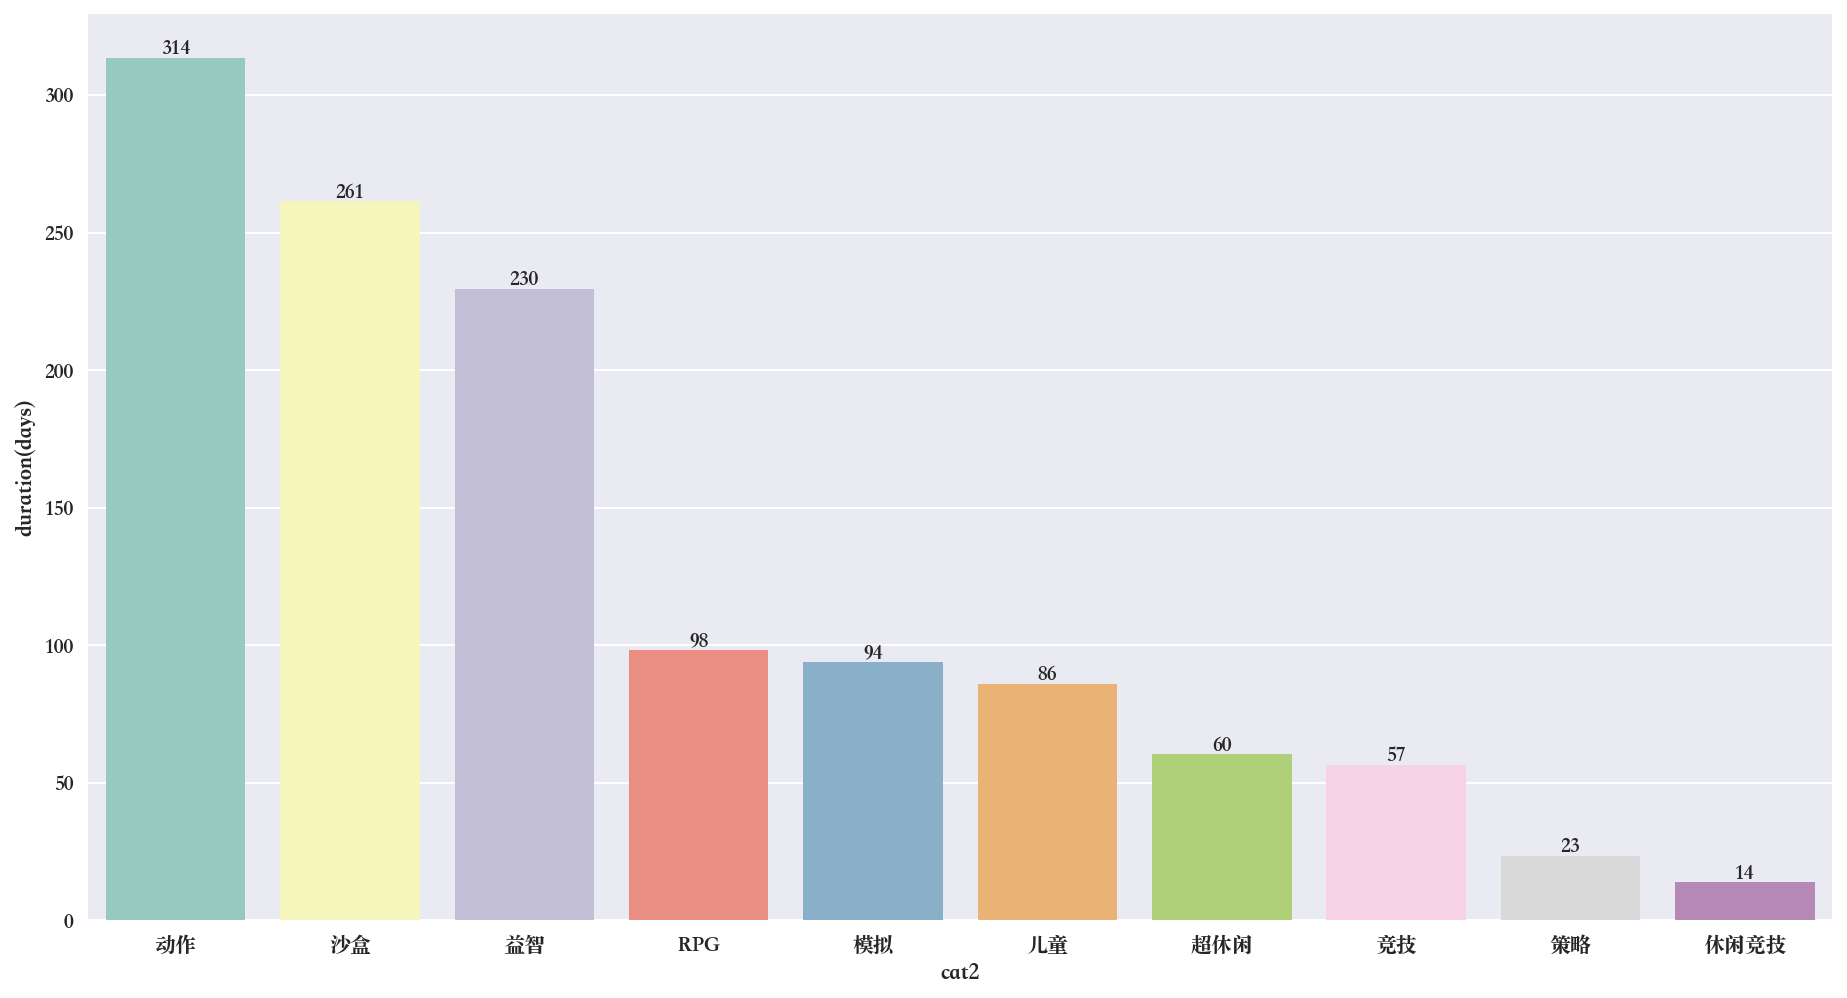

In [27]:
#每品类平均测试时长
c = test_data['country_cn'] != '全部'
game_test = test_data[c]

country_test = game_test.groupby(['unified_product_name','predicted_release_date'])['date'].min()
merged = pd.merge(game_test,country_test,on = ['unified_product_name','predicted_release_date','date']).drop_duplicates()
merged['duration'] = merged['predicted_release_date'] - merged['date']
merged['duration'] = merged['duration'].apply(lambda x:int(x.days))

avr_duration = merged.groupby(['cat2'])['duration'].mean()
avr_duration = avr_duration.reset_index()
avr_duration['duration'] = avr_duration['duration'].round(2)
avr_duration = avr_duration.sort_values(['duration'],ascending=False)
avr_duration.columns = ['cat2','duration(days)']

plt.figure(figsize=(15,8),dpi=150)
sns.barplot(x='cat2',y='duration(days)',data=avr_duration,palette='Set3')
for x,y in enumerate(avr_duration['duration(days)']):
    plt.text(x,y,'%s' %round(y),ha='center',va='bottom')
plt.show()

从下两张图也能明显看出休闲竞技类与沙盒类游戏生命周期的不同。休闲竞技如Tank Stars,从2018年7月发行到收入顶峰的2019年3月处于一个高增长阶段，但随后便迅速进入衰退期，到2020年初每日收入已从峰值的6万跌至1万，全过程不过一年半的时间。而益智游戏Sky: Children of the Light (光遇），在其2019年7月发行后虽然收入起伏不定，但总体一直处于增长的趋势，直到2022年收入也并未进入衰退期。反观两者的测试时长，也能明显从图中看出光遇的测试时长远长于Tank Stars。

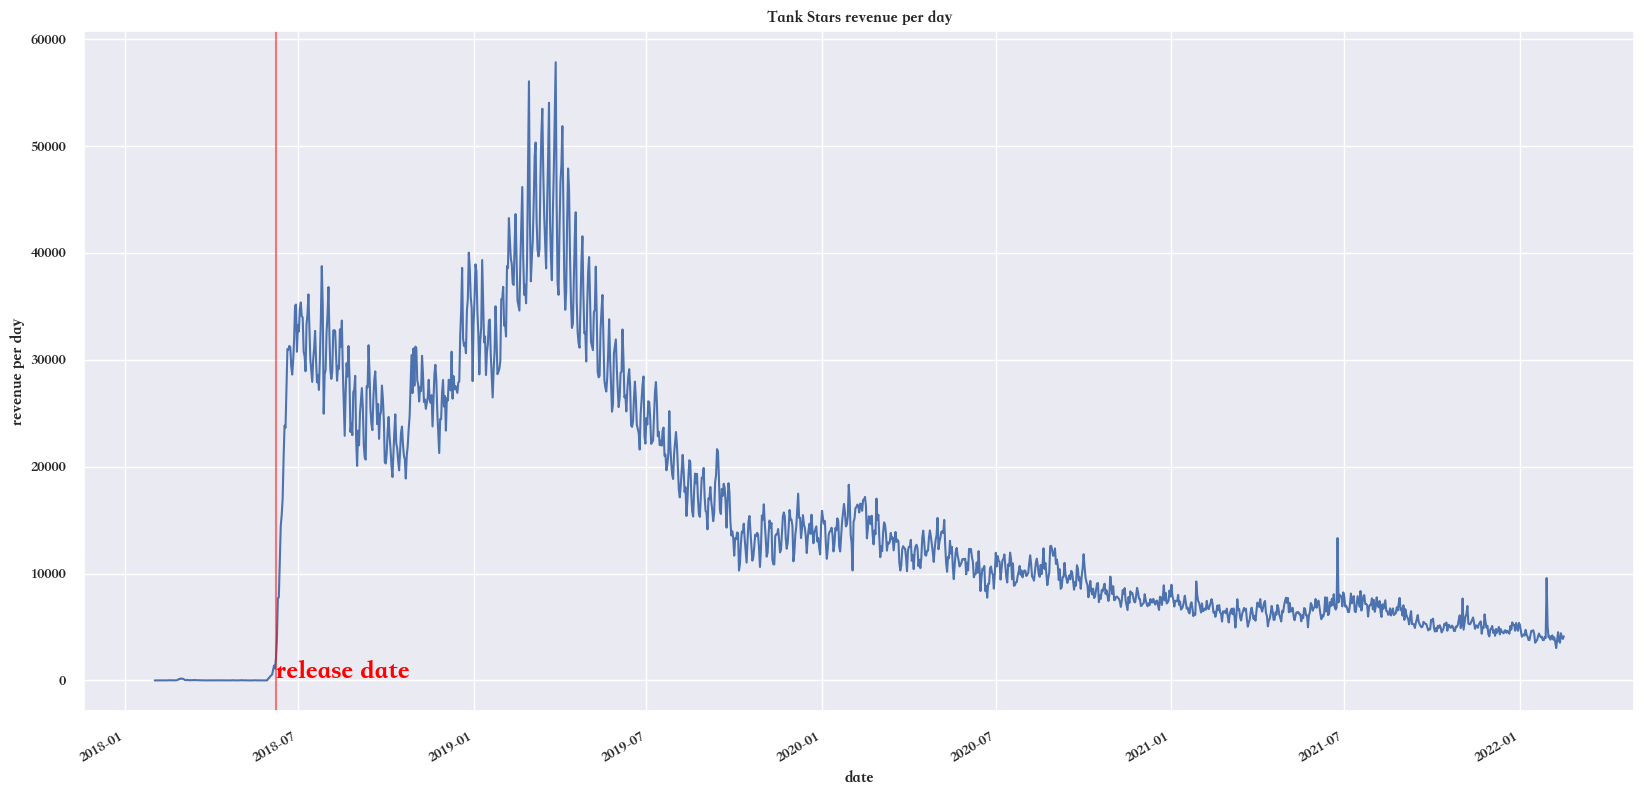

In [322]:
def plot_download(name, y, xlabel='date', ylabel='revenue per day'):
        
    g = df['unified_product_name'] == name
    c = df1['country_cn'] != '全部'
    #ca=df1['cat2']==cat   
    game_info = df1[g & c]
    release_date = game_info['predicted_release_date'].values[0]
    
    var = game_info[g].groupby('date').revenue_1d.sum() #每日总下载量
    fig = plt.figure(figsize=(20,10), dpi=100)
    ax1 = fig.add_subplot(1,1,1)
    
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_title(name + ' revenue per day')
    var.plot(kind='line')
    
    plt.axvline(release_date, color='red',alpha=0.5)
    plt.text(release_date-20,y,'release date',size=20,color='red')
    
plot_download('Tank Stars',y=20)

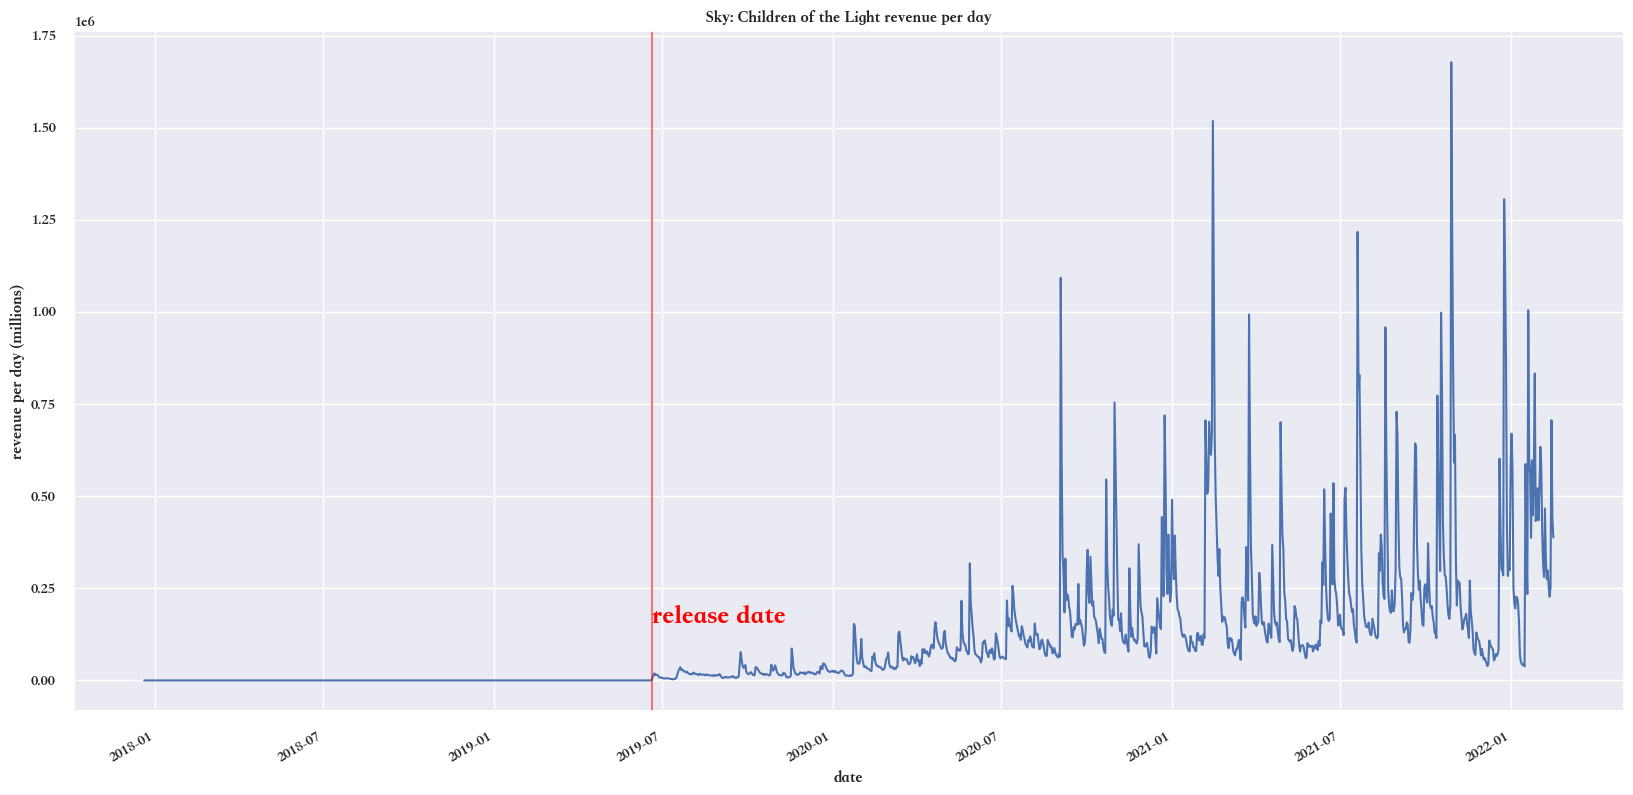

In [323]:
plot_download('Sky: Children of the Light',y=150000,ylabel='revenue per day (millions)')


以下为每品类的测试时长箱线图。中位数方面，可以看出中位数有明显差异，相对关系基本与平均值保持一致（动作和沙盒类仍为最高，中位数分别为251天和241天；休闲竞技和策略类仍保持低水平，中位数分别为145.5天和69天）。散布方面，沙盒和益智类拥有较大四分位差(分别为262.5天和187天）。四分位差大可能说明品类之间游戏性质差异较大，也可能受到样本量和品类定位影响，沙盒和益智类游戏定位界限模糊，导致品类间游戏差异较大。异常值方面，模拟和策略类游戏各有一个异常值，分别为 ‘My Child Lebensborn’（我的孩子：生命之源）755天和 ‘Rise of Empire’（帝国的崛起）563天。这两款游戏也是这100个样本中测试时间最长的。
通过假定检验得出品类之间的中位数测试时长有统计上的显著差异（p value=0.0247)。

<center><mark>每品类的测试时长箱线图

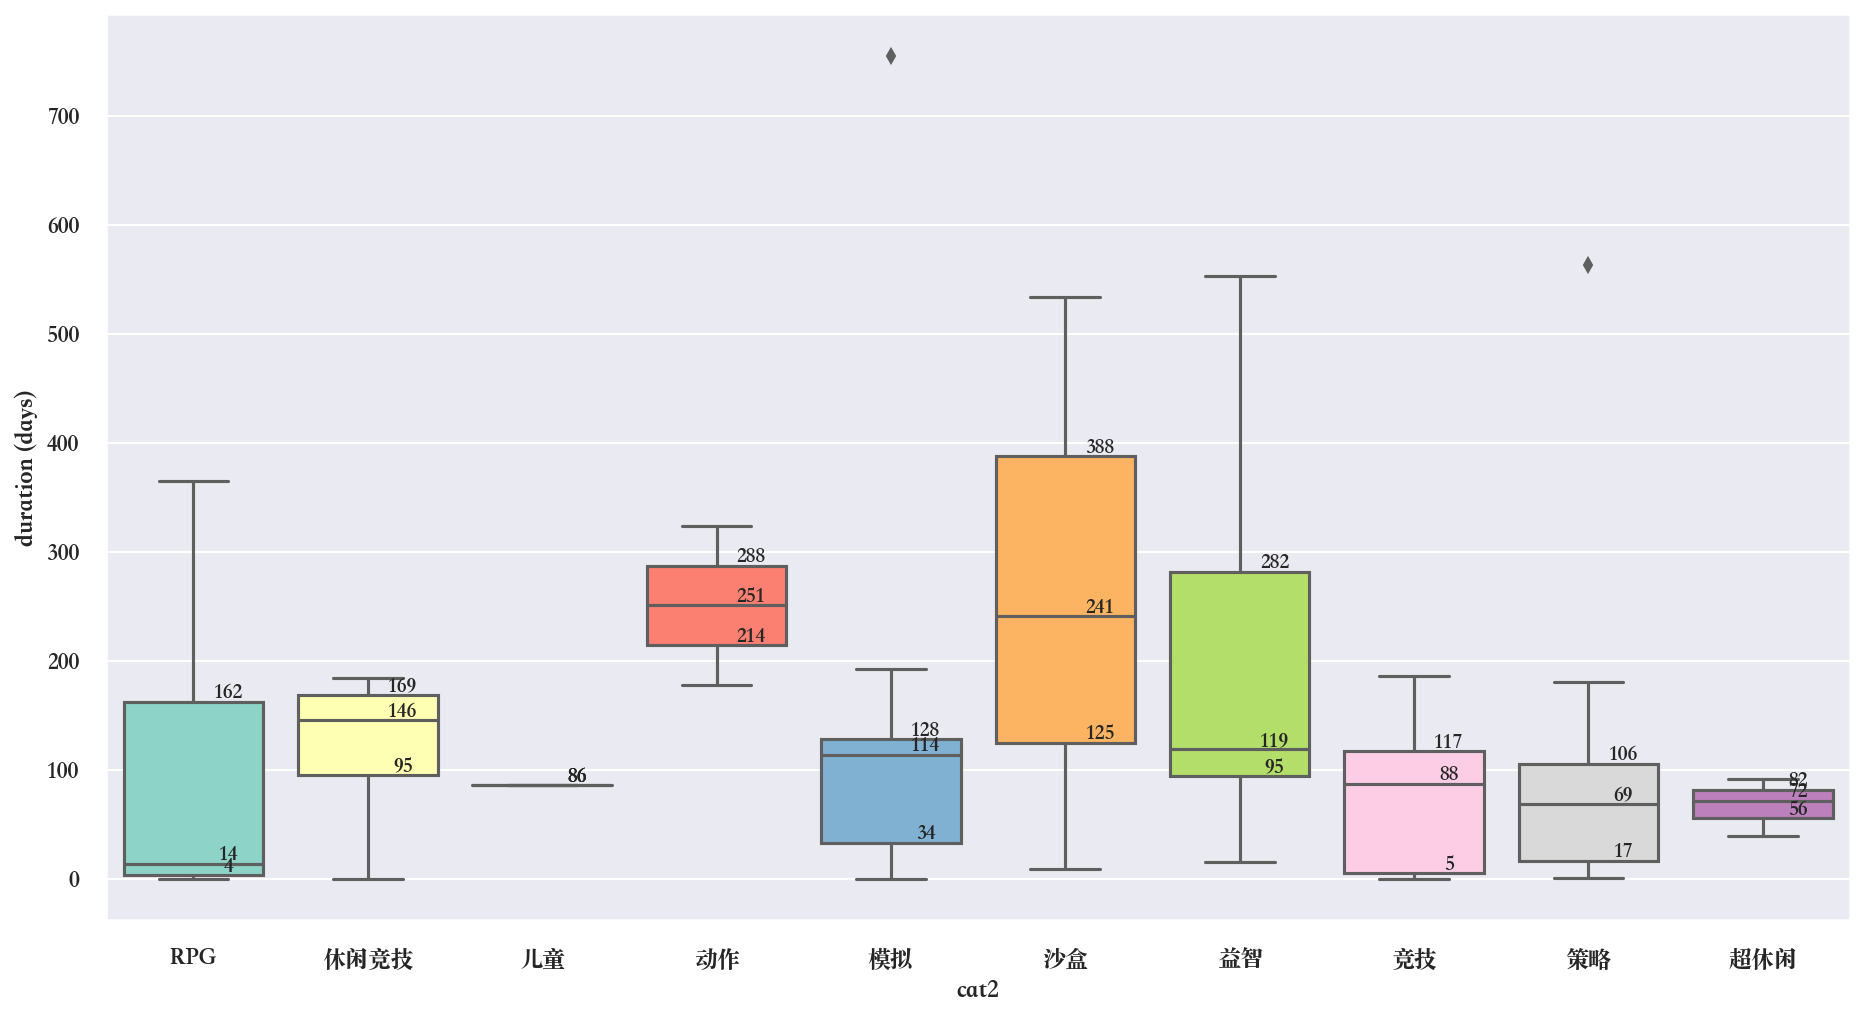

In [225]:
#品类测试时长
dd = test_data['predicted_release_date']>=test_data['date']
c = test_data['country_cn'] != '全部'
game_test1 = test_data[c&dd]

country_test1 = game_test1.groupby(['cat2','unified_product_name','predicted_release_date'])['date'].min()
country_test1 = country_test1.reset_index()
country_test1['duration'] = country_test1['predicted_release_date'] - country_test1['date']
country_test1['duration'] = country_test1['duration'].apply(lambda x:int(x.days))

#country_test1[country_test1['cat2'] == '益智']['duration'].quantile(0.25)
#country_test1[country_test1['cat2'] == 'RPG']['duration'].median()
#sorted(country_test1[country_test1['cat2'] == '策略']['duration'],reverse=True)

plt.figure(figsize=(15,8),dpi=150)
sns.boxplot(y='duration',x='cat2',data=country_test1,palette='Set3',saturation=1,orient='v',width=0.8)
plt.ylabel('duration (days)')
med = country_test1.groupby(['cat2'])['duration'].median().reset_index()
for x,y in enumerate(med['duration']):
    plt.text(x+0.2,y,'%s' %round(y),ha='center',va='bottom')
q1 = country_test1.groupby(['cat2'])['duration'].quantile(0.25).reset_index()
for x,y in enumerate(q1['duration']):
    plt.text(x+0.2,y,'%s' %round(y),ha='center',va='bottom')
q3 = country_test1.groupby(['cat2'])['duration'].quantile(0.75).reset_index()
for x,y in enumerate(q3['duration']):
    plt.text(x+0.2,y,'%s' %round(y),ha='center',va='bottom')
plt.show()

## 发行国家（中美日）与测试长度的关系
以下讨论主要发行国家的不同是否对游戏测试长度产生影响。这里对主要发行国家的定义为：该款游戏在发行后一年在各国年收入排名前10的国家。

因为中国、美国、日本是全球三大手游市场，根据Newzoo2021年全球游戏市场报告数据，其2021年手机游戏总收入（314亿，148亿，124亿美金）占了全球2021年手机游戏总收入65%，以下将重点讨论在这三个国家主要发行的游戏。

下图为在中美日三国主要发行游戏测试时长箱线图。中位数方面，三国中位数分别为153天，108天和100天。在中国主要发行的游戏测试时长中位数明显高于美国和日本，这可能源于中国测试的内部评审机制（如腾讯GR评审）与合规性政策（如版号发放），亦可能是中国游戏厂商的营销手段和责任规避策略。散布方面，在中国主要发行游戏测试时长的四分位差也属三国最高，为185.25天，美国和日本四分位差为102天和50.25天。这一定程度上受到样本量影响（在日本主要发行游戏的样本量仅16，而中国与美国为40和45）。但促使中国四分位差明显高于美国和日本的因素可能为中国测试渠道相对美国和日本更具多样性，美国和日本的测试渠道多为App Store，Google play，和taptap，而中国测试渠道有b站游戏专区、WeGame等其他小众渠道。由于本报告所有数据仅包含App Store和Google play这两个平台，在其他平台测试的数据没有反映到统计结果中，成为四分位差走阔的原因之一。

假定检验结果为：在中国主要发行的游戏中位数测试时长大于在美国主要发行的游戏（p value=0.0665），但中国和日本与日本和美国主要发行的游戏中位数时长无统计显著性差异（p value分别为0.1169和0.5952）。

In [30]:
#每个游戏是否在某国发行当天下载量排前10
def games_in_top_markets(country=''):
    global ctry_release
    ctry_release = []
    games = df1['unified_product_name'].drop_duplicates()
    for game in games:
        g = df1['unified_product_name'] == game
        c = df1['country_cn'] != '全部'
        rl = df1['date'] == df1['predicted_release_date']
        game_info = df1[g&c&rl]
        game_info = game_info.groupby(['country_cn'])['download_1d'].max()
        game_info = game_info.reset_index().sort_values('download_1d',ascending = False).set_index('country_cn')[0:10]
        if country in list(game_info.index):
            ctry_release.append(game)
    return ctry_release

In [31]:
def dur_per_game(country=''):
    g = df1['unified_product_name'].isin(ctry_release)
    df7 = df1[g]
    df7 = df7.groupby(['unified_product_name','predicted_release_date'])['date'].min()
    df7 = df7.reset_index()
    df7['duration'] = df7['predicted_release_date']-df7['date']
    df7['duration'] = df7['duration'].apply(lambda x:int(x.days))
    df7['country'] = country
    df7 = df7[['country','duration']]
    return df7

In [32]:
games_in_top_markets(country='中国')
dur_per_game_cn = dur_per_game(country='中国')

In [33]:
games_in_top_markets(country='美国')
dur_per_game_us = dur_per_game(country='美国')

In [34]:
games_in_top_markets(country='日本')
dur_per_game_jp = dur_per_game(country='日本')

<center><mark>样本内所有游戏在中美日三国主要发行游戏测试时长箱线图

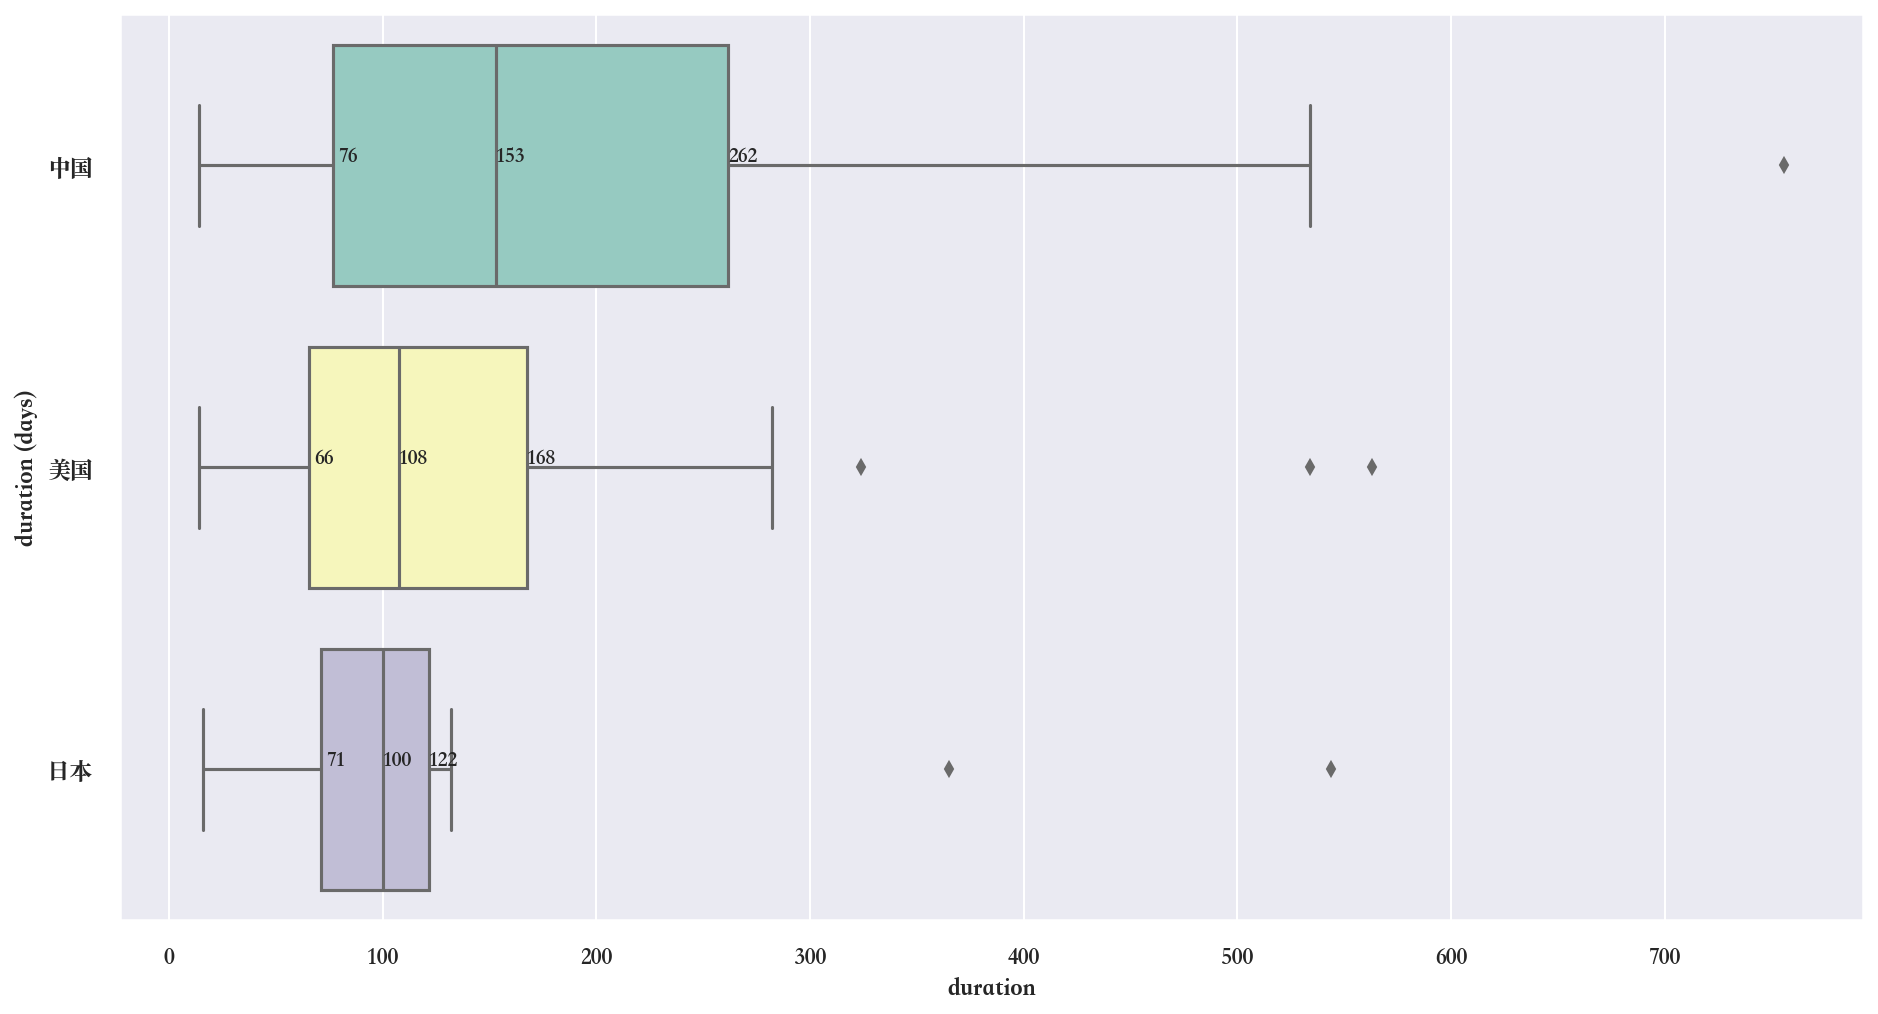

In [226]:
dur_all_games = pd.concat([dur_per_game_cn,dur_per_game_us,dur_per_game_jp])
d10 = dur_all_games['duration'] > 10
dur_all_games_10 = dur_all_games[d10]

plt.figure(figsize=(15,8),dpi=150)
sns.boxplot(x='duration',y='country',data=dur_all_games_10,palette='Set3',orient='h',width=0.8)
plt.ylabel('duration (days)')
med = dur_all_games_10.groupby(['country'])['duration'].median().reset_index()
med = med.sort_values(['country']).set_index(['country']).reindex(['中国','美国','日本']).reset_index()
for x,y in enumerate(med['duration']):
    plt.text(y+7,x,'%s' %round(y),ha='center',va='bottom')
q1 = dur_all_games_10.groupby(['country'])['duration'].quantile(0.25).reset_index()
q1 = q1.sort_values(['country']).set_index(['country']).reindex(['中国','美国','日本']).reset_index()
for x,y in enumerate(q1['duration']):
    plt.text(y+7,x,'%s' %round(y),ha='center',va='bottom')
q3 = dur_all_games_10.groupby(['country'])['duration'].quantile(0.75).reset_index()
q3 = q3.sort_values(['country']).set_index(['country']).reindex(['中国','美国','日本']).reset_index()
for x,y in enumerate(q3['duration']):
    plt.text(y+7,x,'%s' %round(y),ha='center',va='bottom')
plt.show()

## 测试国家地区与测试长度的关系
上面分析了主要发行国家对于游戏测试时长的影响，现在将分析测试国家所属地区是否对游戏测试时长造成影响。

下图把测试国家分为东南亚、中东、其他亚太、北美、南美、欧洲这六个地区，并对在每个地区测试的游戏测试时长做箱线图。中位数方面，六个地区的中位数均在106至136天，差异不是很明显。测试最长的地区为东南亚和欧洲，中位数均在135天左右。这两个地区都不是主要游戏市场，但其玩家对主流市场有一定的代表性，东南亚地区的国家例如越南和马来西亚是中国市场玩家很好的代表，而欧洲国家则对美国市场有一定的代表性。散布方面，南美地区的测试时长四分位差明天高于其他地区，为97.16天。

假定检验结果为测试国家地区与测试时长中位数无统计显著性差异（p value=0.4406）

<center><mark>样本内所有游戏在每个测试地区测试时长箱线图

In [39]:
#各地区国家lists
areas = {'东南亚': ['菲律宾','越南','老挝','柬埔寨','泰国','马来西亚','文莱','新加坡','印度尼西亚'],
'欧洲': ['芬兰','瑞典','挪威','冰岛','丹麦','俄罗斯联邦','乌克兰','波兰','法国','英国','意大利','德国'],
 '南美': ['苏里南','秘鲁','玻利维亚','巴西','智利','乌拉圭','阿根廷','巴拉圭'],
         '中东':['土耳其','阿拉伯','沙特阿拉伯','南非','伊朗','阿联酋','以色列','利比亚'],
 '北美': ['加拿大','墨西哥'],'其他亚太':['韩国','印度','阿塞拜疆','亚美尼亚','蒙古','柬埔寨','中国香港','中国澳门','中国台湾','澳大利亚','新西兰']}

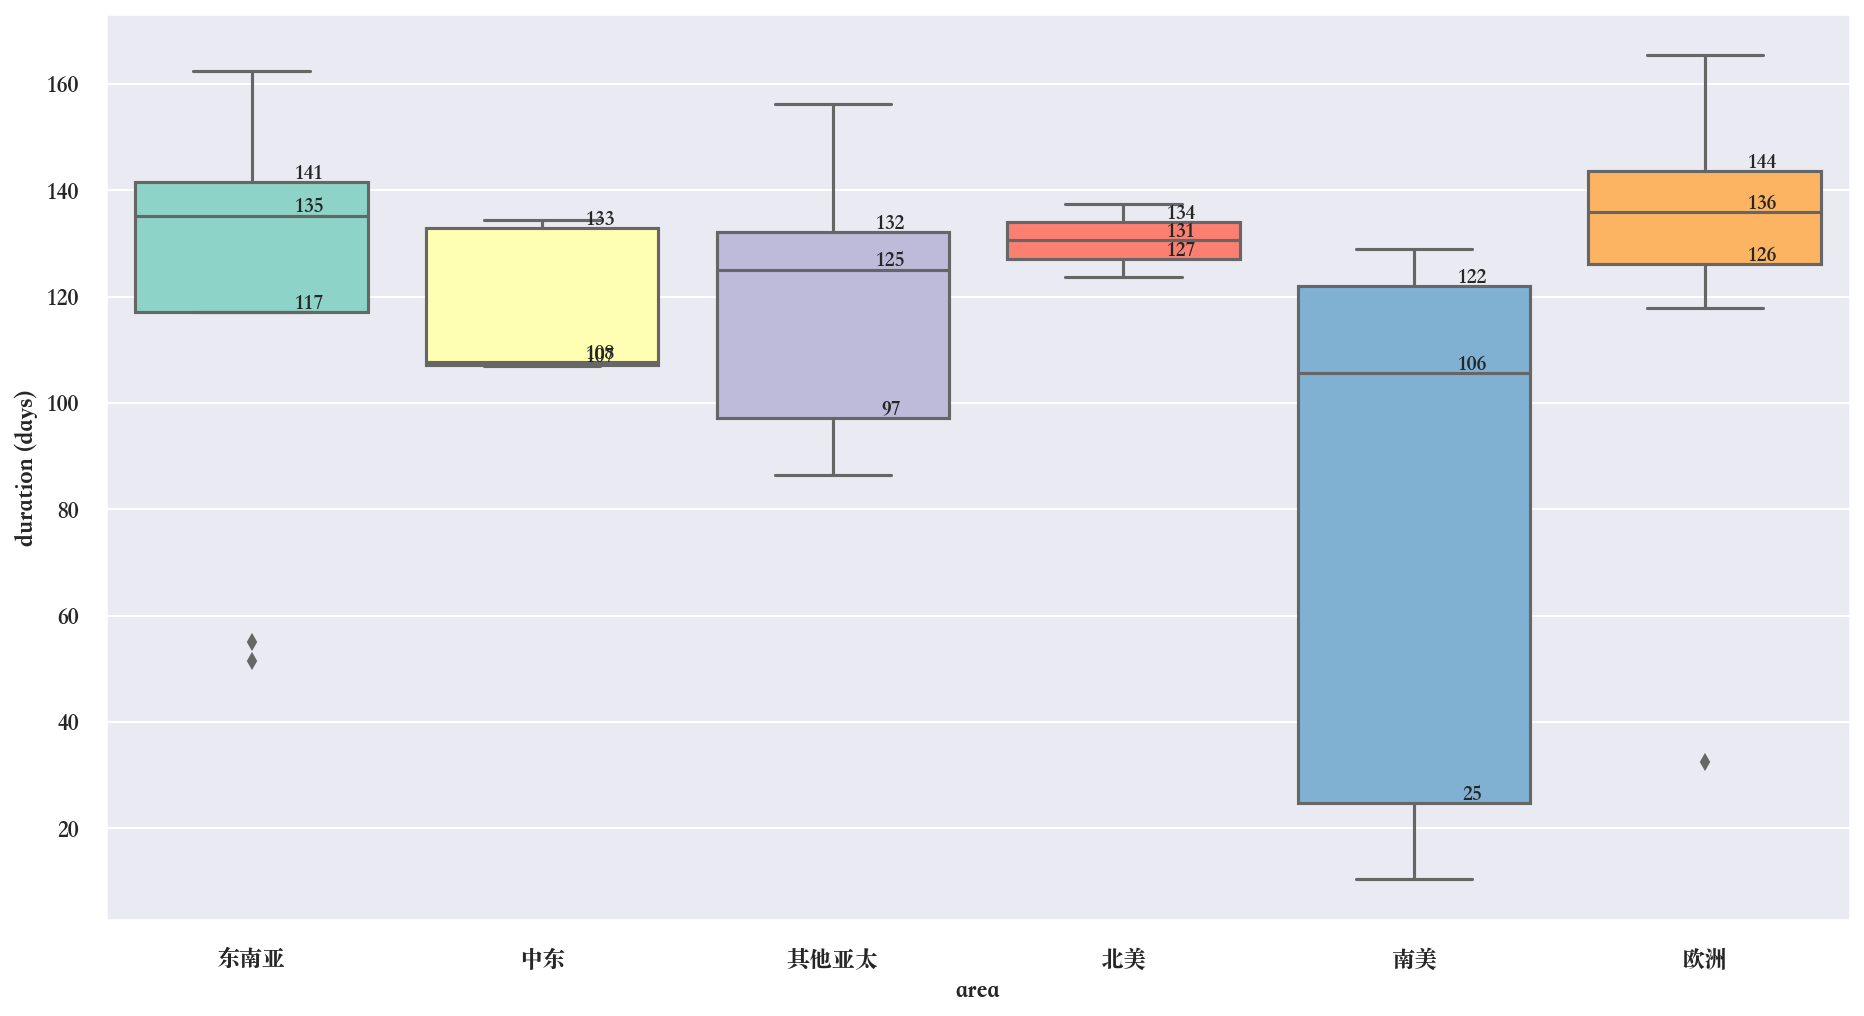

In [233]:
test_data['duration'] = test_data['predicted_release_date']-test_data['date']
test_data['duration'] = test_data['duration'].apply(lambda x:int(x.days))
test_data1 = test_data.groupby(['unified_product_name','duration','country_cn'])['date'].min().reset_index()
test_data1 = test_data1.groupby(['country_cn'])['duration'].mean().reset_index()
areas_test = pd.DataFrame()
for area in areas.keys():
    t = test_data1['country_cn'].isin(areas[area])
    test_data2 = test_data1[t]
    #test_data1 = test_data1.groupby(['unified_product_name','duration','country_cn'])['date'].min().reset_index()
    test_data2['area'] = area
    test_data2 = test_data2[['area','duration']]
    areas_test = pd.concat([test_data2,areas_test])
areas_test = areas_test.sort_values(['area'])

plt.figure(figsize=(15,8),dpi=150)
sns.boxplot(y='duration',x='area',data=areas_test,palette='Set3',saturation=1,orient='v',width=0.8)
plt.ylabel('duration (days)')

med = areas_test.groupby(['area'])['duration'].median().reset_index()
for x,y in enumerate(med['duration']):
    plt.text(x+0.2,y,'%s' %round(y),ha='center',va='bottom')
q1 = areas_test.groupby(['area'])['duration'].quantile(0.25).reset_index()
for x,y in enumerate(q1['duration']):
    plt.text(x+0.2,y,'%s' %round(y),ha='center',va='bottom')
q3 = areas_test.groupby(['area'])['duration'].quantile(0.75).reset_index()
for x,y in enumerate(q3['duration']):
    plt.text(x+0.2,y,'%s' %round(y),ha='center',va='bottom')
plt.show()

## 每日收入和下载量与测试长度的关系
以下分析平均每日收入及下载量与测试时长的关系。

下图为样本内每款游戏平均每日收入及下载量对测试时长的散点图。从图上并未直观看出平均每日收入/下载量与测试时长的关系，但从下图两块阴影区域相交部分可以看出大部分游戏集中在日均收入50万美金以内，日均下载量在5万以内，以及测试时长在200天以内。数据显示80% 游戏集中在日均收入小于等于27.81万美金/日均下载量72300次，以及测试时长260天以内，但相关性不明显。

假定检验结果为日均收入/下载量与测试时长无统计显著性相关性（日均收入和测试时长相关系数为-0.0862，p value为0.3961；日均下载量和测试时长相关系数为0.0155，p value为0.8789），因此无法判断日均收入/下载量越高，对应越长的测试时长。

此外，除了上述游戏集中区域（两块阴影区域相交部分），也有少量游戏集中在单层阴影区域：即有少量游戏日均收入/下载量高，但测试时长短；亦有少量游戏日均收入/下载量低，但测试时长较长。因此日均收入/下载量和测试时长可能为负相关。


<center><mark>截至2022年2月样本内所有游戏日均收入及下载量对测试时长散点图

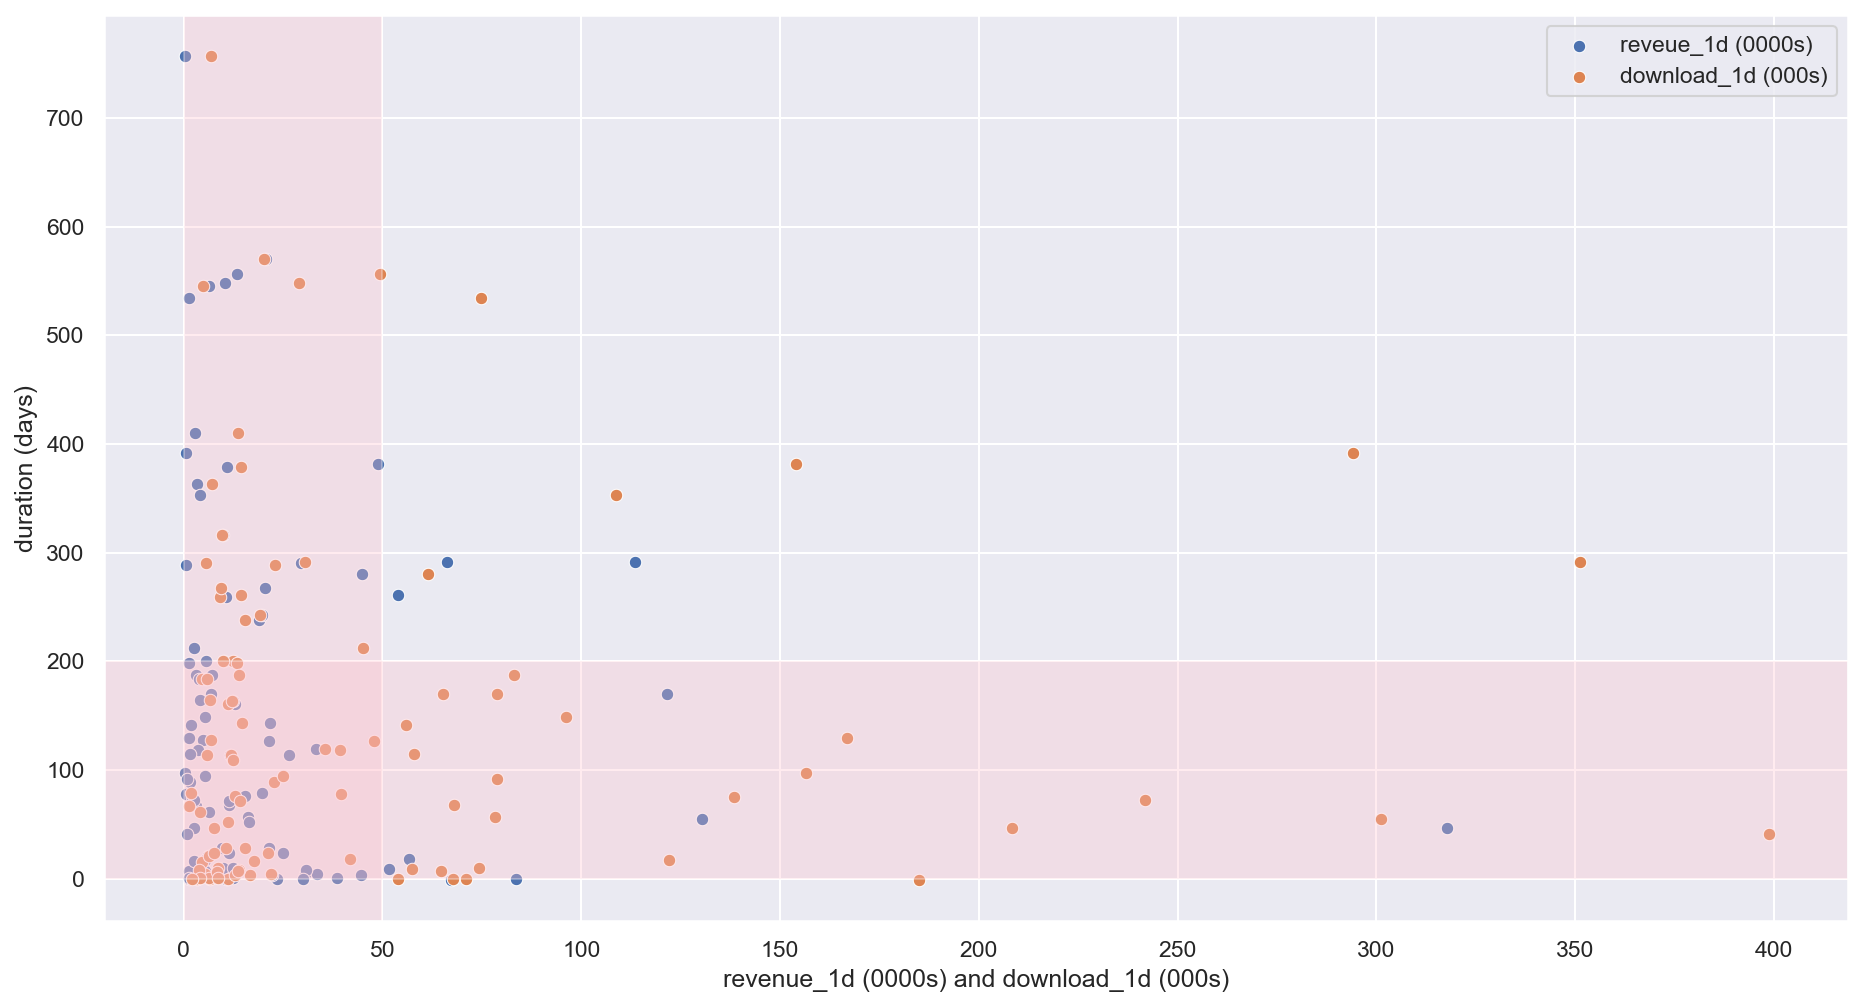

In [692]:
#每个游戏平均一天收入/下载
c = df1['country_cn'] == '全部'
df4 = df1[c]
df4
avr_rev_dl_1d = df4.groupby(['unified_product_name'])['revenue_1d','download_1d'].mean()
avr_rev_dl_1d = avr_rev_dl_1d.reset_index()
avr_rev_dl_1d['revenue_1d'] = avr_rev_dl_1d['revenue_1d']/10000
avr_rev_dl_1d['download_1d'] = avr_rev_dl_1d['download_1d']/1000

#每个游戏测试时长
avr_dur_per_game = df1.groupby(['cat2','unified_product_name','publish_time','predicted_release_date'])['date'].min()
avr_dur_per_game = avr_dur_per_game.reset_index()
avr_dur_per_game['duration'] = avr_dur_per_game['predicted_release_date'] - avr_dur_per_game['publish_time']
avr_dur_per_game['duration'] = avr_dur_per_game['duration'].apply(lambda x:int(x.days))
avr_dur_per_game = avr_dur_per_game[['unified_product_name','duration']]


#每个游戏平均一天收入/下载量和测试时长
rev_dl_vs_dur = pd.merge(avr_dur_per_game,avr_rev_dl_1d, on = ['unified_product_name'])
rev_dl_vs_dur.columns = ['unified_product_name','duration','revenue_1d (0000s) and download_1d (000s)','download_1d']

plt.figure(figsize=(15,8),dpi=150)
sns.scatterplot(x='revenue_1d (0000s) and download_1d (000s)',y='duration',data=rev_dl_vs_dur,palette='Set3',label='reveue_1d (0000s)')
sns.scatterplot(x='download_1d',y='duration',data=rev_dl_vs_dur,palette='Set3',label='download_1d (000s)')

#plt.xlabel('revenue_1d (0000s) and download_1d (000s)')
plt.ylabel('duration (days)')
sns.set(style='darkgrid')
plt.axvspan(0,50,facecolor='pink',alpha=0.3)
plt.axhspan(0,200,facecolor='pink',alpha=0.3)
plt.show()

如果把数据局限于阴影重叠部分（日均收入小于等于50万美金，测试时长小于等于200天），则能明显看出日均收入和测试时长的关系为负相关（相关性系数为-0.27，p value=0.0287）。
下图用对数线性模型呈现了这个子样本的日均收入和测试时长的关系。此模型斜率系数为-0.0522 (p value=0.0061），说明每当日均收入增加1万美金，测试时长平均下降5.2%。因此可以推断出大部分头部游戏不会花费大量时间在测试中，因为过长的测试周期可能会拉低游戏整体收入水平。

<center><mark>所有日均收入小于等于50万美金、测试时长小于等于200天游戏日均收入及下载量对测试时长散点图

<img style='float: left;' src='./rev_dur_log_linear1.pdf' width=320 heigth=100>

# 测试国家偏好
## 品类是否影响测试国家偏好
### 所有品类测试国家概览
下表筛选出了每品类日均收入最高的五个发行国家，以及测试时间最长的五个国家，试图从中挖掘每品类受众国家和测试国家的关系。
从全品类收入最高的发行国家来看，几乎中国、美国和日本在所有品类都有一席之地，可以说明中日美三国是大部分游戏品类主要市场。从全品类测试期最长的国家来看，所有品类有一个共性，即偏向去对主要发行国家有一定代表性的小众国家测试。例如，RPG游戏在中国日本收入最高，对应的测试国家就是港澳台，因为港澳台玩家对中国和日本玩家都具有一定的代表性。再比如沙盒类游戏，其主要市场在美国及欧洲，对应其主要测试国家也围绕欧洲地区，例如白俄罗斯和摩尔多瓦。

In [828]:
#每品类收入最高国家
c = df1['country_cn'] != '全部'
df3 = df1[c]
df3 = df3.groupby(['cat2','country_cn'])['revenue_1d'].mean()
df3 = df3.reset_index()
df3 = df3.sort_values(['cat2','revenue_1d'],ascending = False)
df3 = df3.groupby(['cat2']).head(5)
df3.columns = ['cat2','top_5_release_country','revenue_1d']
df3['revenue_1d'] = df3['revenue_1d'].round(2)
df3 = df3.sort_values(['cat2','revenue_1d'],ascending = False)
df3 = df3.sort_values(['cat2'])
df3 = df3.reset_index()
df3 = df3[['cat2','top_5_release_country','revenue_1d']]

In [746]:
#每品类在哪些国家测试最长
c = test_data['country_cn'] != '全部'
game_test = test_data[c]

country_test = game_test.groupby(['unified_product_name','country_cn','predicted_release_date'])['date'].min()
merged = pd.merge(game_test,country_test,on = ['country_cn','predicted_release_date','date']).drop_duplicates()
merged['duration'] = merged['predicted_release_date'] - merged['date']
merged['duration'] = merged['duration'].apply(lambda x:int(x.days))

avr_dur_ctry = merged.groupby(['cat2','country_cn'])['duration'].mean()
avr_dur_ctry = avr_dur_ctry.reset_index()
avr_dur_ctry= avr_dur_ctry.sort_values(['cat2','duration'],ascending=[1,0])
avr_dur_ctry = avr_dur_ctry.groupby(['cat2']).head(5)
avr_dur_ctry['duration'] = avr_dur_ctry['duration'].round(2)
avr_dur_ctry.columns = ['cat2','test_country','duration(days)']
avr_dur_ctry = avr_dur_ctry.sort_values(['cat2'])
avr_dur_ctry = avr_dur_ctry.reset_index()
avr_dur_ctry = avr_dur_ctry[['test_country','duration(days)']]

In [814]:
test_data['duratoin'] = test_data['predicted_release_date'] - test_data['date']
c = test_data['country_cn'] != '全部'
test_data = test_data[c]
test_data = test_data[test_data['duration'] > 10]
test_data2 = (test_data.groupby(['cat2','unified_product_name','country_cn'])['date'].min()).reset_index()

test_prop = pd.DataFrame()
for cat in test_data['cat2'].drop_duplicates():
    test_data_cat = test_data2[test_data2['cat2'] == cat]
    test_data_cat = test_data_cat.groupby(['cat2','country_cn']).count()
    test_data_cat = test_data_cat.reset_index()
    test_data_cat = test_data_cat.sort_values(['cat2','date'],ascending = False)
    test_data_cat = test_data_cat.groupby(['cat2']).head(5)
    test_data_cat = test_data_cat.sort_values(['cat2'])
    test_data_cat = test_data_cat.reset_index()
    test_data_cat['proportion'] = test_data_cat['date']/(test_data_cat['date'].sum())
    test_prop = pd.concat([test_data_cat,test_prop])
test_prop = test_prop.reset_index()
test_prop = test_prop.sort_values(['cat2'])
test_prop = test_prop[['country_cn','proportion']]
test_prop = test_prop.reset_index()
test_prop = test_prop[['country_cn','proportion']]
test_prop.columns = ['test_country','proportion']
test_prop['proportion'] = test_prop['proportion'].round(2)
test_prop

,test_country,proportion
0,中国,0.39
1,中国台湾,0.16
2,中国澳门,0.16
3,中国香港,0.16
4,加拿大,0.13
5,加拿大,0.27
6,印度,0.18
7,丹麦,0.18
8,中国香港,0.18
9,中国台湾,0.18


<mark>每品类截至2022年2月日均收入最高的五个国家及测试时间最长的五个国家

In [816]:
pd.concat([df3,avr_dur_ctry],axis=1,join='inner')

,cat2,top_5_release_country,revenue_1d,test_country,duration(days)
0,RPG,中国台湾,17047.50,中国,88.00
1,RPG,日本,103473.19,中国澳门,78.55
2,RPG,韩国,30716.82,中国香港,67.69
3,RPG,美国,41316.81,中国台湾,67.23
4,RPG,中国,91483.23,英国,59.50
5,休闲竞技,法国,14159.11,菲律宾,118.00
6,休闲竞技,中国,17445.18,印度,112.00
7,休闲竞技,德国,20629.38,土耳其,109.33
8,休闲竞技,韩国,22797.48,巴基斯坦,104.67
9,休闲竞技,美国,42510.83,巴西,88.25


In [ ]:
#根据每品类发行一年内收入、2021年收入，以及（所有游戏）下载量标准值大于75分位数算出收入最高国家分布，以及分别在哪些国家测试最长

In [41]:
#每品类发行后一年内最高收入国家的占比
def top_country_proportion(cat):
    
    #这个品类所有游戏数据
    cat2 = df1['cat2'] == cat
    c = df1['country_cn'] != '全部'
    cat_game = df1[c&cat2]
    cat_games = cat_game['unified_product_name'].drop_duplicates()
    
    global top_country
    top_country = {} #key=游戏，value=收入第一国家
    for game in cat_games:
        g = cat_game['unified_product_name'] == game
        game_info = cat_game[g]
        d_min = game_info['predicted_release_date'].values[0]
        d_max = (pd.to_datetime(d_min) + datetime.timedelta(days=365)).strftime('%Y-%m-%d')
        date_min = game_info['date'] >= d_min
        date_max = game_info['date'] <= d_max
        rev_ctry = game_info[date_min&date_max].groupby(['country_cn'])['revenue_1d'].sum()
        rev_country = rev_ctry.reset_index().sort_values('revenue_1d',ascending = False).set_index('country_cn')[0:3]
        top_country[game] = rev_country.index[0]
    
    #每品类百分之几的游戏在发行一年内收入在某个国家最高
    #to dataframe
    d = {'number_of_games': top_country.keys(),'top_country': top_country.values()}
    top_ctry = pd.DataFrame(d)
    
    #算比例
    global top_ctry1
    top_ctry1 = (top_ctry.groupby(['top_country']).count()).reset_index().sort_values('number_of_games',ascending = False).set_index('top_country')
    top_ctry1['proportion'] = top_ctry1['number_of_games']/top_ctry1['number_of_games'].sum()
    top_ctry1 = top_ctry1.reset_index()
    top_ctry1['cat2'] = cat
    top_ctry1['year'] = '1st year'
    top_ctry1 = top_ctry1[['cat2','year','top_country','number_of_games','proportion']]
    return top_ctry1

In [42]:
#每品类2021年最高收入国家的占比
def top_country_proportion_2021(cat):
    
    #这个品类所有游戏数据
    cat2 = df1['cat2'] == cat
    c = df1['country_cn'] != '全部'
    cat_game = df1[c&cat2]
    cat_games = cat_game['unified_product_name'].drop_duplicates()
    
    global top_country_2021
    top_country_2021 = {} #key=游戏，value=收入第一国家
    for game in cat_games:
        g = cat_game['unified_product_name'] == game
        game_info = cat_game[g]
        d_min = pd.to_datetime('2021-01-01')
        d_max = pd.to_datetime('2021-12-31')
        date_min = game_info['date'] >= d_min
        date_max = game_info['date'] <= d_max
        rev_ctry_2021 = game_info[date_min&date_max].groupby(['country_cn'])['revenue_1d'].sum()
        rev_country_2021 = rev_ctry_2021.reset_index().sort_values('revenue_1d',ascending = False).set_index('country_cn')[0:3]
        top_country_2021[game] = rev_country_2021.index[0]
    
    #每品类百分之几的游戏在发行一年内收入在某个国家最高
    #to dataframe
    global top_ctry_2021
    d = {'number_of_games': top_country_2021.keys(),'top_country': top_country_2021.values()}
    top_ctry_2021 = pd.DataFrame(d)
    
    #算比例
    #global top_ctry_2021
    top_ctry_2021 = (top_ctry_2021.groupby(['top_country']).count()).reset_index().sort_values('number_of_games',ascending = False).set_index('top_country')
    top_ctry_2021['proportion'] = top_ctry_2021['number_of_games']/top_ctry_2021['number_of_games'].sum()
    top_ctry_2021 = top_ctry_2021.reset_index()
    top_ctry_2021['cat2'] = cat
    top_ctry_2021['year'] = '2021'
    top_ctry_2021 = top_ctry_2021[['cat2','year','top_country','number_of_games','proportion']]
    return top_ctry_2021

In [43]:
#在上述国家拥有最高收入的游戏在哪些国家有最长测试期（取前3）
def top_rev_country_vs_test_country(cat):
    
    #字典：这个品类有哪些游戏在这个国家收入最高 key=国家，value=游戏
    global ctry_dict
    ctry_dict = {}
    for index,row in top_country_proportion(cat).iterrows():
        game_list = []
        for game in top_country.keys():
            if top_country[game] == row['top_country']:
                game_list.append(game)
                ctry_dict[row['top_country']] = game_list

    #在收入最高的这些国家中的游戏都喜欢去哪里测试（哪个国家平均测试期最长）
    global test_vs_top
    test_vs_top = pd.DataFrame()
    for country in ctry_dict.keys():
        
        #所有在此国家的有最高收入的游戏的数据
        g = test_data['unified_product_name'].isin(ctry_dict[country])
        c = test_data['country_cn'] != '全部'
        dl = test_data['download_1d'] >= 10
        game_test = test_data[g&c&dl] 
        country_test = game_test.groupby(['country_cn'])['date'].min()
        
        #算平均每国测试时长，取前3国家
        merged = pd.merge(game_test,country_test,on = ['country_cn','date']).drop_duplicates()
        merged['duration'] = merged['predicted_release_date'] - merged['date']
        merged.groupby(['country_cn'])['duration'].mean()
        merged1 = merged[['country_cn','duration']].sort_values(['duration'],ascending = False)
        merged1['top_release_country'] = country
        test_vs_top = pd.concat([test_vs_top,merged1[:3]])
    
    test_vs_top['cat2'] = cat
    test_vs_top = test_vs_top[['cat2','top_release_country','country_cn','duration']]
    test_vs_top.columns = ['cat2','top_release_country_1st_year','test_country','duration(days)']
    nonzero = test_vs_top['duration(days)'] != '0 days'
    test_vs_top = test_vs_top[nonzero]
    test_vs_top = test_vs_top.reset_index()
    test_vs_top = test_vs_top[['cat2','top_release_country_1st_year','test_country','duration(days)']]
    return test_vs_top

In [44]:
#在上述国家（2021收入最高）拥有最高收入的游戏在哪些国家有最长测试期（取前3）
def top_rev_country_vs_test_country_2021(cat):
    
    #字典：这个品类有哪些游戏在这个国家收入最高 key=国家，value=游戏
    global ctry_dict_2021
    ctry_dict_2021 = {}
    for index,row in top_country_proportion_2021(cat).iterrows():
        game_list_2021 = []
        for game in top_country_2021.keys():
            if top_country_2021[game] == row['top_country']:
                game_list_2021.append(game)
                ctry_dict_2021[row['top_country']] = game_list_2021

    #在收入最高的这些国家中的游戏都喜欢去哪里测试（哪个国家平均测试期最长）
    global test_vs_top_2021
    test_vs_top_2021 = pd.DataFrame()
    for country in ctry_dict_2021.keys():
        
        #所有在此国家的游有最高收入的游戏的数据
        g = test_data['unified_product_name'].isin(ctry_dict_2021[country])
        c = test_data['country_cn'] != '全部'
        dl = test_data['download_1d'] >= 10
        game_test_2021 = test_data[g&c&dl] 
        country_test_2021 = game_test_2021.groupby(['country_cn'])['date'].min()
        
        #算平均每国测试时长，取前3国家
        merged = pd.merge(game_test_2021,country_test_2021,on = ['country_cn','date']).drop_duplicates()
        merged['duration'] = merged['predicted_release_date'] - merged['date']
        merged.groupby(['country_cn'])['duration'].mean()
        merged1 = merged[['country_cn','duration']].sort_values(['duration'],ascending = False)
        merged1['top_release_country'] = country
        test_vs_top_2021 = pd.concat([test_vs_top_2021,merged1[:3]])
    
    test_vs_top_2021['cat2'] = cat
    test_vs_top_2021 = test_vs_top_2021[['cat2','top_release_country','country_cn','duration']]
    test_vs_top_2021.columns = ['cat2','top_country_2021','test_country','duration(days)']
    nonzero = test_vs_top_2021['duration(days)'] != '0 days'
    test_vs_top_2021 = test_vs_top_2021[nonzero]
    test_vs_top_2021 = test_vs_top_2021.reset_index()
    test_vs_top_2021 = test_vs_top_2021[['cat2','top_country_2021','test_country','duration(days)']]
    return test_vs_top_2021

从上表可以看出各品类主要发行国家和测试国家存在一定关联性，所以以下将对样本量大于等于10的品类（RPG、模拟、益智和策略）逐一分析其主要发行国家和测试国家的关系。
3.1.2至3.1.5小节将分析这四个品类在发行后一年，和2021年收入最高国家的分布，以及在这些国家发行的游戏分别在哪些国家测试时间最长，从而推断出对每个主要发行国家具有一定代表性的小众国家为哪些。

### RPG
下图为RPG游戏在发行后一年和2021年收入最高国家的分布。

收入最高国家分布方面，RPG游戏主要收入国家为中国，美国，日本与韩国。发行后一年有20款（53%）游戏在中国有最高收入，但2021年日本反超中国，可能是前期靠中国走量提高名气，后续口碑传至日本，也有可能是日本玩家的长久活跃度比中国高。

尽管如此，中国与日本不管是在发行后一年还是2021年都是RPG头部游戏主要收入来源国家，可以归因于中日独特的游戏IP。许多中日RPG头部游戏均有自己的IP和文化背景，例如圣斗士星矢、三国传说等。而这些IP似乎没有那么强的国家界限，例如在发行后一年，圣斗士星矢和三国传说都在中国有最高收入，但2021年日本收入反超中国。这说明了中日两国对彼此游戏IP的热衷度。

此外，在发行后一年并没有游戏在中国台湾获得最高收入，但去年有2款游戏在台湾收入最高（分别为射雕英雄传及勇者英雄），再一次强调了游戏IP在地区与地区之间的模糊界限。

<center><mark>RPG游戏在发行后一年及2021年收入最高国家分布

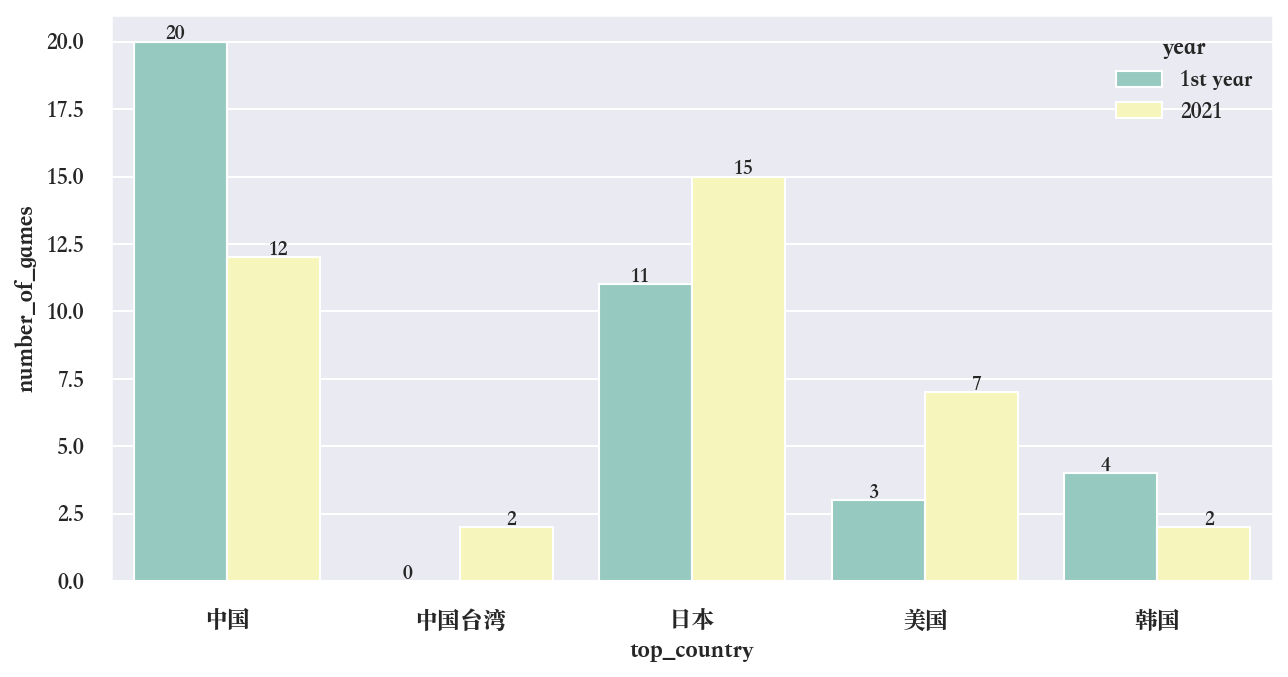

In [45]:
RPG1 = top_country_proportion(cat='RPG')
row1 = pd.DataFrame([['RPG','1st year','中国台湾',0,0]],columns=['cat2','year','top_country','number_of_games','proportion'])
RPG1 = pd.concat([RPG1,row1])
RPG1 = RPG1.sort_values(['top_country'])

RPG2021 = top_country_proportion_2021(cat='RPG')
RPG2021 = RPG2021.sort_values(['top_country'])

RPG对比 = pd.concat([RPG1,RPG2021])

plt.figure(figsize=(10,5),dpi=150)
sns.barplot(x='top_country',y='number_of_games',hue='year',data=RPG对比,palette='Set3')
for x,y in enumerate(RPG1['number_of_games']):
    plt.text(x-0.223,y+0.3,'%s' %round(y),ha='center',va='center')
for x,y in enumerate(RPG2021['number_of_games']):
    plt.text(x+0.223,y+0.3,'%s' %round(y),ha='center',va='center')
plt.show()

下两张表分别为发行后一年，以及2021年，RPG游戏在每个最高收入国家的游戏在哪三个国家有最长平均测试时间。
例：下图第一行数据的意思为，发行后一年在中国收入最高的RPG游戏平均在越南测试了285天。

从发行一年后收入最高的国家来看，在中国收入最高的游戏偏向去越南、菲律宾，及东南亚地区测试；日本收入最高的偏向去港澳台地区；韩国无明显偏好，亚洲、北美、南美都在测试范围；美国则偏向新加坡、英国、加拿大。

这与2021年收入最高国家的测试偏好有些许不同。从去年收入最高的国家来看，在中国测试的平均时长大大提高，基本都超过了180天。这似乎违背了‘游戏一般不去主要发行国家做测试’的理念。但是如果考虑到一些游戏在中国发行后表现不加，转而去其他国家发行后取得佳绩的例子，则可以合理化它们在中国测试较长的现象：由于发行日期是由下载量推算出来的，那么在中国发行后表现不佳（下载量低）的时间段很可能被划分为测试阶段。因此这种伪测试阶段也会被纳入平均测试时长的计算中，从而出现中国测试过长的现象。这反映了部分RPG游戏可能在2020年在中国发行后成绩不佳，从而到日本、台湾和韩国再次发行并在2021年取得佳绩。这也侧面性证明了台湾与韩国可能是RPG游戏的第二主要市场。

<mark>RPG游戏发行后一年最高收入国家对应测试时长最长的三个国家

In [863]:
top_rev_country_vs_test_country(cat='RPG')

,cat2,top_release_country_1st_year,test_country,duration(days)
0,RPG,中国,越南,285 days
1,RPG,中国,菲律宾,285 days
2,RPG,中国,英国,285 days
3,RPG,日本,中国香港,132 days
4,RPG,日本,中国澳门,132 days
5,RPG,日本,中国台湾,132 days
6,RPG,韩国,中国,267 days
7,RPG,韩国,加拿大,87 days
8,RPG,韩国,阿根廷,28 days
9,RPG,美国,新加坡,50 days


<mark>RPG游戏2021年年最高收入国家对应测试时长最长的三个国家

In [862]:
top_rev_country_vs_test_country_2021(cat='RPG')

,cat2,top_country_2021,test_country,duration(days)
0,RPG,日本,中国,267 days
1,RPG,日本,日本,1 days
2,RPG,中国,马来西亚,217 days
3,RPG,中国,中国台湾,189 days
4,RPG,中国,中国澳门,189 days
5,RPG,美国,新加坡,50 days
6,RPG,美国,英国,14 days
7,RPG,美国,美国,14 days
8,RPG,中国台湾,中国,6 days
9,RPG,韩国,中国,184 days


### 模拟
下图为模拟游戏在发行后一年和2021年收入最高国家的分布。

收入最高国家分布方面，模拟游戏主要收入国家为中国，美国与日本。发行后一年分别有6款（55%）游戏在中国收入最高，5款（45%）游戏在美国收入最高。2021年收入最高国家分布对比发行一年后有些许不同：美国7款（64%），中国3款（27%），日本1款（9%）。不难推断出，在发行后一年中国收入最高的这6款游戏中，有2款在2021年转向去了美国（约战：精灵再临、我的孩子：生命之源），1款转向去了日本（叫我皇上），说明了近两年模拟类游戏手中国家正在向美国和日本偏移。值得一提的是，叫我皇上作为一款中国IP游戏在日本表现突出，再次说明了日本手游玩家对中国游戏IP的热衷度较高。

<center><mark>模拟游戏在发行后一年及2021年收入最高国家分布

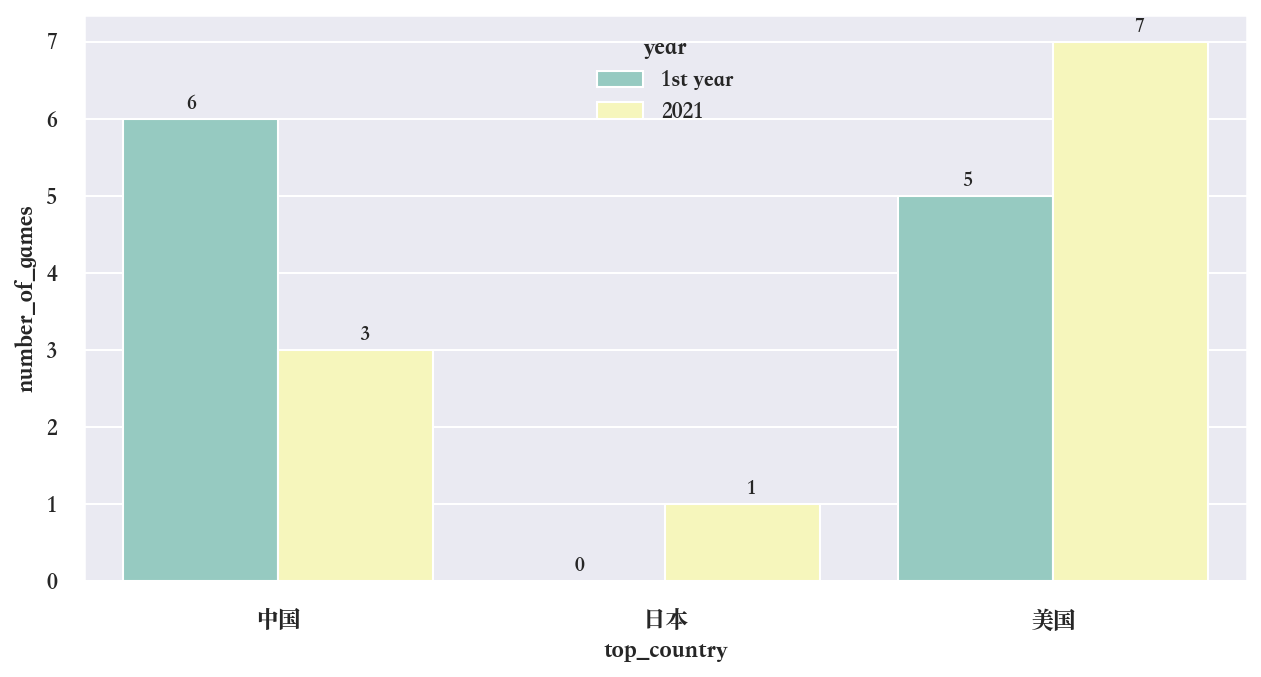

In [46]:
模拟1 = top_country_proportion(cat='模拟')
row1 = pd.DataFrame([['模拟','1st year','日本',0,0]],columns=['cat2','year','top_country','number_of_games','proportion'])
模拟1 = pd.concat([模拟1,row1])
模拟1 = 模拟1.sort_values(['top_country'])

模拟2021 = top_country_proportion_2021(cat='模拟')
模拟2021 = 模拟2021.sort_values(['top_country'])

模拟对比 = pd.concat([模拟1,模拟2021])
plt.figure(figsize=(10,5),dpi=150)
sns.barplot(x='top_country',y='number_of_games',hue='year',data=模拟对比,palette='Set3')
for x,y in enumerate(模拟1['number_of_games']):
    plt.text(x-0.223,y+0.2,'%s' %round(y),ha='center',va='center')
for x,y in enumerate(模拟2021['number_of_games']):
    plt.text(x+0.223,y+0.2,'%s' %round(y),ha='center',va='center')
plt.show()

下两张表分别为发行后一年，以及2021年，模拟游戏在每个最高收入国家的游戏在哪三个国家有最长平均测试时间。

从发行一年后收入最高的国家来看，中国和美国收入最高的游戏都偏向去欧洲及北美地区测试。值得一提的是，在中国收入最高的这些游戏在欧洲及北美地区测试了两年左右的时间，大大超过了模拟类游戏测试的平均时长（94天）。这可能间接性解释了其中2款游戏在2021年收入最高国家从中国转向美国的原因，即北美和欧洲玩家也对游戏有充分认知，因此增加了这些地区成为2021年主要收入来源国家的可能性。

从2021年收入最高的国家来看，这些测试国家较典型：美国收入最高的游戏依旧偏向欧洲和北美地区测试；中国收入最高的游戏偏向去港澳台，其测试国家都为主要发行国家的典型代表。至于在日本收入最高的这1款游戏，其在中国测试最长的原因可能与3.1.2小节中解释的伪测试时期相仿。


<mark>模拟游戏发行后一年最高收入国家对应测试时长最长的三个国家

In [881]:
top_rev_country_vs_test_country(cat='模拟')

,cat2,top_release_country_1st_year,test_country,duration(days)
0,模拟,中国,挪威,755 days
1,模拟,中国,英国,740 days
2,模拟,中国,加拿大,740 days
3,模拟,美国,美国,15 days
4,模拟,美国,加拿大,14 days
5,模拟,美国,瑞典,14 days


<mark>模拟游戏2021年最高收入国家对应测试时长最长的三个国家

In [882]:
top_rev_country_vs_test_country_2021(cat='模拟')

,cat2,top_country_2021,test_country,duration(days)
0,模拟,美国,美国,15 days
1,模拟,美国,加拿大,14 days
2,模拟,美国,瑞典,14 days
3,模拟,中国,中国香港,117 days
4,模拟,中国,中国澳门,117 days
5,模拟,中国,中国台湾,117 days
6,模拟,日本,中国,52 days


### 益智
下图为益智游戏在发行后一年和2021年收入最高国家的分布。

收入最高国家分布方面，RPG游戏主要收入国家为美国，中国日本与台湾。发行后一年有11款（85%）游戏在美国收入最高，台湾和日本各有1款（8%）游戏收入最高。2021年最高收入国家分布与发行后一年基本一致，美国10款（77%），日本2款（15%），中国1款（8%）。从图中能明显看出在各时间段，美国都是益智游戏的主要收入来源国家。

<center><mark>益智游戏在发行后一年及2021年收入最高国家分布

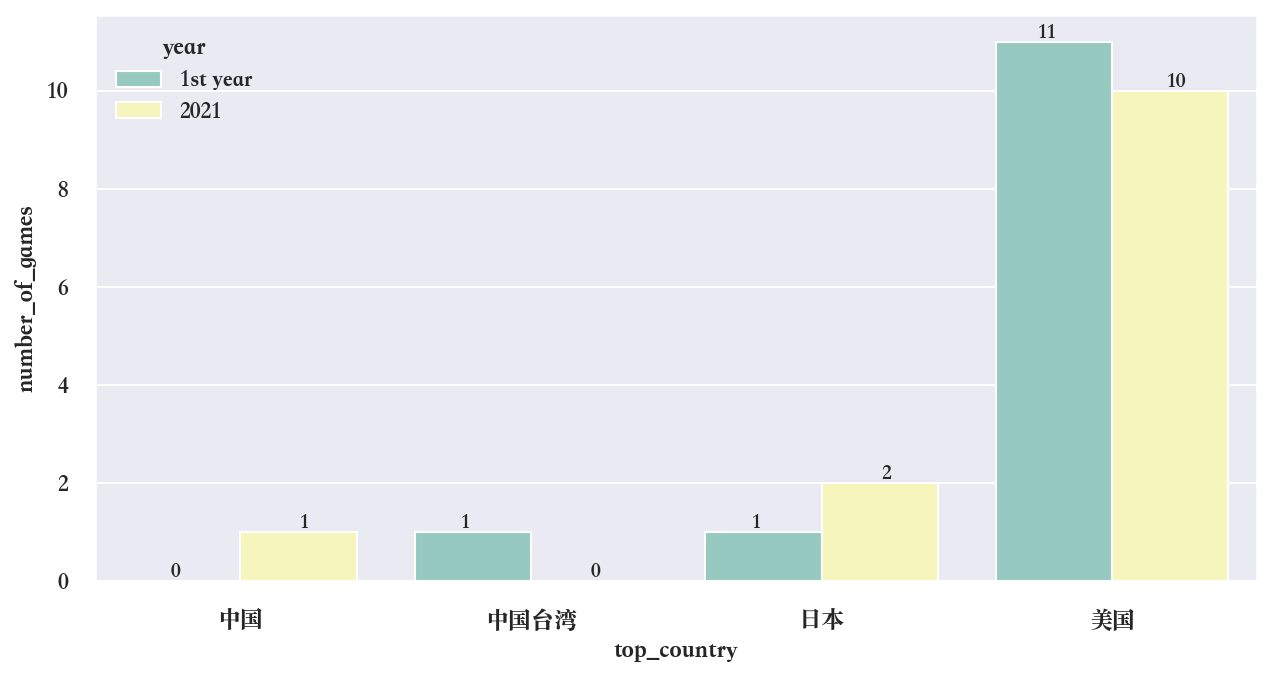

In [47]:
益智1 = top_country_proportion(cat='益智')
row1 = pd.DataFrame([['益智','1st year','中国',0,0]],columns=['cat2','year','top_country','number_of_games','proportion'])
益智1 = pd.concat([益智1,row1])
益智1 = 益智1.sort_values(['top_country'])

row2 = pd.DataFrame([['益智','2021','中国台湾',0,0]],columns=['cat2','year','top_country','number_of_games','proportion'])
益智2021 = top_country_proportion_2021(cat='益智')
益智2021 = pd.concat([益智2021,row2])
益智2021 = 益智2021.sort_values(['top_country'])

益智对比 = pd.concat([益智1,益智2021])

plt.figure(figsize=(10,5),dpi=150)
sns.barplot(x='top_country',y='number_of_games',hue='year',data=益智对比,palette='Set3')
for x,y in enumerate(益智1['number_of_games']):
    plt.text(x-0.223,y+0.2,'%s' %round(y),ha='center',va='center')
for x,y in enumerate(益智2021['number_of_games']):
    plt.text(x+0.223,y+0.2,'%s' %round(y),ha='center',va='center')
plt.show()

下两张表分别为发行后一年，以及2021年，益智游戏在每个最高收入国家的游戏在哪三个国家有最长平均测试时间。

从发行一年后收入最高的国家来看，美国收入最高的游戏偏向去菲律宾、墨西哥和阿塞拜疆测试；台湾收入最高的这款游戏在日本测试了544天；日本收入最高的这款游戏在菲律宾、新西兰和瑞典测试较长。

从2021年收入最高的国家来看，在美国收入最高的游戏测试国家与发行后一年完全一致，再次证明了大部分发行后一年在美国收入最高的游戏在2021年仍在美国收入最高；在日本收入最高的游戏偏向去北美地区测试；在中国收入最高的游戏在菲律宾、新西兰和瑞典测试较长，这与发行后一年在日本收入最高的这款游戏测试国家与时长完全相等，代表这款游戏发行后一年在日本收入最高，而在2021年转为中国。

总体来说，益智类游戏的测试国家与主要发行国家关联性不是很强，近乎在所有主要收入来源国家，此类游戏在欧美和菲律宾的测试时长都大大高于了其他地区。其原因可能与益智类游戏主要受众群体有关。AppAnnie数据显示头部益智类游戏在美国2021年均收入属中美日三国最高，为2.28亿美金（中国和日本分别为3300万和4600万），说明益智类游戏主要受众群体为美国，因此为在欧美国家测试较长带来一定合理性。



<mark>益智游戏发行后一年最高收入国家对应测试时长最长的三个国家

In [866]:
top_rev_country_vs_test_country(cat='益智')

,cat2,top_release_country_1st_year,test_country,duration(days)
0,益智,美国,菲律宾,553 days
1,益智,美国,墨西哥,496 days
2,益智,美国,阿塞拜疆,171 days
3,益智,中国台湾,日本,544 days
4,益智,日本,菲律宾,547 days
5,益智,日本,新西兰,504 days
6,益智,日本,瑞典,441 days


<mark>模拟游戏2022年最高收入国家对应测试时长最长的三个国家

In [867]:
top_rev_country_vs_test_country_2021(cat='益智')

,cat2,top_country_2021,test_country,duration(days)
0,益智,美国,菲律宾,553 days
1,益智,美国,墨西哥,496 days
2,益智,美国,阿塞拜疆,171 days
3,益智,日本,加拿大,109 days
4,益智,日本,巴西,60 days
5,益智,日本,美国,8 days
6,益智,中国,菲律宾,547 days
7,益智,中国,新西兰,504 days
8,益智,中国,瑞典,441 days


### 策略
下图为策略游戏在发行后一年和2021年收入最高国家的分布。

收入最高国家分布方面，发行后一年与2021年收入最高国家分布完全一致，均为美国9款（69%）；中国、俄罗斯、日本与韩国各1款（8%）(这四款游戏分别为无尽的拉格朗日、战争与魔法、新三国志和Random Dice）。与益智类游戏相似，策略类游戏收入最高国家分布两极分化现象较明显，美国为大部分头部策略类游戏主要发行国家及主要收入来源，如Rise of Kingdoms及Guns of Glory。AppAnnie数据显示头部策略类游戏在美国2021年均收入属中美日三国最高，为1.34亿美金（中国和日本分别为7200万和3800万）。此外，在这13款策略游戏样本中，12款均为SLG类（除了Random Dice），而美国2021年头部SLG游戏平均收入分别是中国和日本的1.7和3.3倍（AppAnnie数据显示），更加印证了策略类（SLG）游戏在美国市场的主导性。

此外，新三国志又是作为一款中国IP游戏而在日本表现突出的例子，总共100款游戏的样本中已经出现3例（前2例为三国传说、叫我皇上），再次证明了日本手游玩家对中国游戏IP的热衷度。

从完全一样的最高收入国家分布来看，可以说明策略类游戏普遍对主要发行国家有明确的定位（即在首次发行时已基本确定）。也可能是玩家对游戏粘性较强，单用户价值高（在美国仅次于RPG和益智类游戏），玩家愿意长期投入。

<center><mark>策略游戏在发行后一年及2021年收入最高国家分布

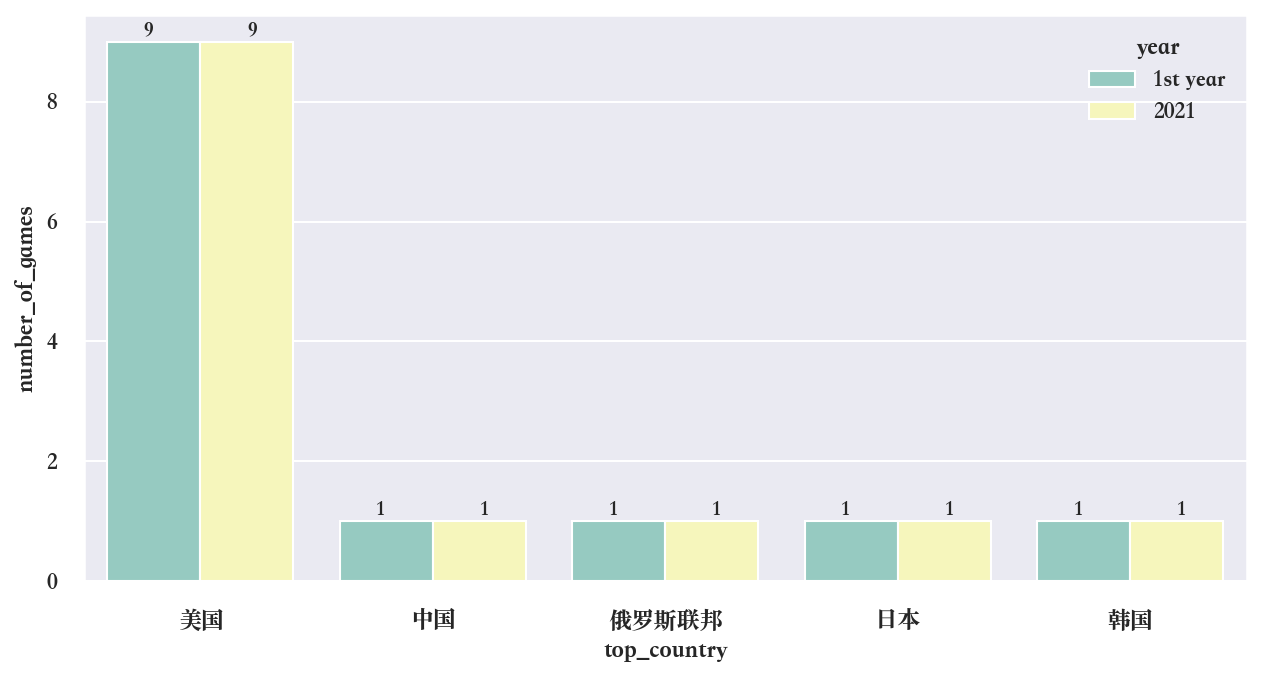

In [48]:
策略1 = top_country_proportion(cat='策略')
策略2021 = top_country_proportion_2021(cat='策略')
策略对比 = pd.concat([策略1,策略2021])
plt.figure(figsize=(10,5),dpi=150)
sns.barplot(x='top_country',y='number_of_games',hue='year',data=策略对比,palette='Set3')
for x,y in enumerate(策略1['number_of_games']):
    plt.text(x-0.223,y+0.2,'%s' %round(y),ha='center',va='center')
for x,y in enumerate(策略2021['number_of_games']):
    plt.text(x+0.223,y+0.2,'%s' %round(y),ha='center',va='center')
plt.show()

下表为发行后一年，策略游戏在每个最高收入国家的游戏在哪三个国家有最长平均测试时间。（由于其2021年收入最高国家分布和测试国家完全一致，这里只展现发行后一年一张表）。

美国收入最高的游戏偏向去亚美尼亚、蒙古等亚洲地区测试；中国收入最高的这款游戏只分别在土耳其、法国和德国测试一天（可能是这款游戏发行日期推算有误）；俄罗斯收入最高的这款游戏在东南亚地区测试较长；日本收入最高的这款游戏在中国测试最长（可能是伪测试阶段）；韩国收入最高的这款游戏在亚洲欧美地区都有测试。

总体而言，策略类游戏的测试国家与主要发行国家关联性不是很强。

<mark>策略游戏发行后一年最高收入国家对应测试时长最长的三个国家

In [873]:
top_rev_country_vs_test_country(cat='策略')

,cat2,top_release_country_1st_year,test_country,duration(days)
0,策略,美国,亚美尼亚,306 days
1,策略,美国,蒙古,305 days
2,策略,美国,柬埔寨,305 days
3,策略,中国,土耳其,1 days
4,策略,中国,法国,1 days
5,策略,中国,德国,1 days
6,策略,俄罗斯联邦,菲律宾,181 days
7,策略,俄罗斯联邦,马来西亚,180 days
8,策略,俄罗斯联邦,英国,180 days
9,策略,日本,中国,78 days


In [869]:
top_rev_country_vs_test_country_2021(cat='策略')

,cat2,top_country_2021,test_country,duration(days)
0,策略,美国,亚美尼亚,306 days
1,策略,美国,蒙古,305 days
2,策略,美国,柬埔寨,305 days
3,策略,中国,土耳其,1 days
4,策略,中国,法国,1 days
5,策略,中国,德国,1 days
6,策略,俄罗斯联邦,菲律宾,181 days
7,策略,俄罗斯联邦,马来西亚,180 days
8,策略,俄罗斯联邦,英国,180 days
9,策略,日本,中国,78 days


In [469]:
#字典：key=游戏名，value=下载标准值
games = df1['unified_product_name'].drop_duplicates()
z_scores_dict = {}
for game in games:

    g = df1['unified_product_name'] == game
    c = df1['country_cn'] == '全部'
    game_info = df1[g&c]
    first_day = df1['date'] >= df1['date'].min()
    last_day = df1['date'] <= df1['predicted_release_date']
    release_day = df1['date'] == df1['predicted_release_date']
    
    if game_info['predicted_release_date'].values[0] in game_info['date'].values:
        
        valid = game_info[first_day&last_day]
        game_release = game_info[release_day]
        
        x = game_release['download_1d'].values[0]
        mu = valid['download_1d'].mean()
        sd = valid['download_1d'].std()
        
        if math.isnan((x-mu)/sd) is False and ((x-mu)/sd) > 0:            
            z_scores_dict[game] = (x-mu)/sd 

#取标准值大于75分位数的游戏
big_z_score_games = []
for game,z_score in z_scores_dict.items():
    if z_score > np.percentile(np.array(list(z_scores_dict.values())),75):
        big_z_score_games.append(game)
big_z_score_games

['Homescapes',
 'My Talking Tom 2',
 'Family Island',
 'Tank Stars',
 'Tiles Hop: EDM Rush',
 'Candy Crush Friends Saga',
 'Zooba',
 'Kick the Buddy: Forever',
 'UNO by Mattel163',
 'Asphalt 9: Legends',
 'Legend of the Phoenix',
 'Dress up! Time Princess',
 'Top War: Battle Game',
 'Pocket World 3D',
 'Gallery: Coloring Book',
 'Merge Dragons',
 'Guardian Tales',
 'Tile Master 3D']

In [399]:
#下载量标准值大于75分位数游戏的top发行国家下载量分布
big_z_dict = {}
for game in big_z_score_games:
    g = df1['unified_product_name'] == game
    c = df1['country_cn'] != '全部'
    d_min = game_info['predicted_release_date'].values[0]
    d_max = (pd.to_datetime(d_min) + datetime.timedelta(days=365)).strftime('%Y-%m-%d')
    date_min = df1['date'] >= d_min
    date_max = df1['date'] <= d_max
    rev_ctry = df1[g&c&date_min&date_max].groupby(['country_cn'])['download_1d'].sum()
    rev_country = rev_ctry.reset_index().sort_values('download_1d',ascending = False).set_index('country_cn')[0:3]
    big_z_dict[game] = rev_country.index[0]

#每品类百分之几的游戏在发行一年内收入在某个国家最高
#to dataframe
d = {'number_of_games': big_z_dict.keys(),'top_country': big_z_dict.values()}
d = pd.DataFrame(d)


#算比例
global top_ctry_z
top_ctry_z = (d.groupby(['top_country']).count()).reset_index().sort_values('number_of_games',ascending = False).set_index('top_country')
top_ctry_z['proportion'] = top_ctry_z['number_of_games']/top_ctry_z['number_of_games'].sum()
top_ctry_z = top_ctry_z.reset_index()
top_ctry_z
  

,top_country,number_of_games,proportion
0,美国,7,0.388889
1,印度,6,0.333333
2,中国,2,0.111111
3,俄罗斯联邦,1,0.055556
4,巴西,1,0.055556
5,韩国,1,0.055556


In [401]:
#在上述国家拥有最高下载量的游戏在哪些国家有最长测试期（取前3）

#字典：这个品类有哪些游戏在这个国家收入最高 key=国家，value=游戏
ctry_dict_z = {}
for index,row in top_ctry_z.iterrows():
    game_list_z = []
    for game in big_z_score_games:
        if big_z_dict[game] == row['top_country']:
            game_list_z.append(game)
            ctry_dict_z[row['top_country']] = game_list_z

#在收入最高的这些国家中的游戏都喜欢去哪里测试（哪个国家平均测试期最长）
global test_vs_top_z
test_vs_top_z = pd.DataFrame()
for country in ctry_dict_z.keys():
    
    #所有在此国家的游有最高收入的游戏的数据
    g = test_data['unified_product_name'].isin(ctry_dict_z[country])
    c = test_data['country_cn'] != '全部'
    game_test_z = test_data[g&c] 
    country_test_z = game_test_z.groupby(['country_cn'])['date'].min()
    
    #算平均每国测试时长，取前3国家
    merged = pd.merge(game_test_z,country_test_z,on = ['country_cn','date']).drop_duplicates()
    merged['duration'] = merged['predicted_release_date'] - merged['date']
    merged.groupby(['country_cn'])['duration'].mean()
    merged1 = merged[['country_cn','duration']].sort_values(['duration'],ascending = False)
    merged1['top_release_country'] = country
    test_vs_top_z = pd.concat([test_vs_top_z,merged1[:3]])

test_vs_top_z = test_vs_top_z[['top_release_country','country_cn','duration']]
test_vs_top_z.columns = ['top_release_country','test_country','duration(days)']
nonzero = test_vs_top_z['duration(days)'] != '0 days'
test_vs_top_z = test_vs_top_z[nonzero]
test_vs_top_z


,top_release_country,test_country,duration(days)
42,美国,加拿大,119 days
51,美国,巴西,115 days
92,美国,印度尼西亚,114 days
103,印度,菲律宾,553 days
102,印度,墨西哥,496 days
101,印度,巴西,361 days
64,中国,菲律宾,148 days
63,中国,泰国,124 days
38,中国,澳大利亚,68 days
2,俄罗斯联邦,中国,193 days


## 平均用户价值与测试国家的关系
鉴于以上分析均表明游戏主要发行（受众）国家与其测试国家有一定相关性，就代表两者之间有共同之处。以下将讨论是否在单用户价值更高的国家测试的游戏对应单用户价值更高的发行国家。

下图为样本内所有游戏测试时段的平均用户价值对发行后平均用户价值的散点图及线性回归线。未从中发现二者相关性（相关性系数约等于0），因此无法判断是否在单用户价值更高的国家测试的游戏偏向于在单用户价值更高的国家发行。

这也存在一定的合理性，主要有三个原因：一是各品类游戏都偏向去小众游戏市场测试，而这些小众市场单用户价值普遍低于像中美日这样的主流市场，因此会发现不少游戏测试期单用户价值明显低于发行后单用户价值(粉色阴影区域）；二是大部分游戏在测试阶段并未完全开放诸如商店、抽奖等谋取收入的方式，这也会大大降低测试期的单用户投入；三是相反，有些游戏测试阶段玩家较少，因此单用户投入较多，但发行后吸引大量玩家下载，稀释了单用户投入（橙色阴影区域），明日方舟是个很好的例子，其平均每日单用户价值在测试期达到了540美金，但发行后回落到250美金，稀释了54%。

<center><mark>样本内所有游戏测试时段的平均用户价值对发行后平均用户价值的散点图

<Figure size 1500x750 with 0 Axes>

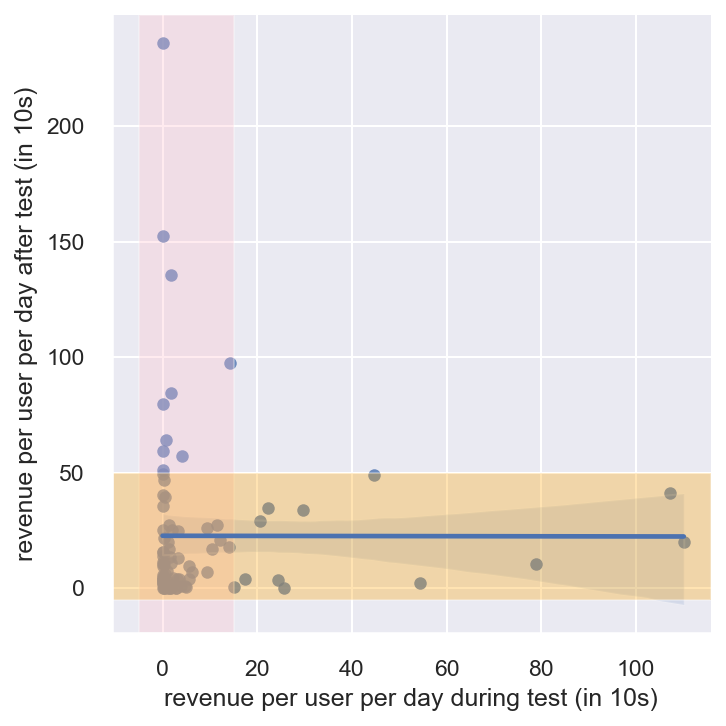

In [235]:
#测试前的平均用户价值和测试后平均用户价值关系
df1['rev/dl'] = df1['revenue_1d']/df1['download_1d']

after = df1['date'] >= df1['predicted_release_date']
before = df1['date'] < df1['predicted_release_date']
c = df1['country_cn'] != '全部'
df_after = df1[after&c].groupby(['unified_product_name'])['rev/dl'].mean().reset_index()
df_before = df1[before&c].groupby(['unified_product_name'])['rev/dl'].mean().reset_index()
revdl_all = pd.concat([df_before['rev/dl'],df_after['rev/dl'][:86]],axis=1)
revdl_all.columns = ['revenue per user per day during test (in 10s)','revenue per user per day after test (in 10s)']

plt.figure(figsize=(10,5),dpi=150)
sns.lmplot(x='revenue per user per day during test (in 10s)',y='revenue per user per day after test (in 10s)',data=revdl_all,palette='Set3')
plt.ylabel('revenue per user per day after test (in 10s)')
sns.set(style='darkgrid')
plt.axvspan(-5,15,facecolor='pink',alpha=0.3)
plt.axhspan(-5,50,facecolor='orange',alpha=0.3)
plt.show()

## 发行国家（中美日）与测试地区的关系
本小节主要分析在中国、美国、日本主要发行的游戏对每个测试地区的分布及偏向性。
下图展现了在中美日三国主要发行（发行当天下载量在中美日最高）的游戏在各个地区测试的分布情况。不难看出，三国的测试习性不管从地区偏向性，还是覆盖率方面都不尽相同。

测试地区偏向性方面，三国对于测试地区无明显偏向性，但在中国主要发行的游戏去其他亚太地区测试的比率最高，为50%，其次为东南亚（35%）；在美国主要发行的游戏去北美测试的比率最高，为96%，其次为欧洲（89%）；在日本主要发行的游戏去其他亚太地区测试比率最高，为75%，东南亚和北美比率一样，均为69%。这与在3.1.1小节的结论一致，则游戏普遍会去规模不大但是又对主要发行市场有一定代表性的国家测试，因此可以判断出亚太地区中国和日本玩家最具代表性；北美与欧洲地区的国家对美国玩家最具代表性。

测试地区覆盖率方面，在美国和日本主要发行的游戏覆盖率明显高于中国，所有地区的测试比率均在78%-96%及50%-75%；而中国仅在23%-50%。这说明了在美国和日本主要发行的游戏偏向于‘广撒网’式测试，即去各个地区均开放测试以吸引全球玩家，相反中国游戏与游戏之间测试国家重叠率低，倾向于小范围地区测试。导致中国测试国家覆盖率低主要有两个因素：第一是中国独有的版权政策，使得中国与国外发行的游戏相互流通性较弱；第二是中国除应用商店外还有其他的小众测试渠道，例如安装包和邀请码，而美国和日本测试渠道只有应用商店，这大大降低了中国去其他国家测试的必要性，同时也降低了测试成本。

据Newzoo2021年全球游戏市场报告显示，在中国手游市场排名前10的游戏发行商中，前9名都是中国本地游戏发行商，而美国与日本分别只有4家和8家，再次印证了中国游戏的本地化。

但总体来说，主要发行国家与测试地区存在一定关联性。

In [135]:
#各地区国家lists
areas = {'东南亚': ['菲律宾','越南','老挝','柬埔寨','泰国','马来西亚','文莱','新加坡','印度尼西亚'],
'欧洲': ['芬兰','瑞典','挪威','冰岛','丹麦','俄罗斯联邦','乌克兰','波兰','法国','英国','意大利','德国'],
 '南美': ['苏里南','秘鲁','玻利维亚','巴西','智利','乌拉圭','阿根廷','巴拉圭'],
         '中东':['土耳其','沙特阿拉伯','南非','阿联酋','以色列'],
 '北美': ['加拿大','墨西哥'],'其他亚太':['韩国','印度','阿塞拜疆','亚美尼亚','蒙古','柬埔寨','中国香港','中国澳门','中国台湾','澳大利亚','新西兰']}

In [51]:
#在某国发行的游戏在各地区国家测试的比率
def area_prop(ctry_release):
    global area_proportion
    area_proportion = {}
    for continent in areas.keys(): 
        is_test = []
        for game in ctry_release:
            g = test_data['unified_product_name'] == game
            c = test_data['country_cn'] != '全部'
            game_data = test_data[g&c]
            game_data = game_data.groupby(['country_cn','predicted_release_date'])['date'].min()
            game_data = game_data.reset_index()
            game_data['dur'] =game_data['predicted_release_date'] - game_data['date']
            game_data.sort_values(['dur'],ascending=False)
            game_data['dur'] = game_data['dur'].apply(lambda x:int(x.days))
            
            tc = game_data['country_cn'].isin(areas[continent])
            game_data = game_data[tc]
            
            if len(game_data) >= 1:
                is_test.append(game)
        area_proportion[continent] = len(is_test)/len(ctry_release)
    return area_proportion

In [52]:
#每个游戏是否在某国发行当天下载量排前10
def games_in_top_markets(country=''):
    global ctry_release
    ctry_release = []
    games = df1['unified_product_name'].drop_duplicates()
    for game in games:
        g = df1['unified_product_name'] == game
        c = df1['country_cn'] != '全部'
        rl = df1['date'] == df1['predicted_release_date']
        game_info = df1[g&c&rl]
        game_info = game_info.groupby(['country_cn'])['download_1d'].max()
        game_info = game_info.reset_index().sort_values('download_1d',ascending = False).set_index('country_cn')[0:10]
        if country in list(game_info.index):
            ctry_release.append(game)
    return ctry_release

In [53]:
中国主要发行 = games_in_top_markets(country='中国')
美国主要发行 = games_in_top_markets(country='美国')
日本主要发行 = games_in_top_markets(country='日本')

In [250]:
中国测试偏好 = area_prop(ctry_release=中国主要发行)
中国测试偏好

{'东南亚': 0.35, '欧洲': 0.25, '南美': 0.225, '中东': 0.25, '北美': 0.35, '其他亚太': 0.5}

In [251]:
美国测试偏好 = area_prop(ctry_release=美国主要发行)
美国测试偏好

{'东南亚': 0.8666666666666667,
 '欧洲': 0.8888888888888888,
 '南美': 0.8666666666666667,
 '中东': 0.7777777777777778,
 '北美': 0.9555555555555556,
 '其他亚太': 0.8888888888888888}

In [252]:
日本测试偏好 = area_prop(ctry_release=日本主要发行)
日本测试偏好

{'东南亚': 0.6875,
 '欧洲': 0.625,
 '南美': 0.625,
 '中东': 0.5,
 '北美': 0.6875,
 '其他亚太': 0.75}

<center><mark>所有在中美日主要发行的样本内游戏测试地区分布

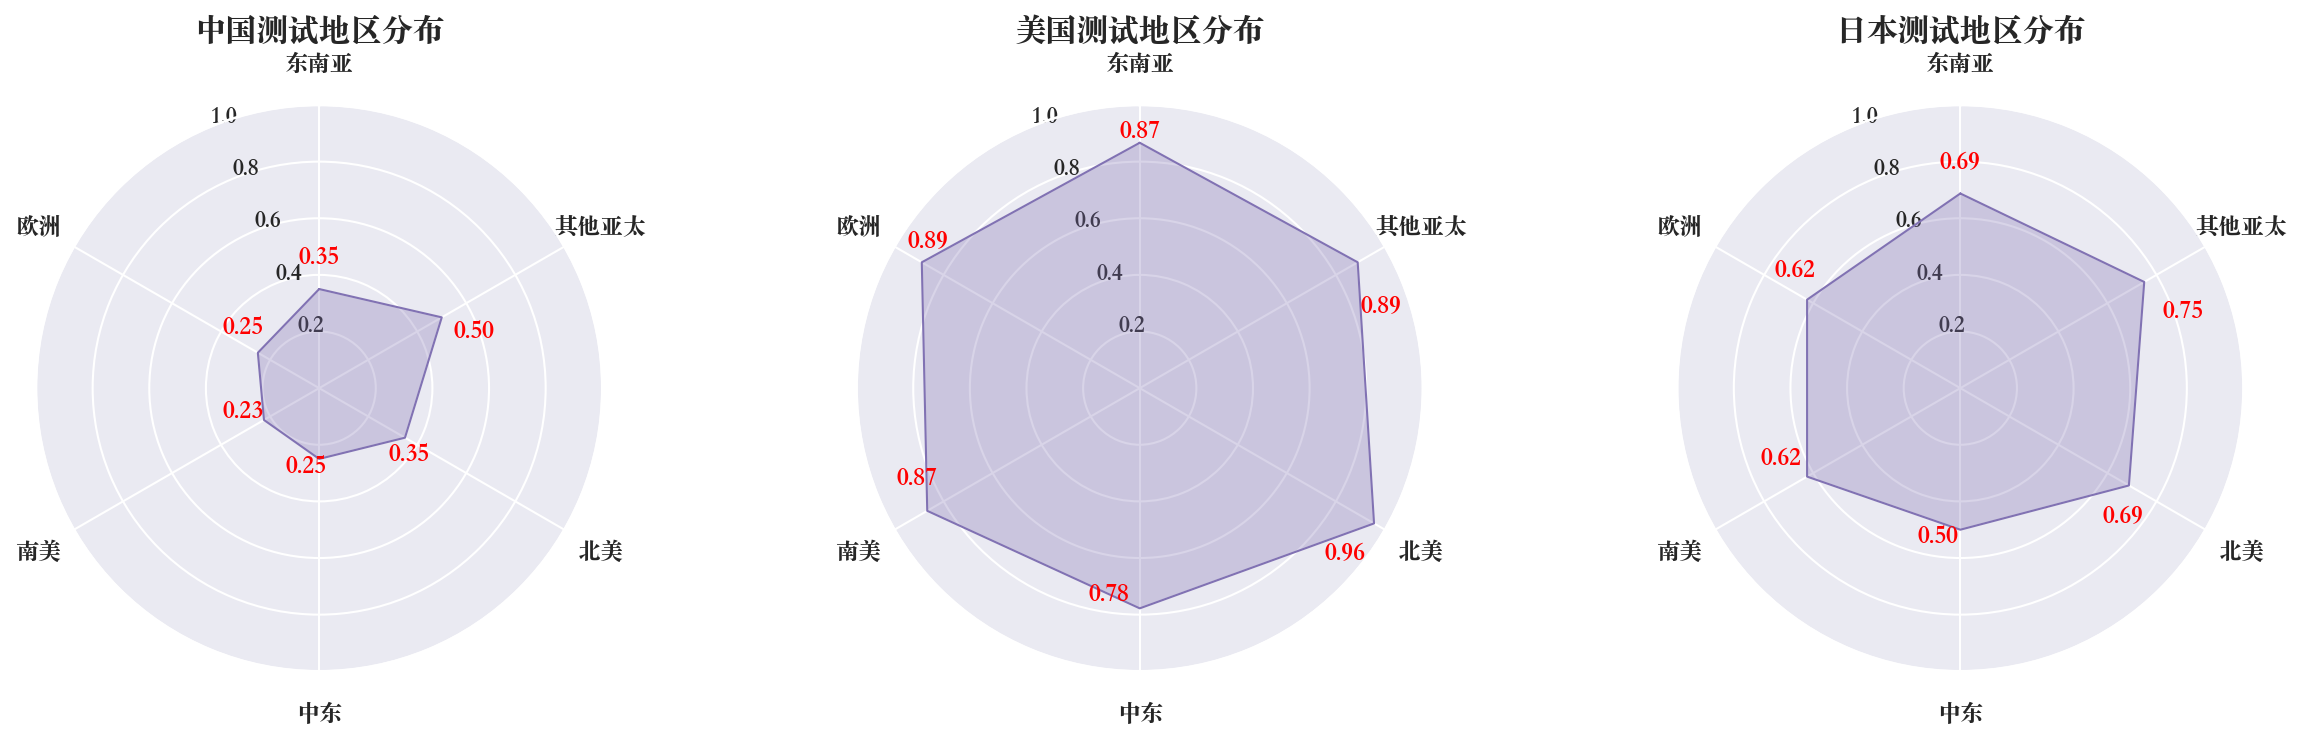

<Figure size 2500x1250 with 0 Axes>

In [294]:
areas_list = areas.keys()
theta = np.linspace(0,2*np.pi,len(areas_list),endpoint=False)
theta1 = np.concatenate((theta,[theta[0]]))

cn_prop = list(中国测试偏好.values())
cn_prop1 = np.concatenate((cn_prop,[cn_prop[0]]))
ax1 = plt.subplot(131,projection='polar')
ax1.plot(theta1,cn_prop1,'m-',lw=1,alpha=1)
ax1.fill(theta1,cn_prop1,'m',alpha=0.3)
ax1.set_thetagrids(theta*180/np.pi,areas_list)
ax1.set_ylim(0,1)
ax1.set_theta_zero_location('N')
ax1.set_title('中国测试地区分布',fontsize=15)
中国测试偏好1 = {'area':list(中国测试偏好.keys()),'prop':list(中国测试偏好.values())}
中国测试偏好1 = pd.DataFrame(中国测试偏好1)
for x,y in enumerate(中国测试偏好1['prop']):
    plt.text(x,y+0.07,'%.2f'%y,ha='center',va='bottom',color='red',fontsize=12)

us_prop = list(美国测试偏好.values())
us_prop1 = np.concatenate((us_prop,[us_prop[0]]))
ax2 = plt.subplot(132,projection='polar')
ax2.plot(theta1,us_prop1,'m-',lw=1,alpha=1)
ax2.fill(theta1,us_prop1,'m',alpha=0.3)
ax2.set_thetagrids(theta*180/np.pi,areas_list)
ax2.set_ylim(0,1)
ax2.set_theta_zero_location('N')
ax2.set_title('美国测试地区分布',fontsize=15)
美国测试偏好1 = {'area':list(美国测试偏好.keys()),'prop':list(美国测试偏好.values())}
美国测试偏好1 = pd.DataFrame(美国测试偏好1)
for x,y in enumerate(美国测试偏好1['prop']):
    plt.text(x,y,'%.2f'%y,ha='center',va='bottom',color='red',fontsize=12)


jp_prop = list(日本测试偏好.values())
jp_prop1 = np.concatenate((jp_prop,[jp_prop[0]]))
ax3 = plt.subplot(133,projection='polar')
ax3.plot(theta1,jp_prop1,'m-',lw=1,alpha=1)
ax3.fill(theta1,jp_prop1,'m',alpha=0.3)
ax3.set_thetagrids(theta*180/np.pi,areas_list)
ax3.set_ylim(0,1)
ax3.set_theta_zero_location('N')
ax3.set_title('日本测试地区分布',fontsize=15)
日本测试偏好1 = {'area':list(日本测试偏好.keys()),'prop':list(日本测试偏好.values())}
日本测试偏好1 = pd.DataFrame(日本测试偏好1)
for x,y in enumerate(日本测试偏好1['prop']):
    plt.text(x,y+0.07,'%.2f'%y,ha='center',va='bottom',color='red',fontsize=12)


plt.rcParams['figure.figsize'] = (20.0,5.0)
plt.figure(figsize=(10,5),dpi=250)
plt.show()

In [60]:
def area_specific_prop(ctry_release,dist,area):
    global specific_prop 
    area_specific_prop = {}
    for ctry in areas[area]:
        istest = []
        for game in ctry_release:
            g = test_data['unified_product_name'] == game
            c = test_data['country_cn'] != '全部'
            game_data = test_data[g&c]
            game_data = game_data.groupby(['country_cn','predicted_release_date'])['date'].min()
            game_data = game_data.reset_index()
            game_data['dur'] =game_data['predicted_release_date'] - game_data['date']
            game_data['dur'] = game_data['dur'].apply(lambda x:int(x.days))
            
            tc = game_data['country_cn'].isin([ctry])
            game_data = game_data[tc]
            
            if len(game_data) >= 1:                
                istest.append(game)
                
        area_specific_prop[ctry] = len(istest)/(dist[area]*len(ctry_release))
        
    prop_dict={'test_country':area_specific_prop.keys(),'test_proportion':area_specific_prop.values()}
    prop_df = pd.DataFrame(prop_dict)
    
    return prop_df

In [61]:
中国其他亚太=area_specific_prop(ctry_release=中国主要发行,dist=中国测试偏好,area='其他亚太')
中国其他亚太

,test_country,test_proportion
0,韩国,0.40
1,印度,0.40
2,阿塞拜疆,0.25
3,亚美尼亚,0.20
4,蒙古,0.20
5,柬埔寨,0.40
6,中国香港,0.90
7,中国澳门,0.60
8,中国台湾,0.85
9,澳大利亚,0.60


In [62]:
日本其他亚太=area_specific_prop(ctry_release=日本主要发行,dist=日本测试偏好,area='其他亚太')
日本其他亚太

,test_country,test_proportion
0,韩国,0.750000
1,印度,0.666667
2,阿塞拜疆,0.416667
3,亚美尼亚,0.416667
4,蒙古,0.416667
5,柬埔寨,0.416667
6,中国香港,1.000000
7,中国澳门,0.666667
8,中国台湾,0.916667
9,澳大利亚,0.750000


In [63]:
中国其他亚太['main_country'] = '中国'
日本其他亚太['main_country'] = '日本'
中日其他亚太 = pd.concat([中国其他亚太,日本其他亚太])
中日其他亚太

,test_country,test_proportion,main_country
0,韩国,0.400000,中国
1,印度,0.400000,中国
2,阿塞拜疆,0.250000,中国
3,亚美尼亚,0.200000,中国
4,蒙古,0.200000,中国
5,柬埔寨,0.400000,中国
6,中国香港,0.900000,中国
7,中国澳门,0.600000,中国
8,中国台湾,0.850000,中国
9,澳大利亚,0.600000,中国


具体到国家，下两张图分别为中美日主要发行的游戏在测试比率最高的地区的国家测试分布，由于中国和日本主下载量高的游戏都在其他亚太地区测试比率最高，下图合并了两国在亚太地区国家测试分布，以方便比较。

从下图可以看出在大部分其他亚太地区国家，日本下载量高的游戏普遍比中国测试比率高，其原因与以上提及的‘广撒网式’测试有关。除此之外，香港为中日两国下载量高的游戏在其他亚太地区测试比率最高的国家（地区），其中90%在亚太地区测试的中国游戏曾在香港测试、100%在亚太地区测试的日本游戏曾在香港测试。测试比率仅次于香港的有台湾（85%和92%）以及澳大利亚（60%和75%）。

两国测试比率差距最大的亚太地区国家为韩国（差距为35%）及印度（差距为27%），说明在日本下载量高的游戏普遍比中国更偏向于去韩国和印度测试。Newzoo2021年全球游戏市场报告数据显示，韩国手游玩家年龄、性别分布与日本雷同、2019-2024手游总收入预测复合增长率略高于日本。

<center><mark>中日在亚太地区国家测试分布

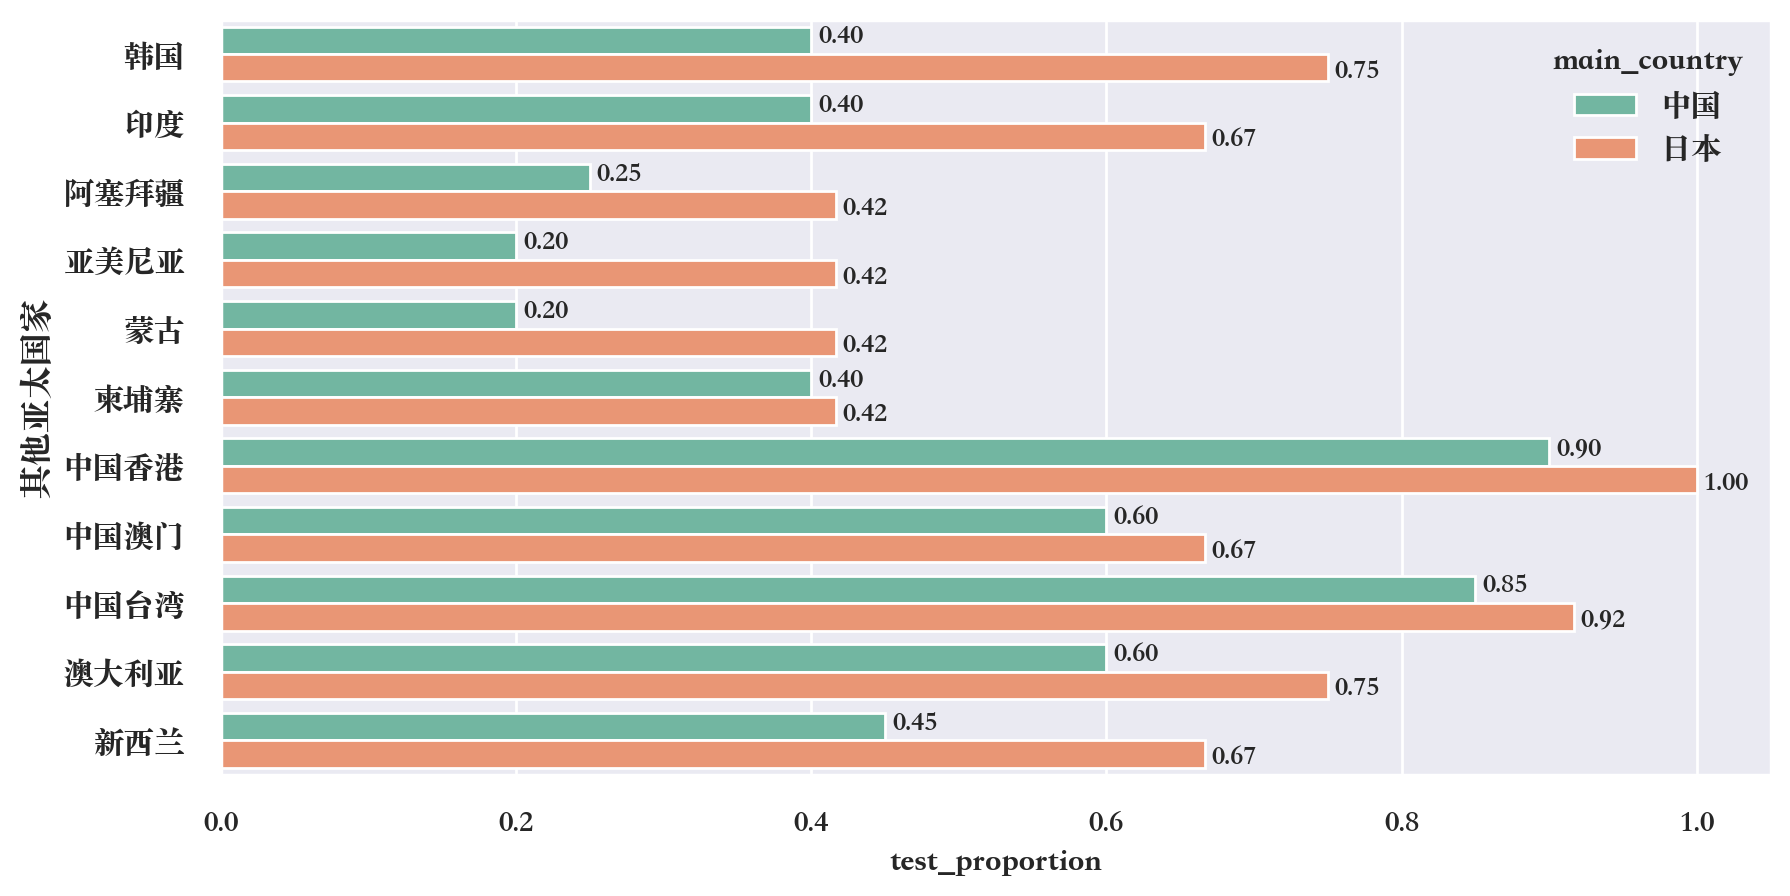

In [293]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(y='test_country',x='test_proportion',hue='main_country',data=中日其他亚太,palette='Set2',orient='h')
for y,x in enumerate(中国其他亚太['test_proportion']):
    plt.text(x+0.02,y-0.25,'%.2f'%x,ha='center',va='center')
for y,x in enumerate(日本其他亚太['test_proportion']):
    plt.text(x+0.02,y+0.25,'%.2f'%x,ha='center',va='center')
plt.ylabel('其他亚太国家')
plt.show()

In [70]:
美国北美=area_specific_prop(ctry_release=美国主要发行,dist=美国测试偏好,area='北美')
美国北美

,test_country,test_proportion
0,加拿大,1.000000
1,墨西哥,0.883721


美国方面，其在北美地区的测试国家偏好较为明显，所有在美国下载量高的游戏均曾在加拿大测试，代表加拿大是对美国游戏市场最具代表性的国家。Newzoo2021年全球游戏市场报告数据显示，虽然美国线上人口是加拿大的8.3倍，但是加拿大与美国手游玩家年龄、性别分布相似，智能手机用户与手机游戏收入增长率直至2024年也将保持一致，代表近几年加拿大还将继续为美国手游市场最具代表性国家。

其余各主要发行国家测试地区国家测试比率参见附录5.2。

<center><mark>美国在北美地区国家测试分布

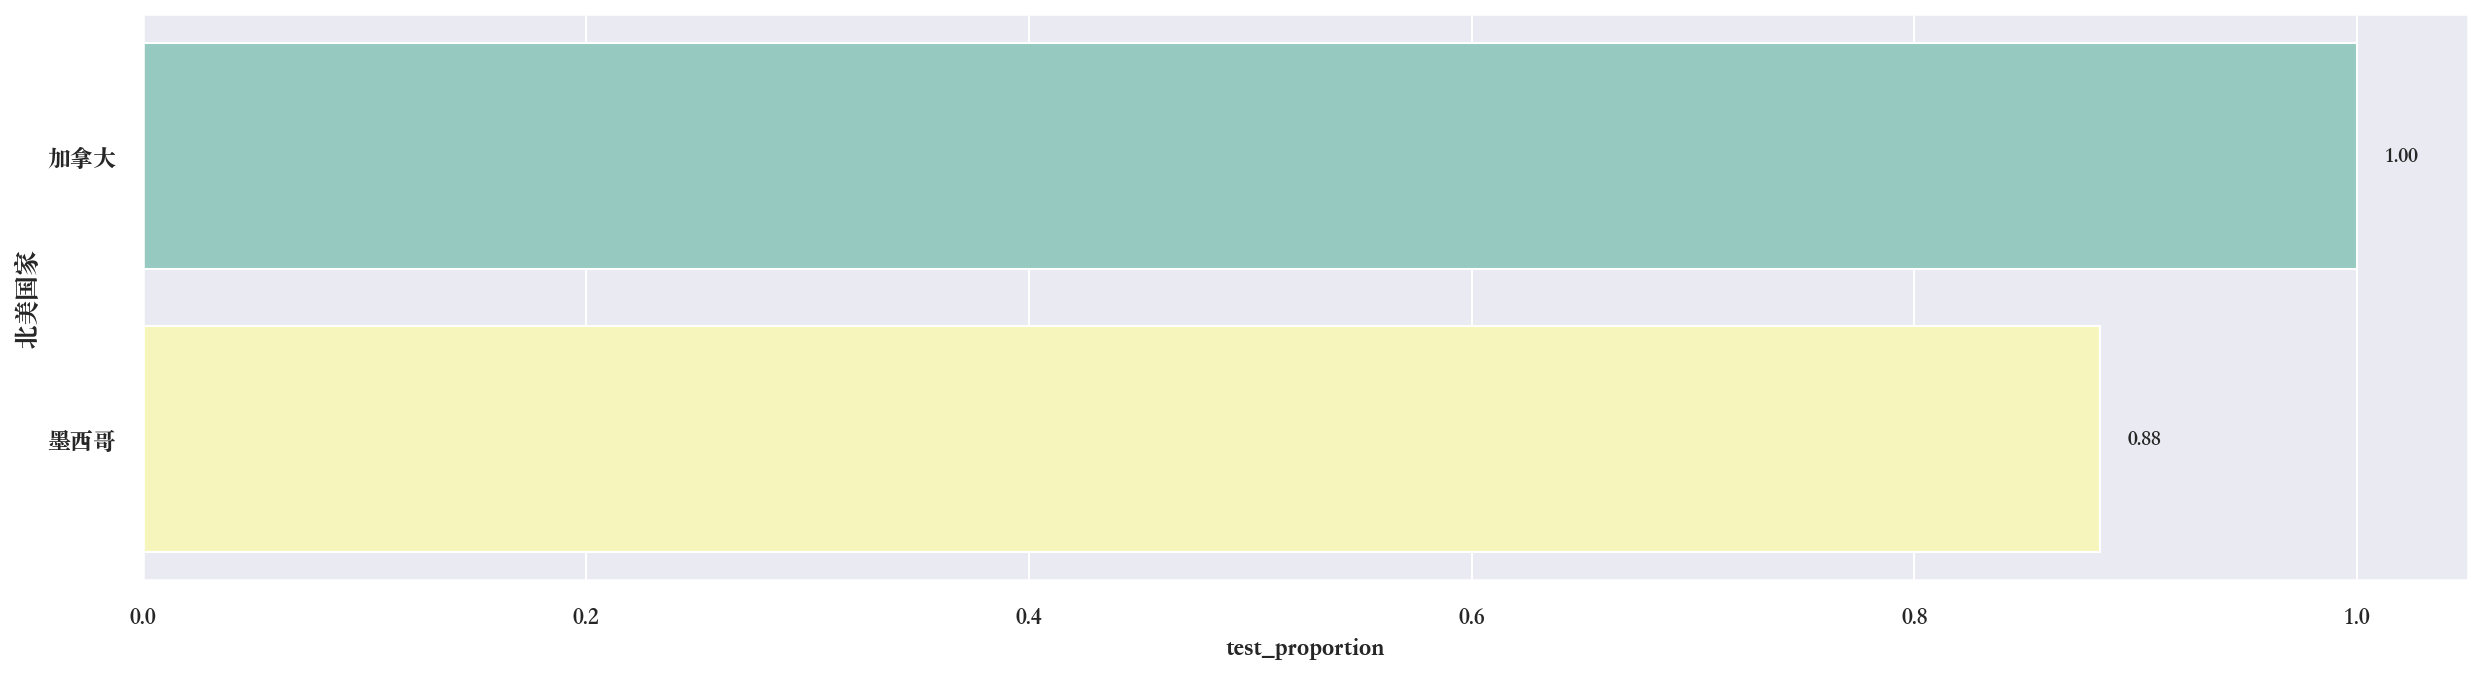

In [134]:
sns.barplot(y='test_country',x='test_proportion',data=美国北美,palette='Set3',orient='h')
for y,x in enumerate(美国北美['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('北美国家')
plt.show()

# 参考建议
以下建议均以本报告数据与分析结论为基石，因本报告采取样本均为头部游戏且均有在美国发行，所有建议存在一定局限性，需做综合考量以下最终结论。

1. **建议各品类游戏测试在30-200天**，据2.4小节‘样本内所有游戏日均收入及下载量对测试时长散点图’显示，测试期过长的游戏普遍拥有较低日均收入及日均下载量，且大部分头部游戏日均收入与测试时长呈（中强度）负相关。


2. 建议各品类游戏都去**对主要发行国家有一定代表性的小众国家测试**。主要市场为中国和日本测试国家偏好较为一致，两国都偏向去东南亚和其他亚太地区测试，典型测试国家有**香港、台湾、马来西亚、菲律宾、新加坡**；美国为主要市场的游戏偏向去欧美及北美地区测试，典型测试国家有**加拿大、英国、德国、法国**。


3. **东南亚与中东地区国家也可以成为未来主要发行国家之一**，其原因主要有三点：第一，这两个地区都属于亚太地区，其手游玩家与中国市场有一定相似性；第二，据Newzoo2021全球手游市场报告显示，马来西亚与土耳其地区2019-2024年手游总收入复合增长率预测将达到19.5%和14.4%，对比国内12.9%和日本3.4%，均属于中高增速国家；第三，中东文化独特，本地化游戏资源匮乏，未来渗透率有望提高。


4. **中国IP游戏有望在日本市场得到好的发展**。日本手游玩家对中国游戏IP存在一定热衷度，例如新三国志（策略类）和叫我皇上（模拟类）2021年都在日本表现突出。

# 附录

## 所有样本内游戏名称

In [161]:
def all_games(cat2):
    allgames = df1.groupby(['cat2','unified_product_name'])['date'].min()
    allgames = allgames.reset_index()
    allgames = allgames[['cat2','unified_product_name']]
    return allgames[allgames['cat2'] == cat2]

#更改cat2变量查看该品类所有样本内游戏
all_games(cat2='策略')

,cat2,unified_product_name
83,策略,Art of War: Legions
84,策略,Battle Warship: Naval Empire
85,策略,Clash of Empires 2019
86,策略,GWENT: The Witcher Card Game
87,策略,Guns of Glory
88,策略,Infinite Lagrange
89,策略,Kiss of War
90,策略,Random Dice
91,策略,Rise of Empire
92,策略,Rise of Kingdoms


## 发行日期推算方法

In [ ]:
#大推期计算
game_list = df['unified_product_name'].drop_duplicates()
game_dict = {}
def release_date_predict(games = game_list):
    
    for game in games:
        game_dict[game] = '' 
               
        g = df['unified_product_name'] == game
        c = df['country_cn'] == '全部'
        game_info = df[g & c] #这个游戏在所有国家所有商店的信息
        dates_in_order = sorted(list(game_info['date'].drop_duplicates())) #日期表
           
        dates = []
        for date in dates_in_order:
            
            #条件1: 如果前十天有最高下载量，那么那天就是发行日
            first_10_days = dates_in_order[0:9]
            dd = game_info['date'] == date           
            if (date in first_10_days) and (game_info[dd]['download_1d']).values[0] == game_info['download_1d'].max():
                
                dates.append(date.strftime('%Y-%m-%d'))
                          
            #条件2:当天下载量大于后一年平均下载量，且高于从测试日期到当天平均值的1.6倍标准差
            elif dates == []:
                           
                bd = game_info['date'] <= date
                dd = game_info['date'] == date
                game_info_bd = game_info[bd]
                
                x = game_info[dd]['download_1d'].values[0] #当天下载量
                mu = game_info_bd['download_1d'].mean()    #第一天到当天下载量平均值
                sd = game_info_bd['download_1d'].std()     #第一天到当天下载量标准差

                #date_max = (pd.to_datetime(date) + datetime.timedelta(days=365)).strftime('%Y-%m-%d') #当天往后推365天
                #dmax = game_info['date'] <= date_max
                #dmin = game_info['date'] >= date
                
                if math.isnan((x-mu)/sd) is False and (x-mu)/sd >= 1.6 and\
                    x > game_info['download_1d'].mean():
                    
                    date_1 = (pd.to_datetime(date) - datetime.timedelta(days=1)).strftime('%Y-%m-%d') #下载量上升当天再往前推一天即发行日
                    dates.append(date_1)   
                    
        #print(game,dates[0])
        #上述所有条件都不满足，即取第一天数据收集日期
        if dates == []:
            dates = [game_info['date'].min()]
       
        game_dict[game] = dates[0] 
    return game_dict

## 各主要发行国家测试地区国家测试比率

In [72]:
中国东南亚=area_specific_prop(ctry_release=中国主要发行,dist=中国测试偏好,area='东南亚')

<center><mark>中国在各地区测试国家分布

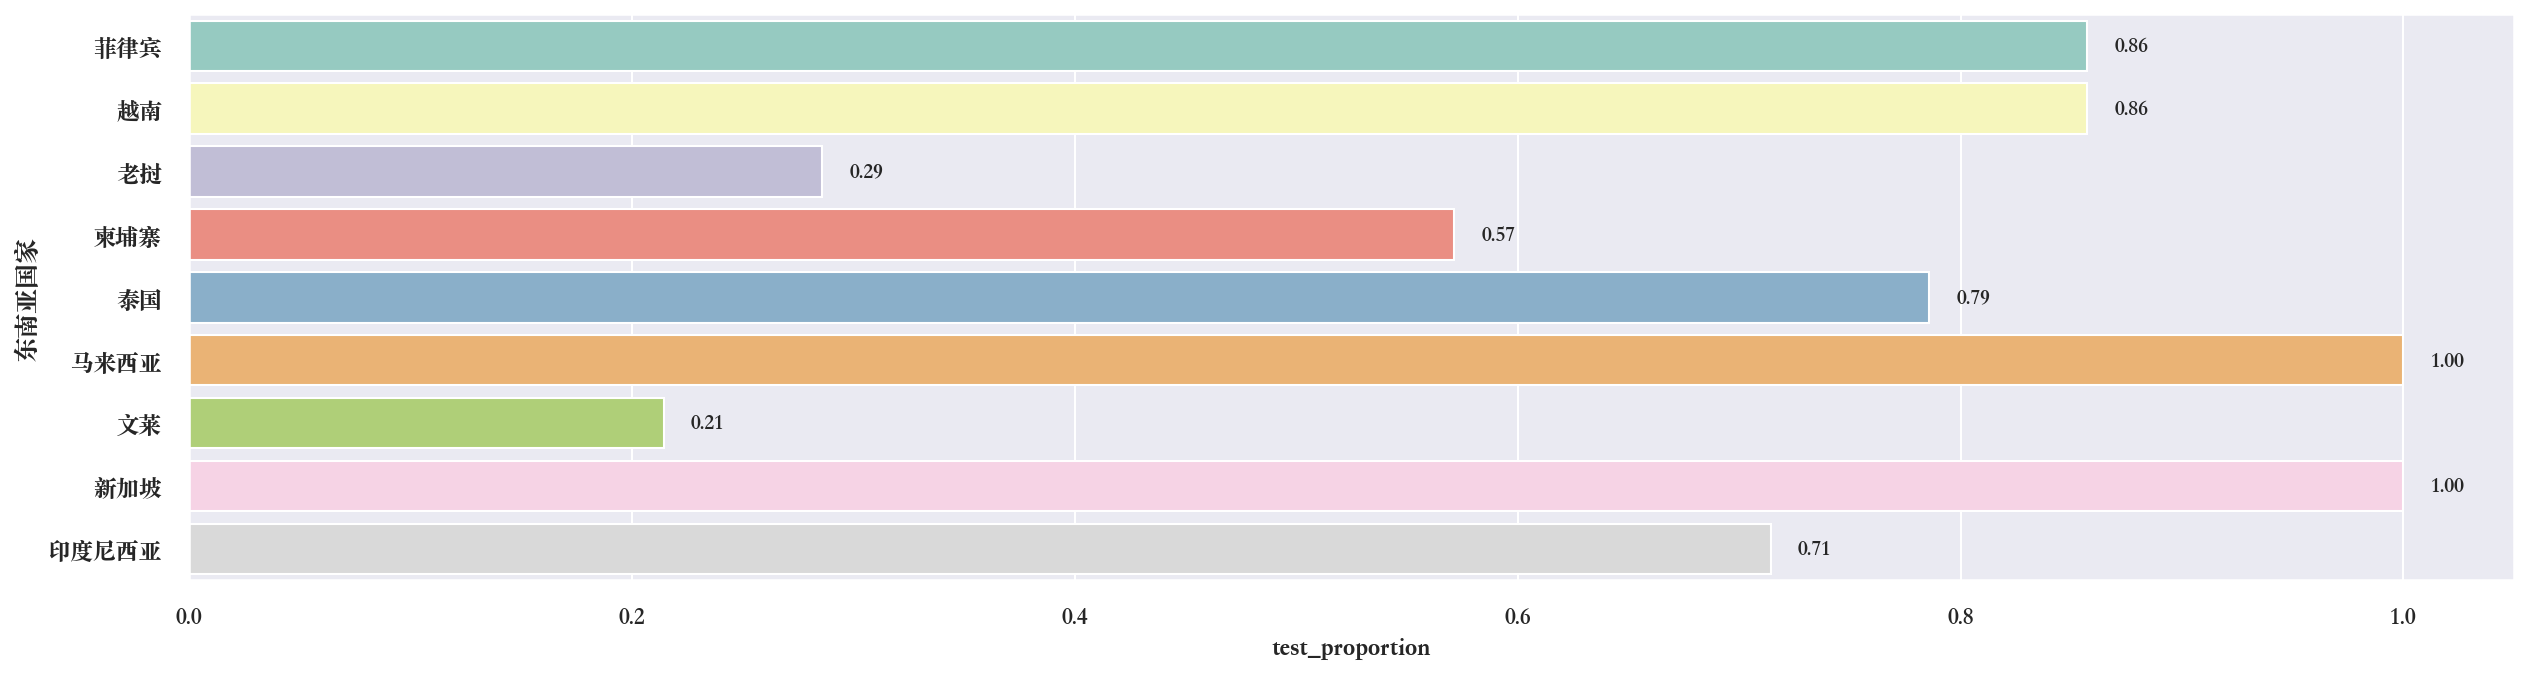

In [114]:
sns.barplot(y='test_country',x='test_proportion',data=中国东南亚,palette='Set3',orient='h')
for y,x in enumerate(中国东南亚['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('东南亚国家')
plt.show()

In [74]:
中国欧洲=area_specific_prop(ctry_release=中国主要发行,dist=中国测试偏好,area='欧洲')

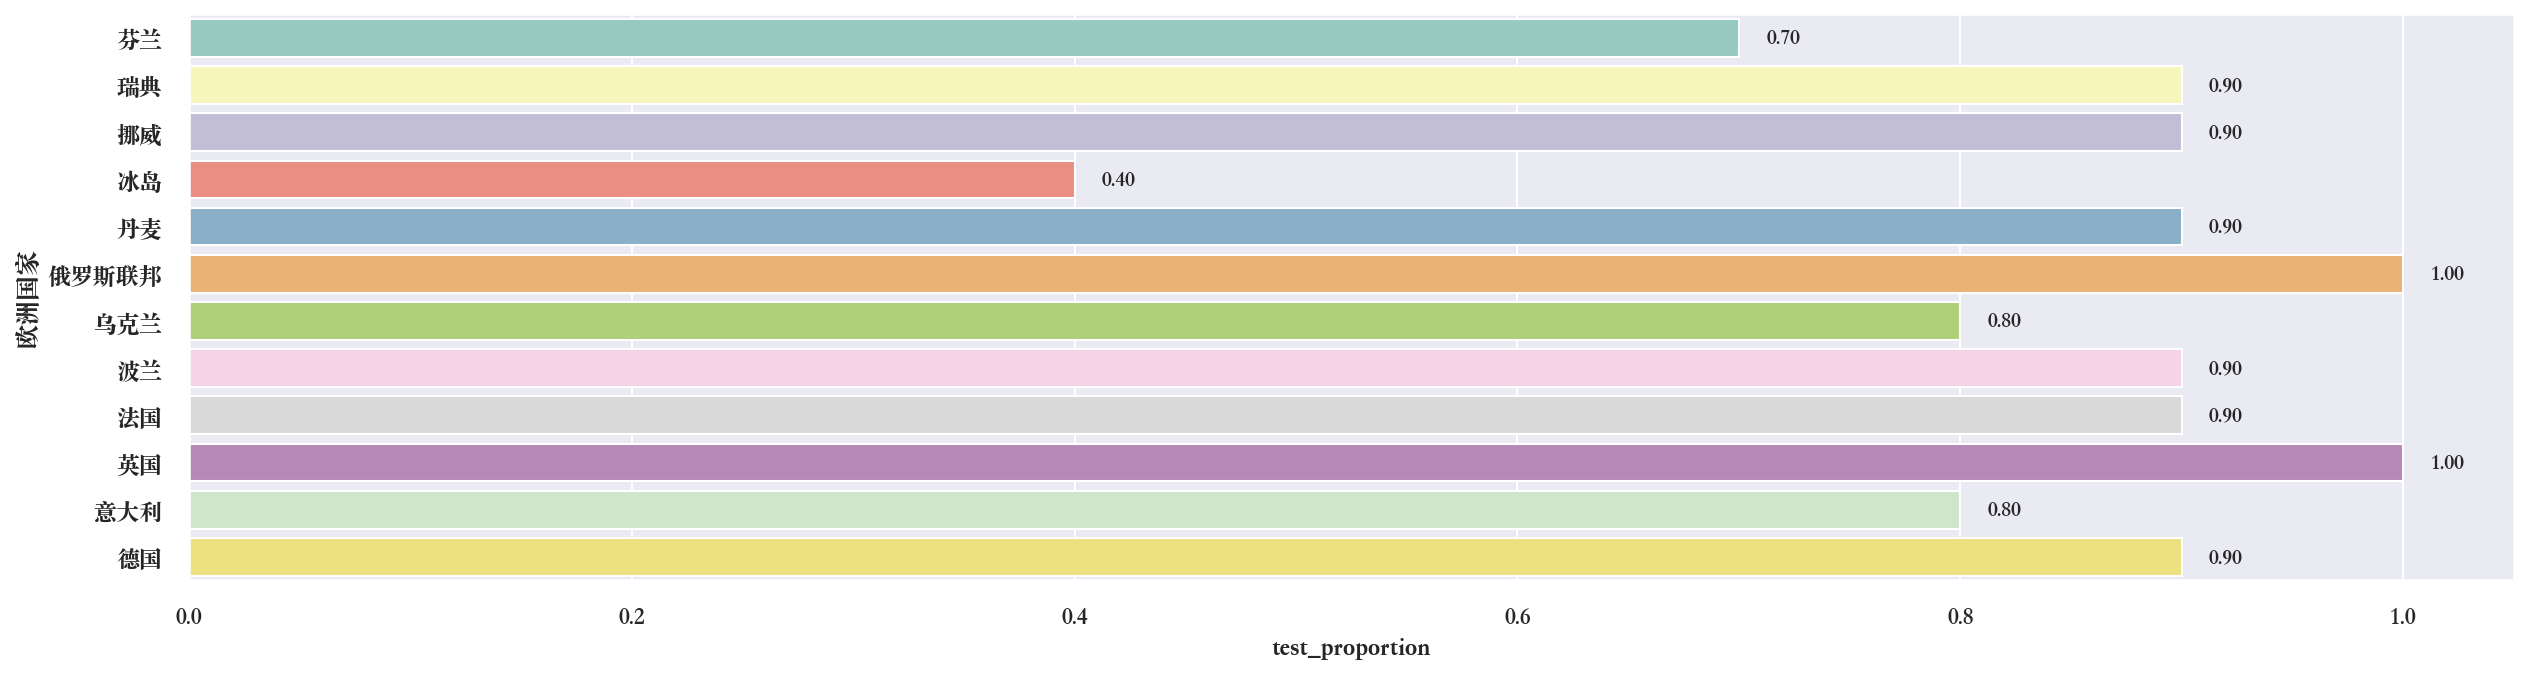

In [117]:
sns.barplot(y='test_country',x='test_proportion',data=中国欧洲,palette='Set3',orient='h')
for y,x in enumerate(中国欧洲['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('欧洲国家')    
plt.show()

In [76]:
中国南美=area_specific_prop(ctry_release=中国主要发行,dist=中国测试偏好,area='南美')

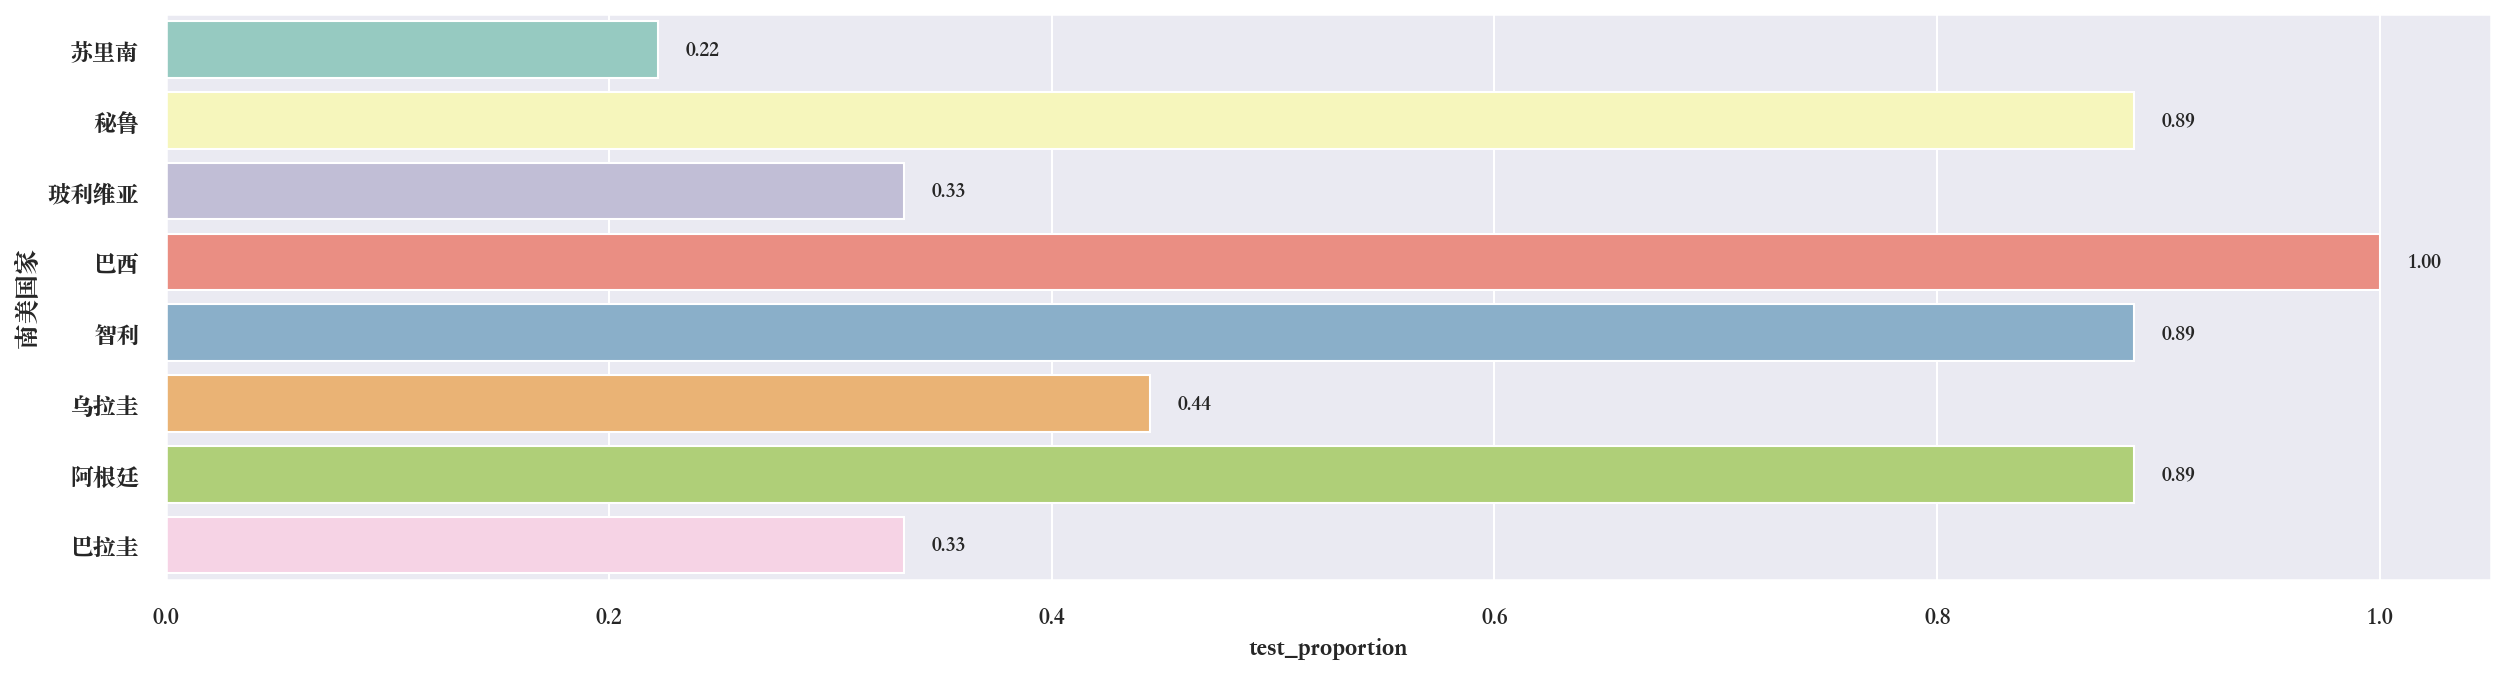

In [120]:
sns.barplot(y='test_country',x='test_proportion',data=中国南美,palette='Set3',orient='h')
for y,x in enumerate(中国南美['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('南美国家')
plt.show()

In [136]:
中国中东=area_specific_prop(ctry_release=中国主要发行,dist=中国测试偏好,area='中东')

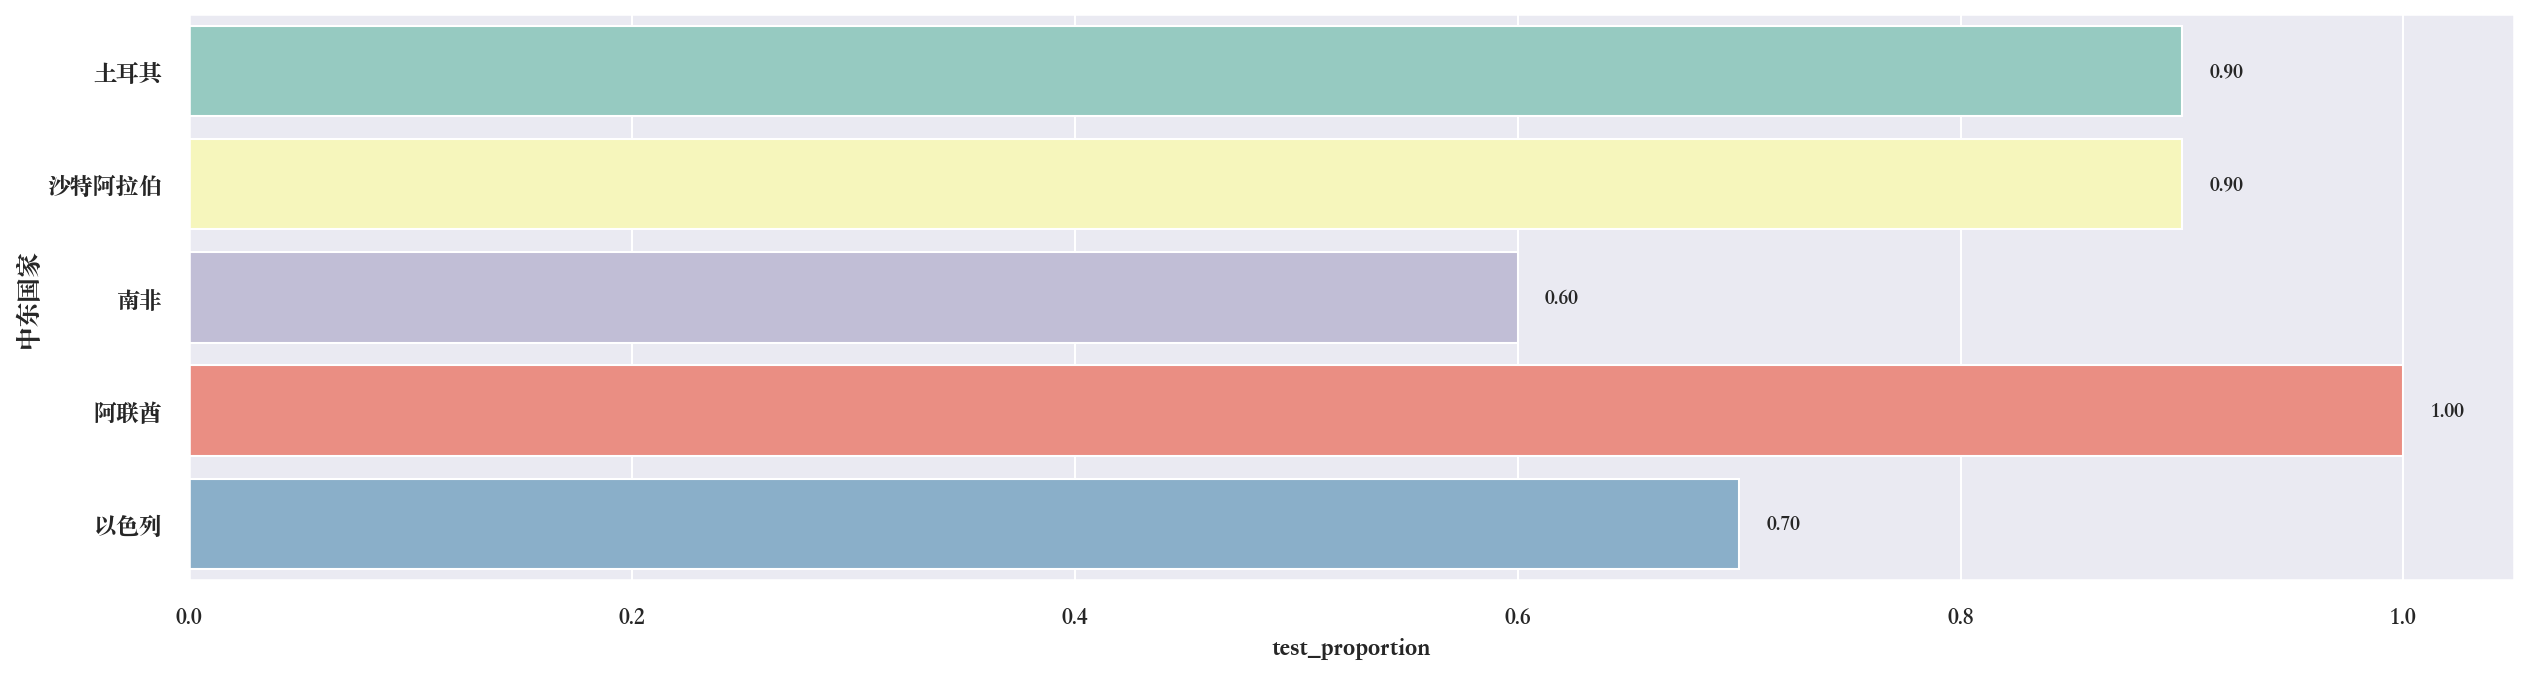

In [137]:
sns.barplot(y='test_country',x='test_proportion',data=中国中东,palette='Set3',orient='h')
for y,x in enumerate(中国中东['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('中东国家')
plt.show()

In [80]:
中国北美=area_specific_prop(ctry_release=中国主要发行,dist=中国测试偏好,area='北美')

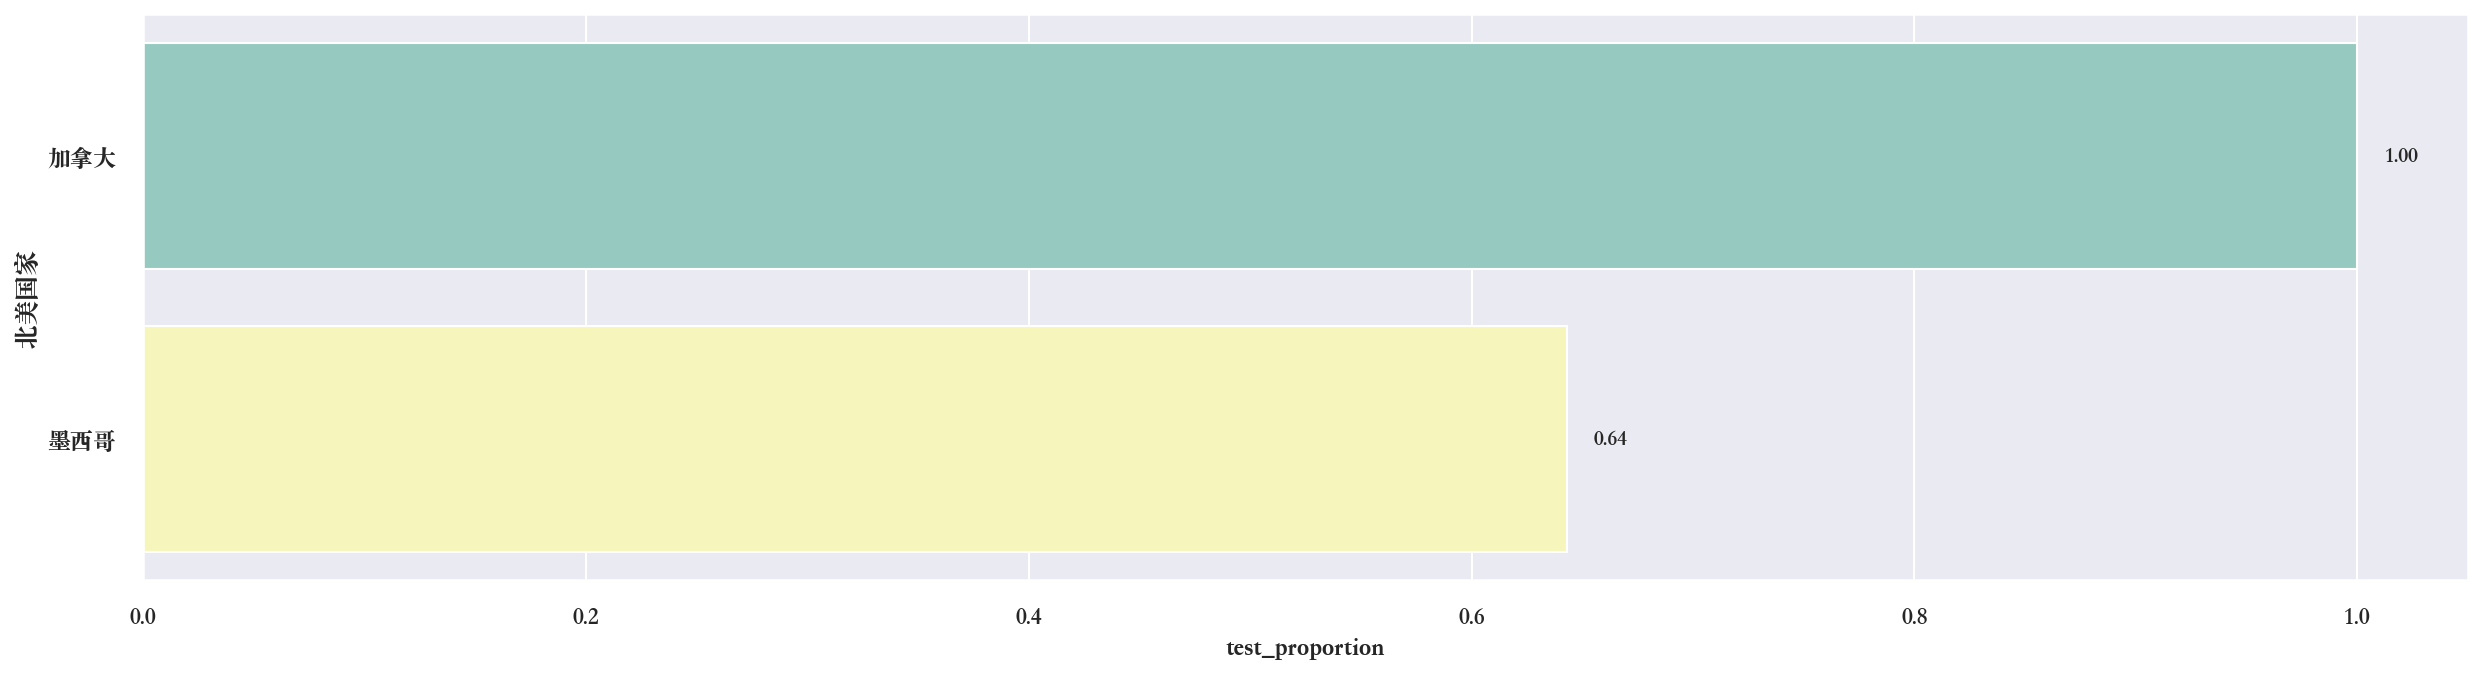

In [126]:
sns.barplot(y='test_country',x='test_proportion',data=中国北美,palette='Set3',orient='h')
for y,x in enumerate(中国北美['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('北美国家')
plt.show()

In [82]:
中国其他亚太=area_specific_prop(ctry_release=中国主要发行,dist=中国测试偏好,area='其他亚太')

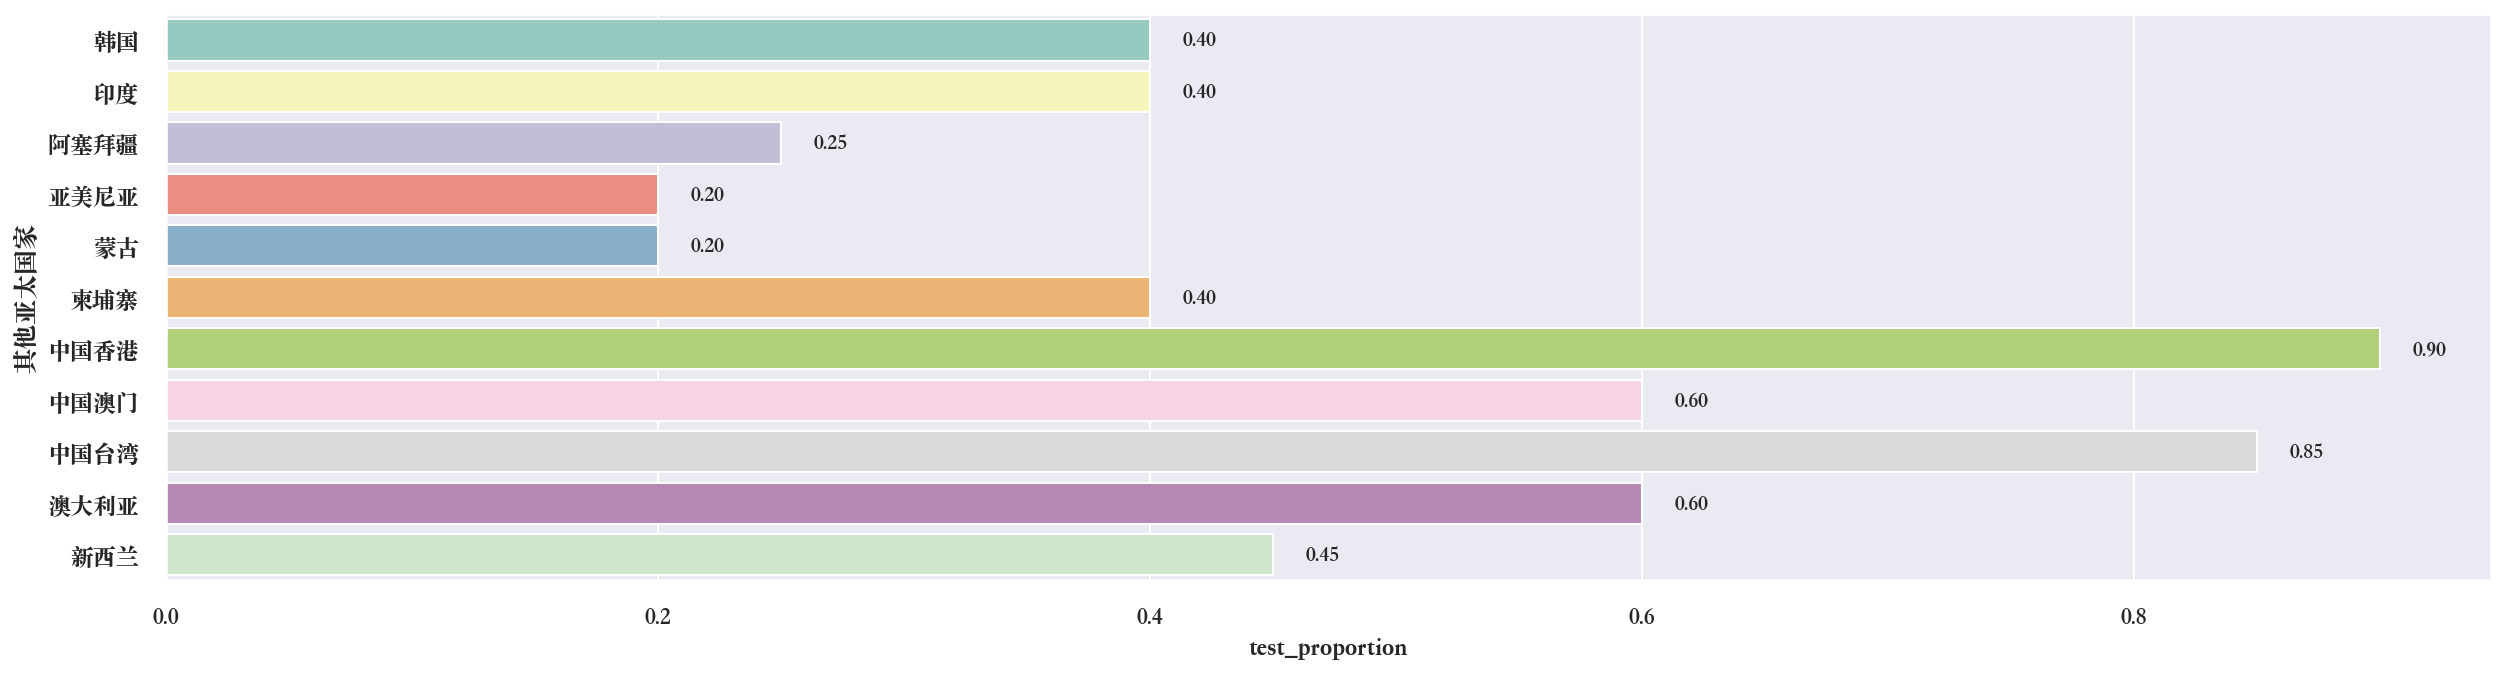

In [130]:
sns.barplot(y='test_country',x='test_proportion',data=中国其他亚太,palette='Set3',orient='h')
for y,x in enumerate(中国其他亚太['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('其他亚太国家')
plt.show()

In [88]:
美国东南亚=area_specific_prop(ctry_release=美国主要发行,dist=美国测试偏好,area='东南亚')

<center><mark>美国在各地区测试国家分布

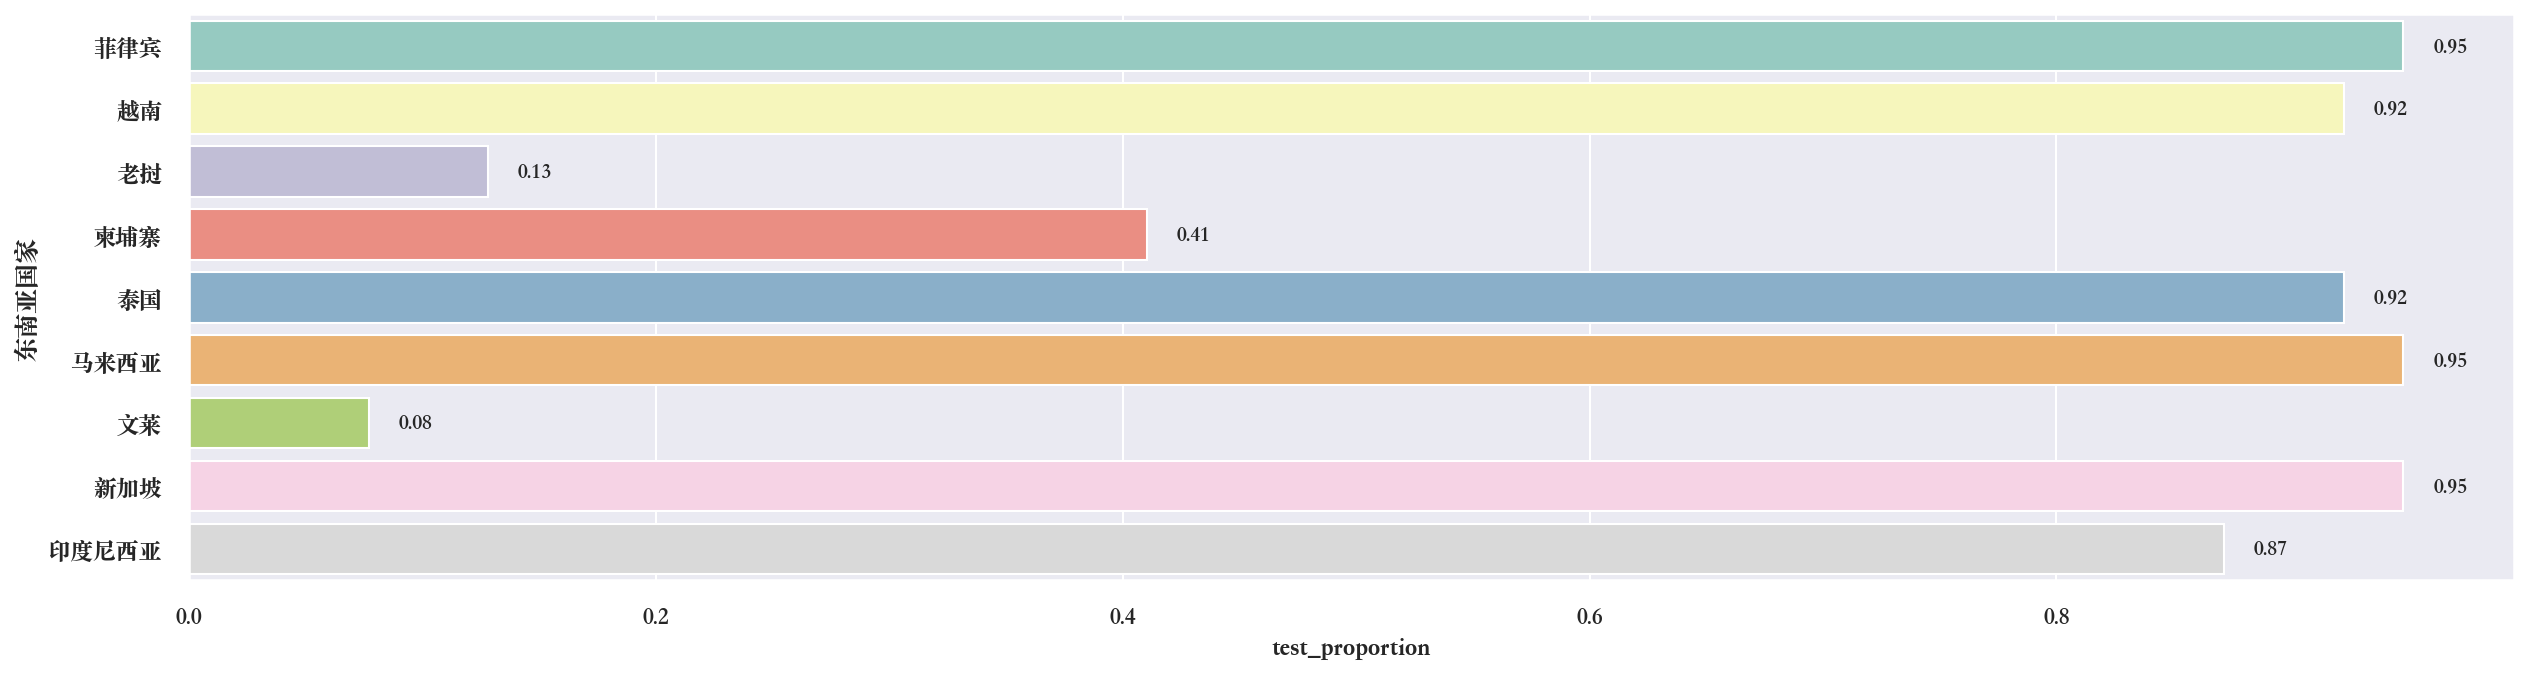

In [115]:
sns.barplot(y='test_country',x='test_proportion',data=美国东南亚,palette='Set3',orient='h')
for y,x in enumerate(美国东南亚['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('东南亚国家')
plt.show()

In [90]:
美国欧洲=area_specific_prop(ctry_release=美国主要发行,dist=美国测试偏好,area='欧洲')

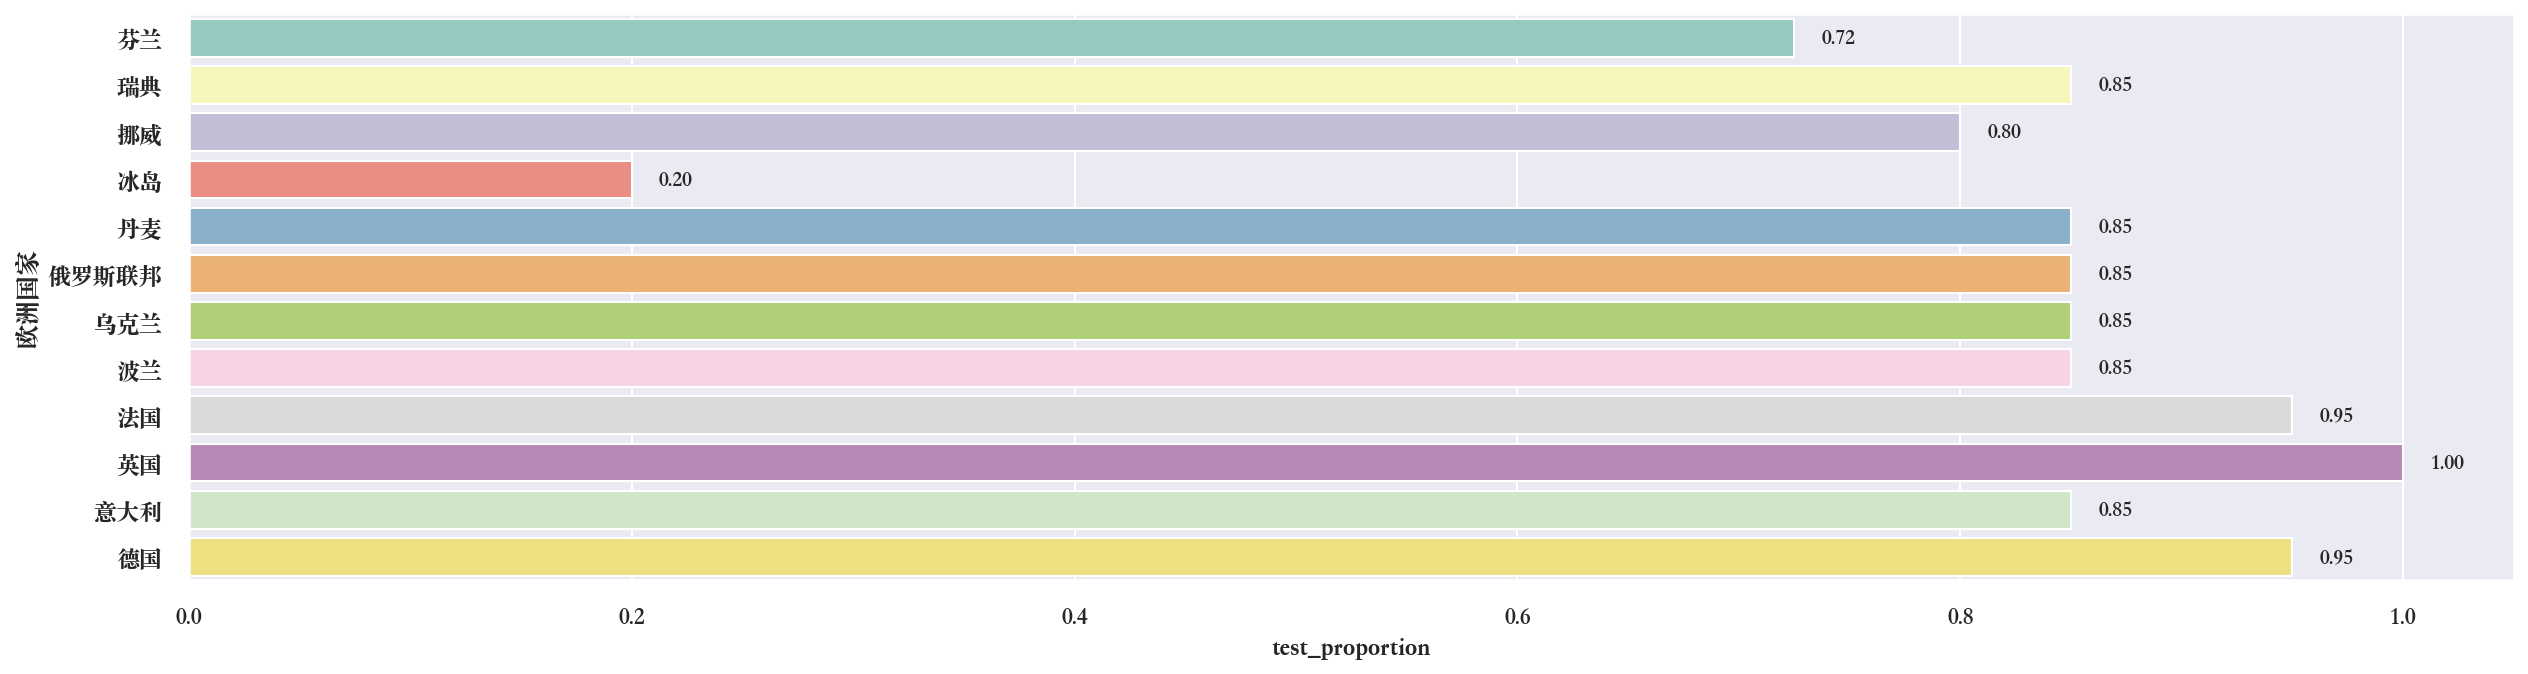

In [118]:
sns.barplot(y='test_country',x='test_proportion',data=美国欧洲,palette='Set3',orient='h')
for y,x in enumerate(美国欧洲['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('欧洲国家')
plt.show()

In [92]:
美国南美=area_specific_prop(ctry_release=美国主要发行,dist=美国测试偏好,area='南美')

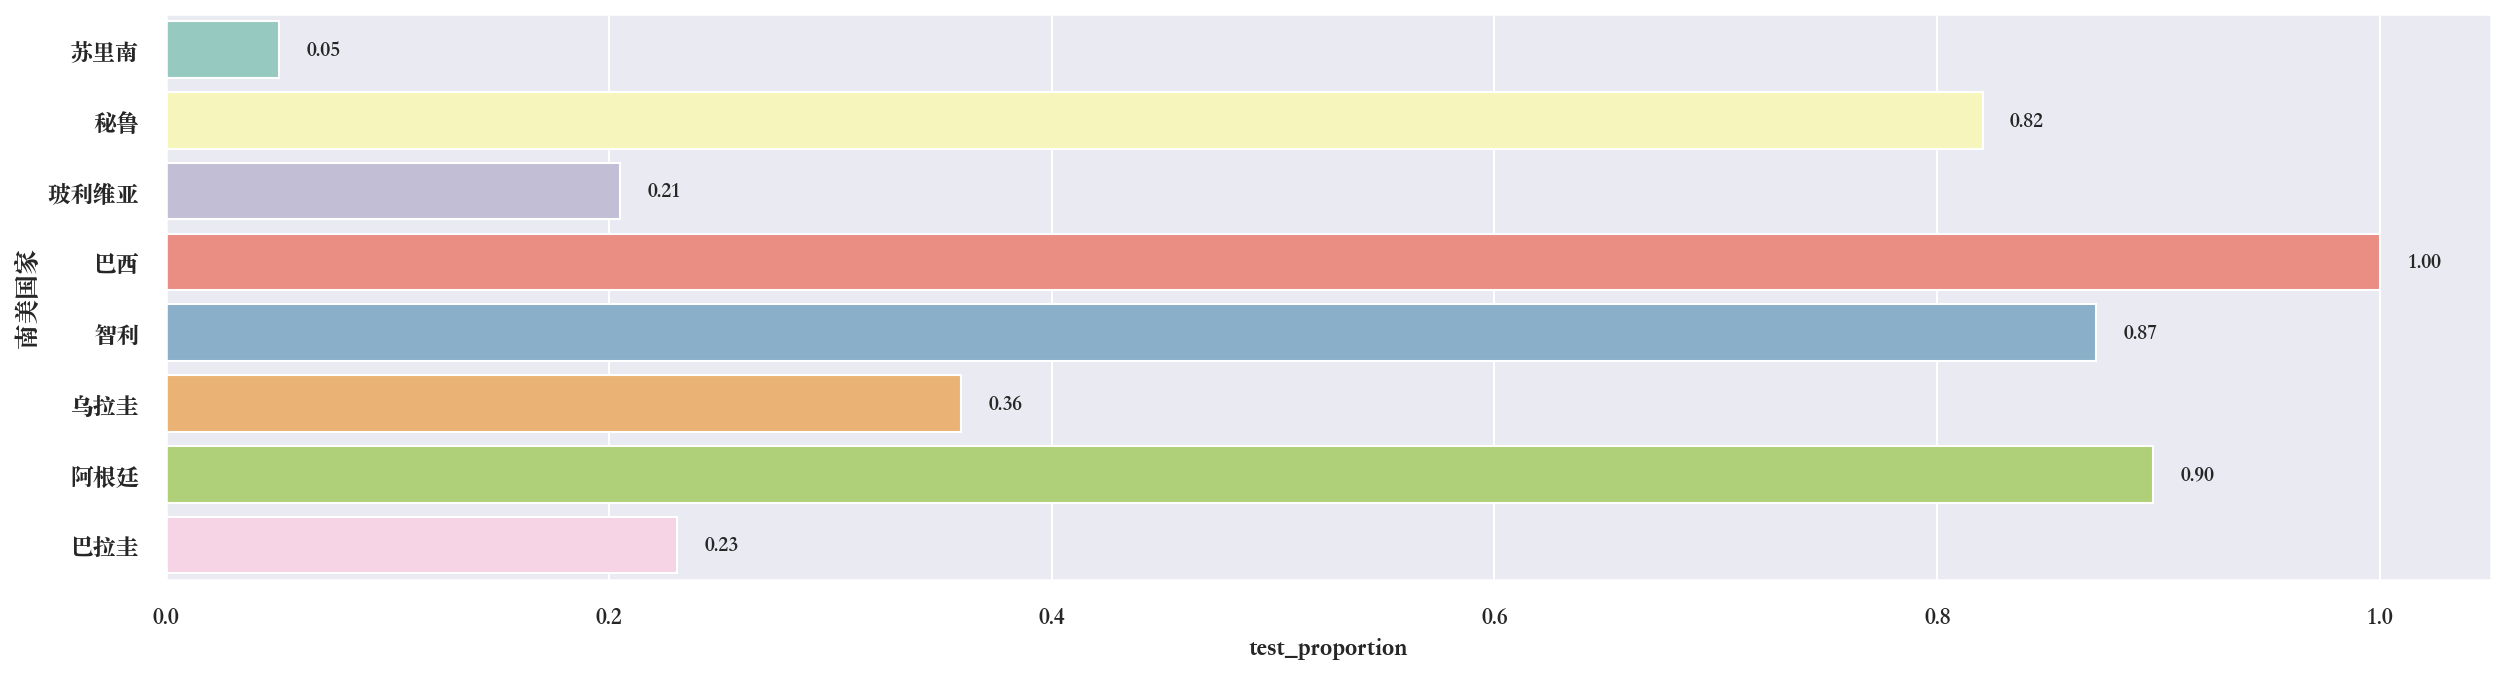

In [121]:
sns.barplot(y='test_country',x='test_proportion',data=美国南美,palette='Set3',orient='h')
for y,x in enumerate(美国南美['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('南美国家')
plt.show()

In [138]:
美国中东=area_specific_prop(ctry_release=美国主要发行,dist=美国测试偏好,area='中东')

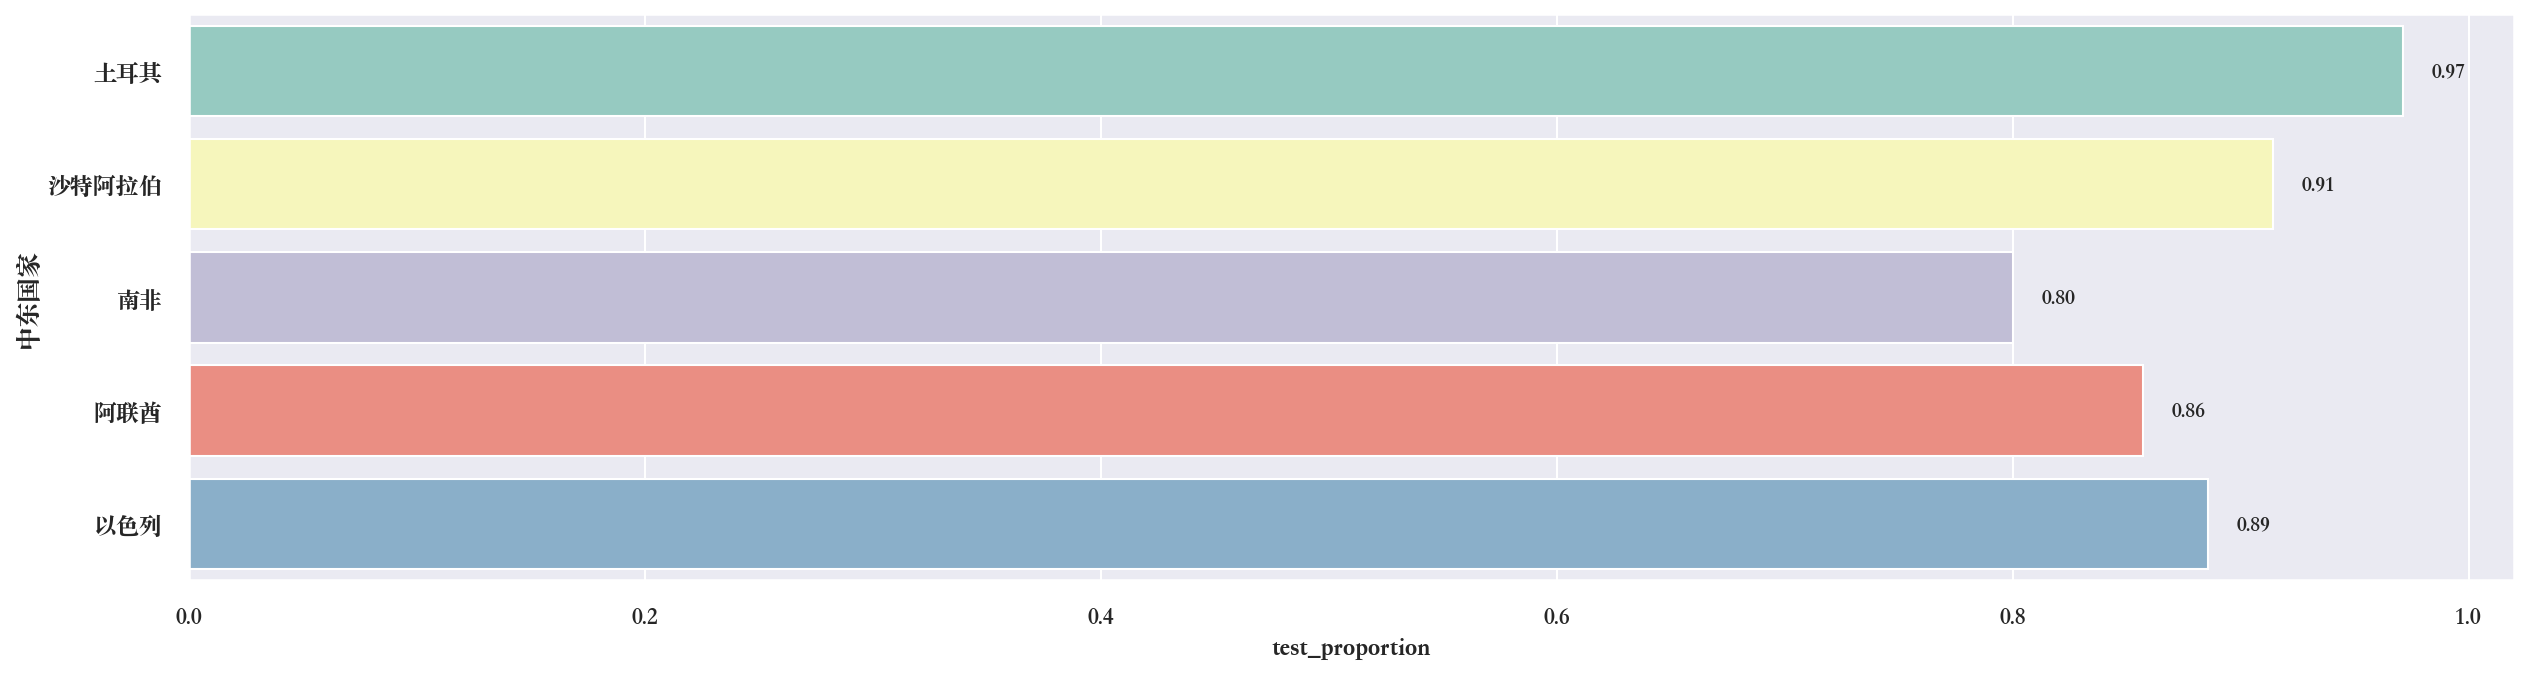

In [139]:
sns.barplot(y='test_country',x='test_proportion',data=美国中东,palette='Set3',orient='h')
for y,x in enumerate(美国中东['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('中东国家')
plt.show()

In [127]:
美国北美=area_specific_prop(ctry_release=美国主要发行,dist=美国测试偏好,area='北美')

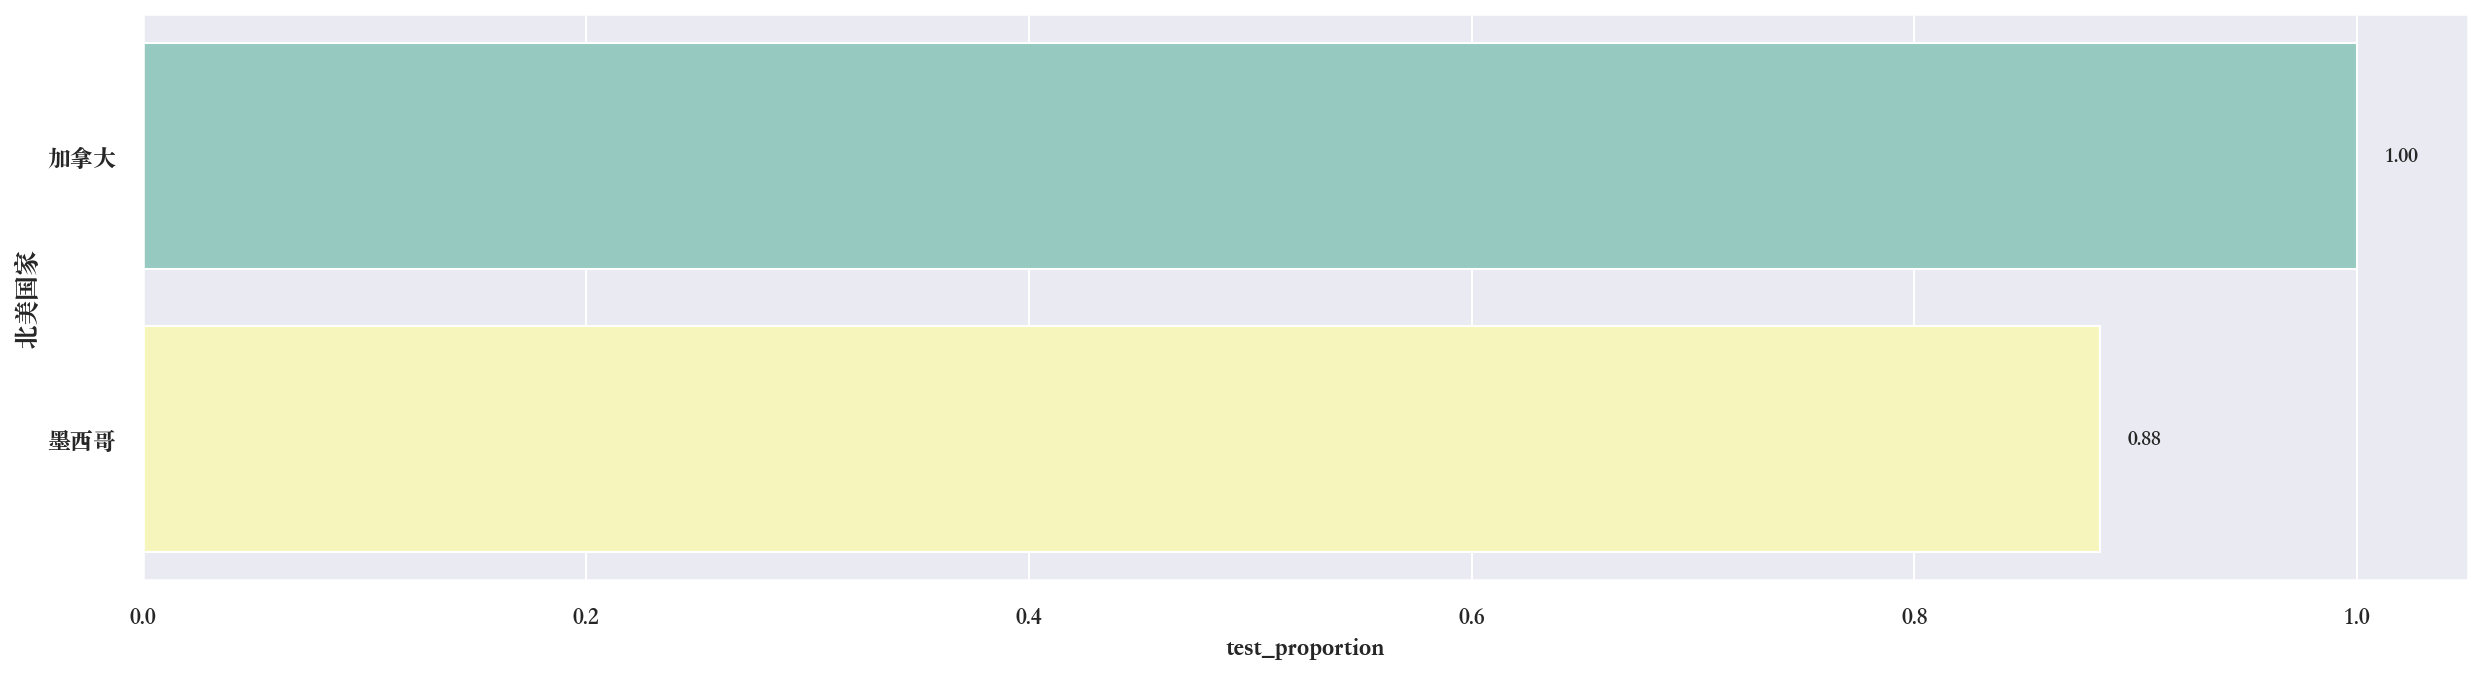

In [128]:
sns.barplot(y='test_country',x='test_proportion',data=美国北美,palette='Set3',orient='h')
for y,x in enumerate(美国北美['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('北美国家')
plt.show()

In [97]:
美国其他亚太=area_specific_prop(ctry_release=美国主要发行,dist=美国测试偏好,area='其他亚太')

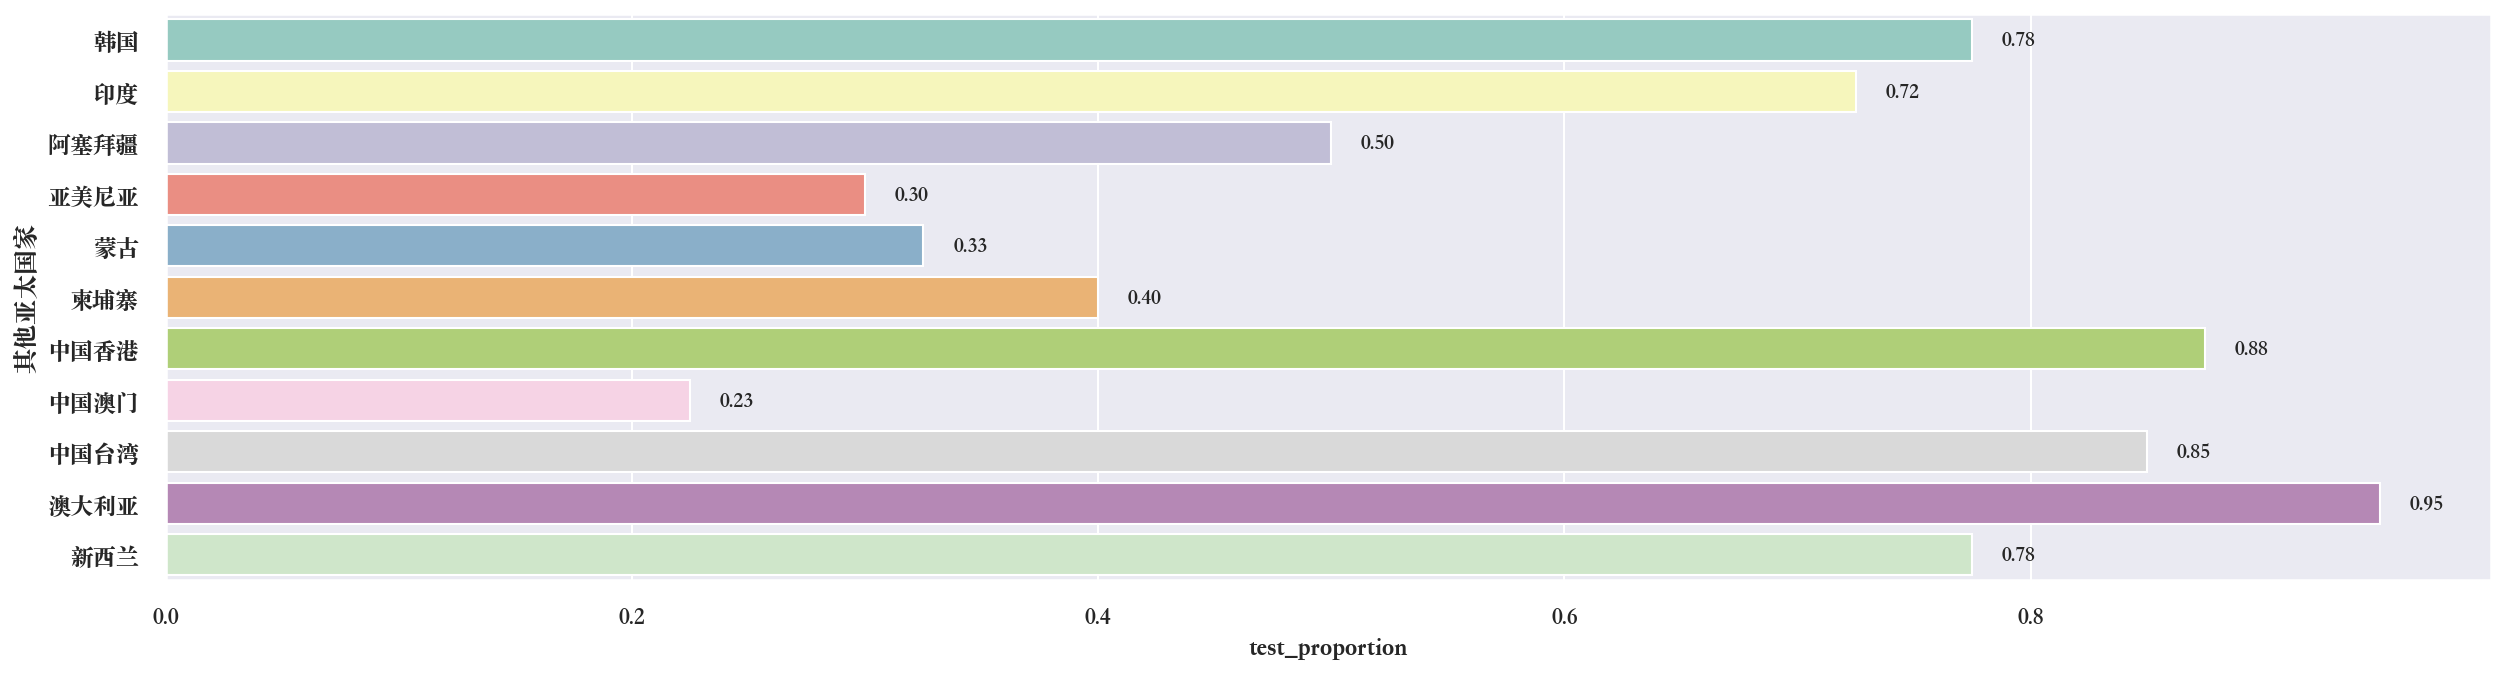

In [131]:
sns.barplot(y='test_country',x='test_proportion',data=美国其他亚太,palette='Set3',orient='h')
for y,x in enumerate(美国其他亚太['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('其他亚太国家')
plt.show()

In [99]:
日本东南亚=area_specific_prop(ctry_release=日本主要发行,dist=日本测试偏好,area='东南亚')

<center><mark>日本在各地区测试国家分布

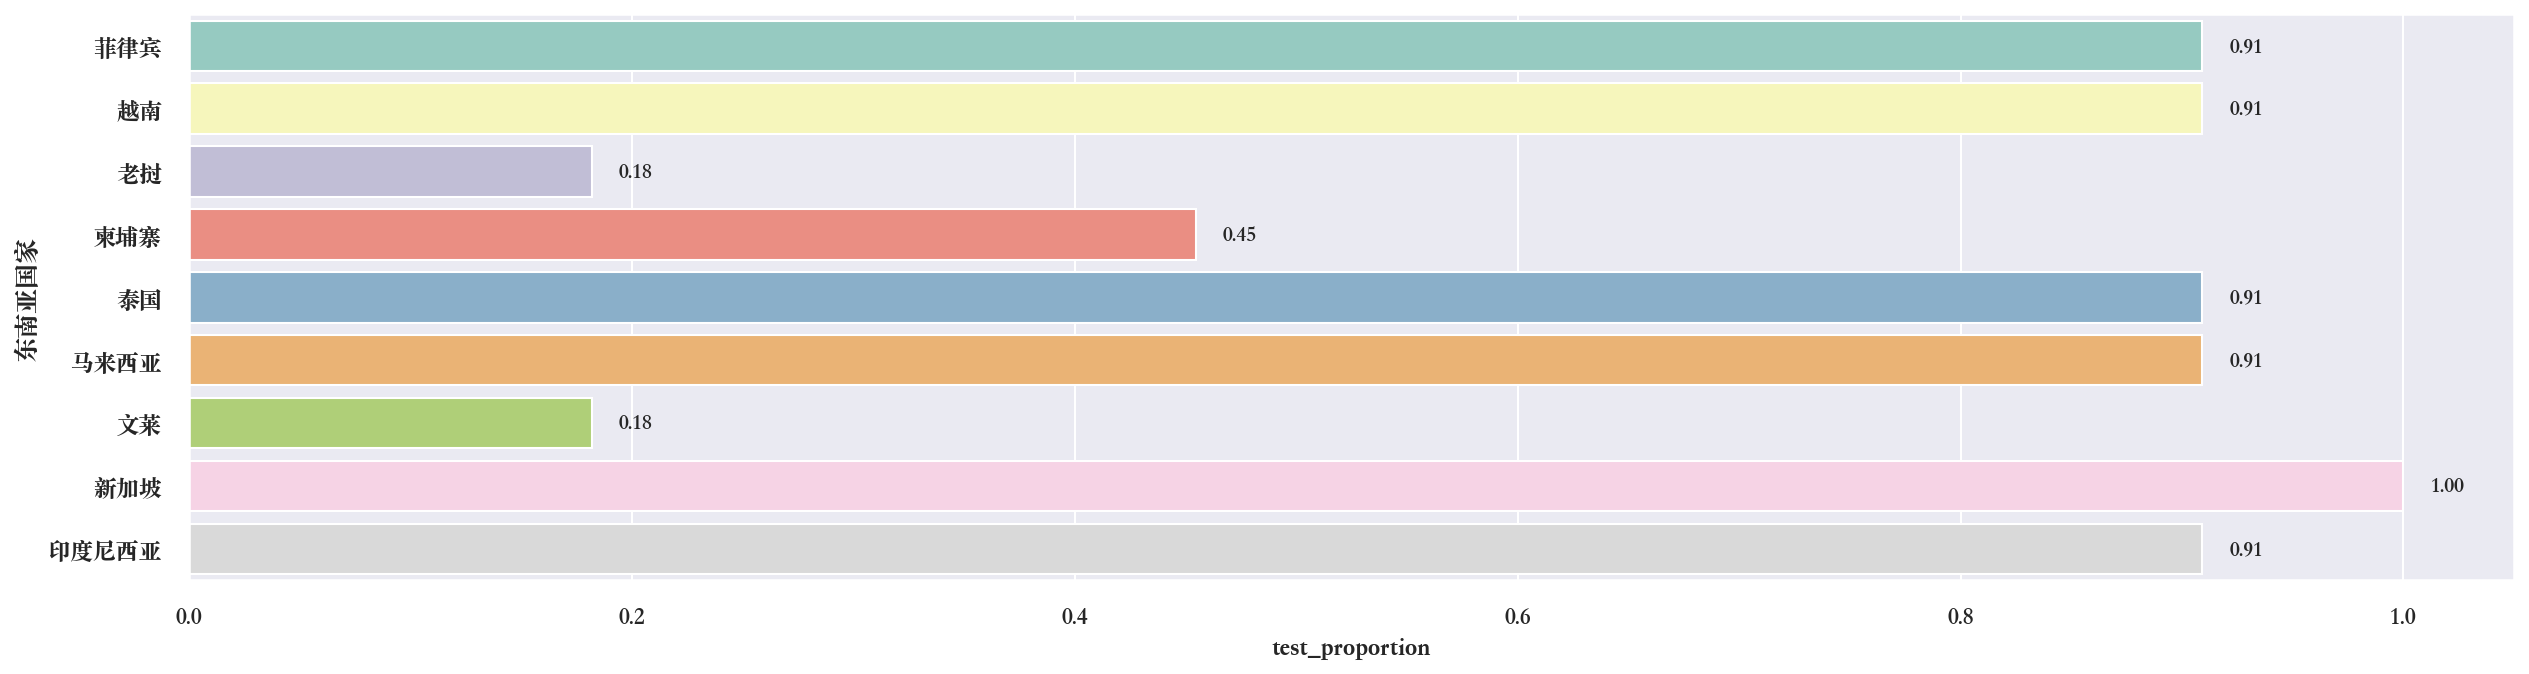

In [116]:
sns.barplot(y='test_country',x='test_proportion',data=日本东南亚,palette='Set3',orient='h')
for y,x in enumerate(日本东南亚['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('东南亚国家')
plt.show()

In [101]:
日本欧洲=area_specific_prop(ctry_release=日本主要发行,dist=日本测试偏好,area='欧洲')

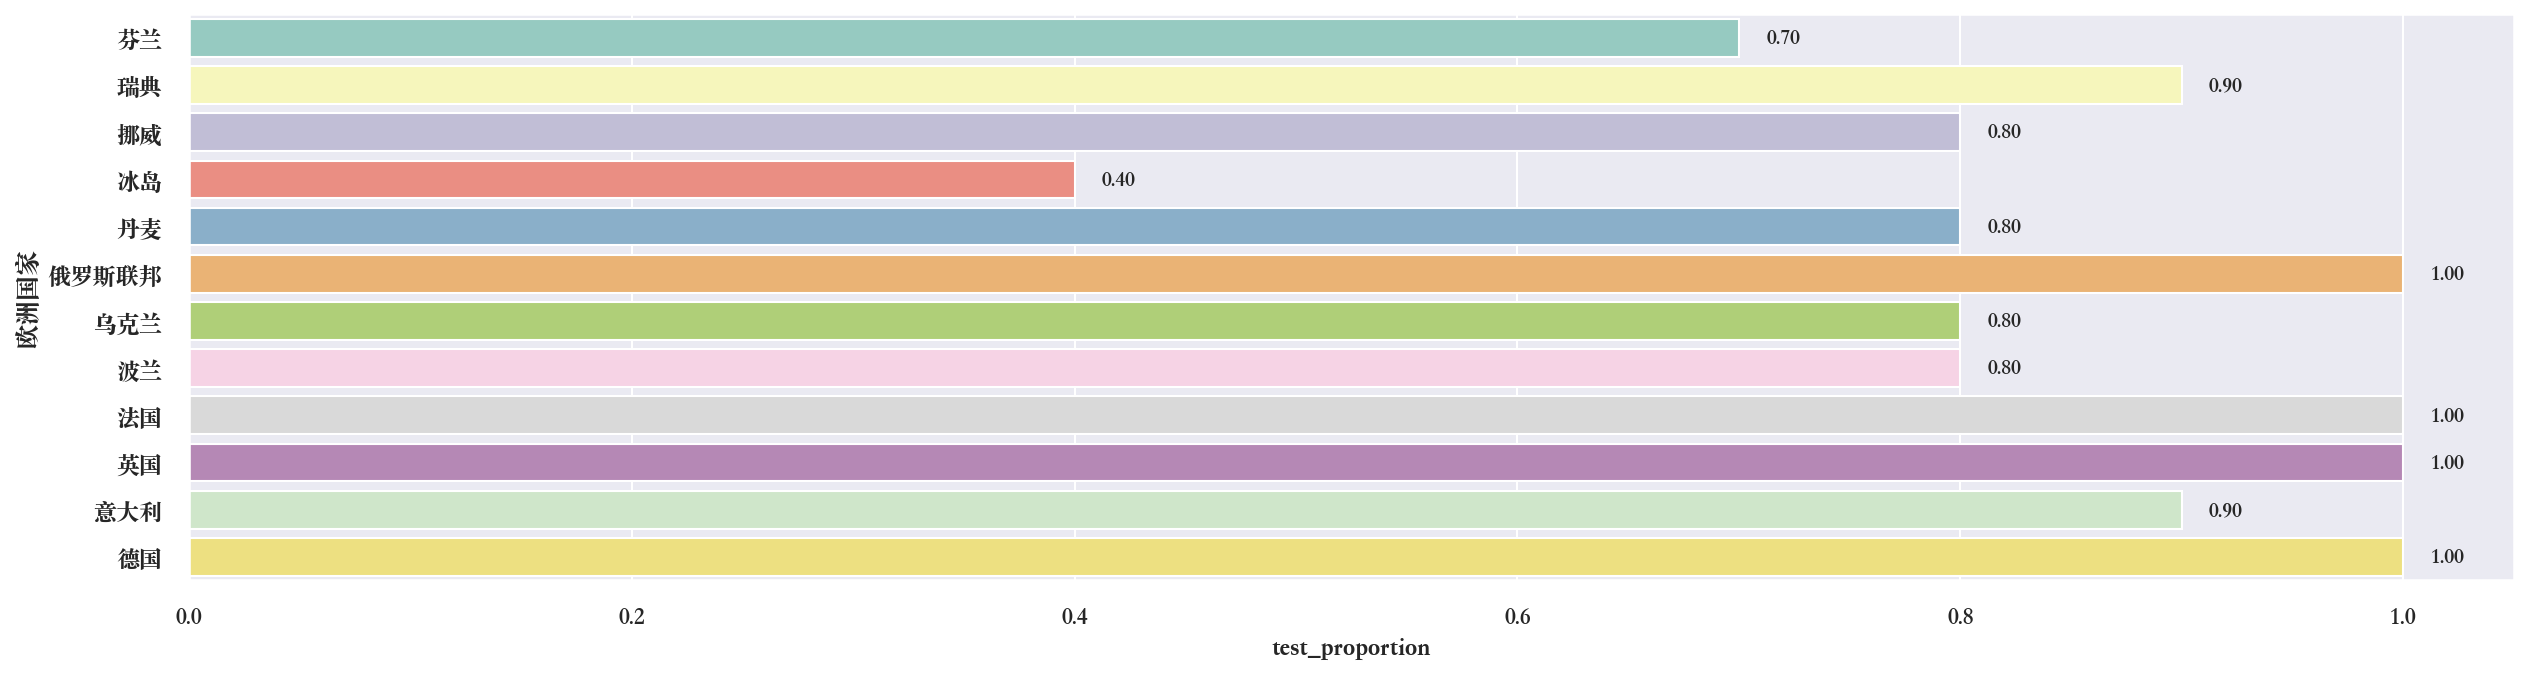

In [119]:
sns.barplot(y='test_country',x='test_proportion',data=日本欧洲,palette='Set3',orient='h')
for y,x in enumerate(日本欧洲['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('欧洲国家')
plt.show()

In [103]:
日本南美=area_specific_prop(ctry_release=日本主要发行,dist=日本测试偏好,area='南美')

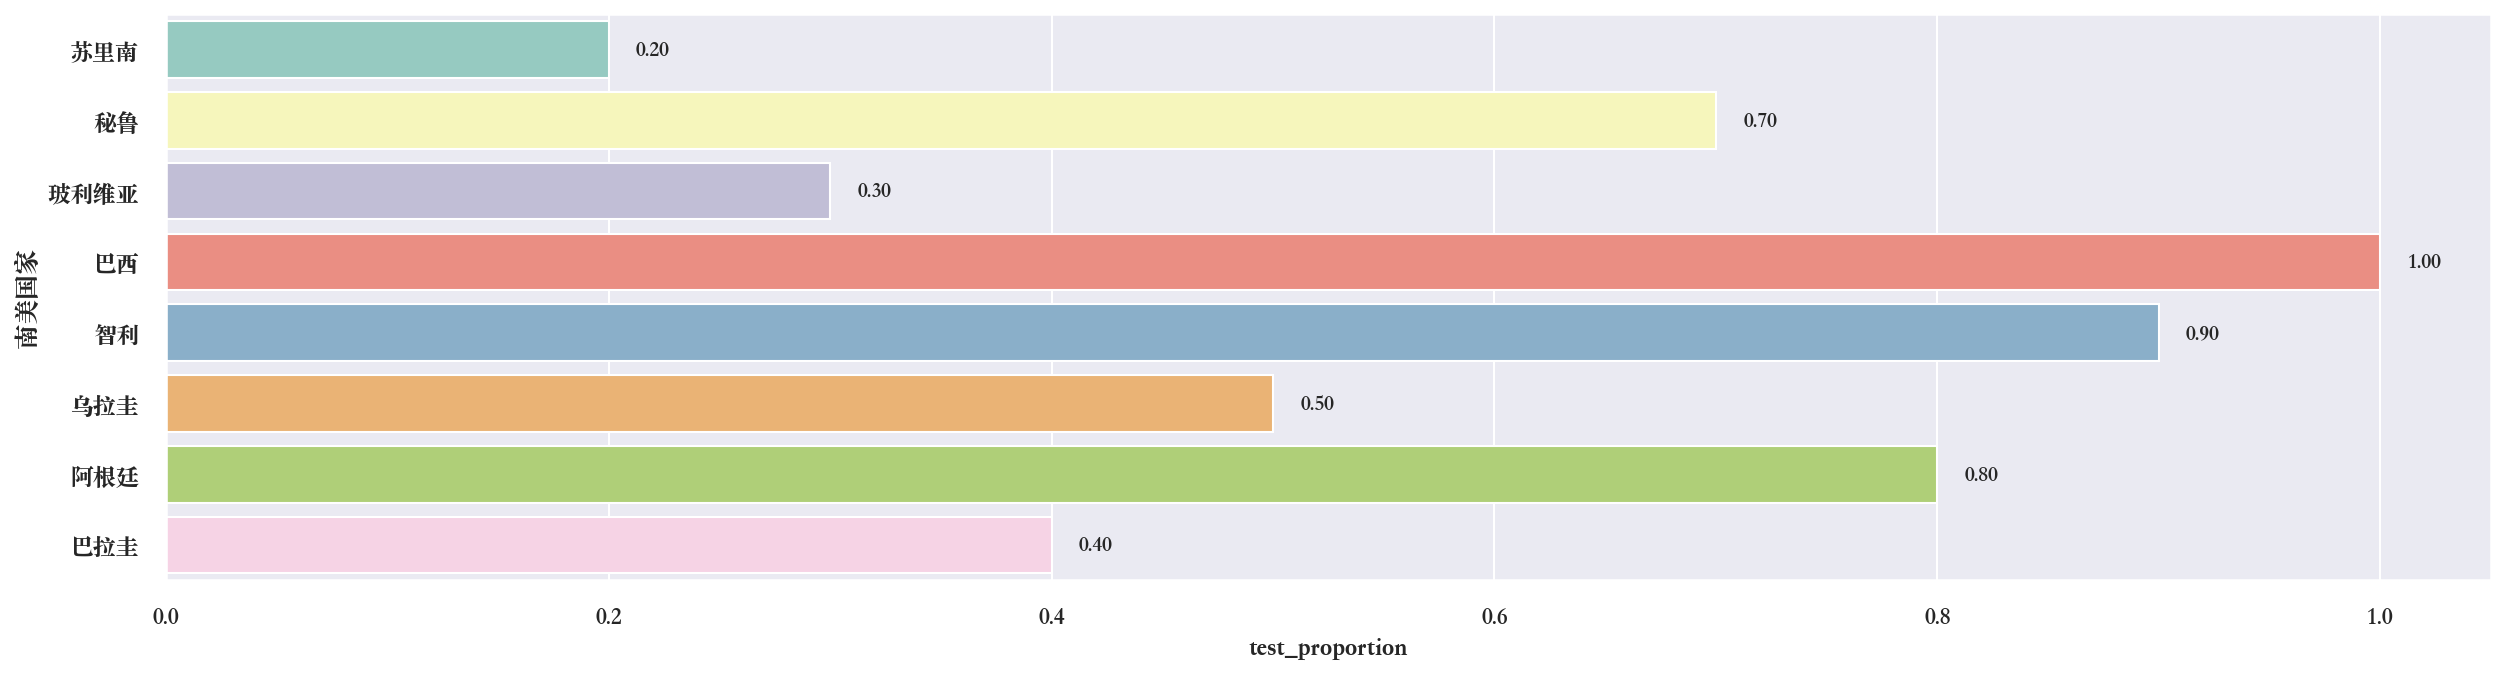

In [122]:
sns.barplot(y='test_country',x='test_proportion',data=日本南美,palette='Set3',orient='h')
for y,x in enumerate(日本南美['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('南美国家')
plt.show()

In [140]:
日本中东=area_specific_prop(ctry_release=日本主要发行,dist=日本测试偏好,area='中东')

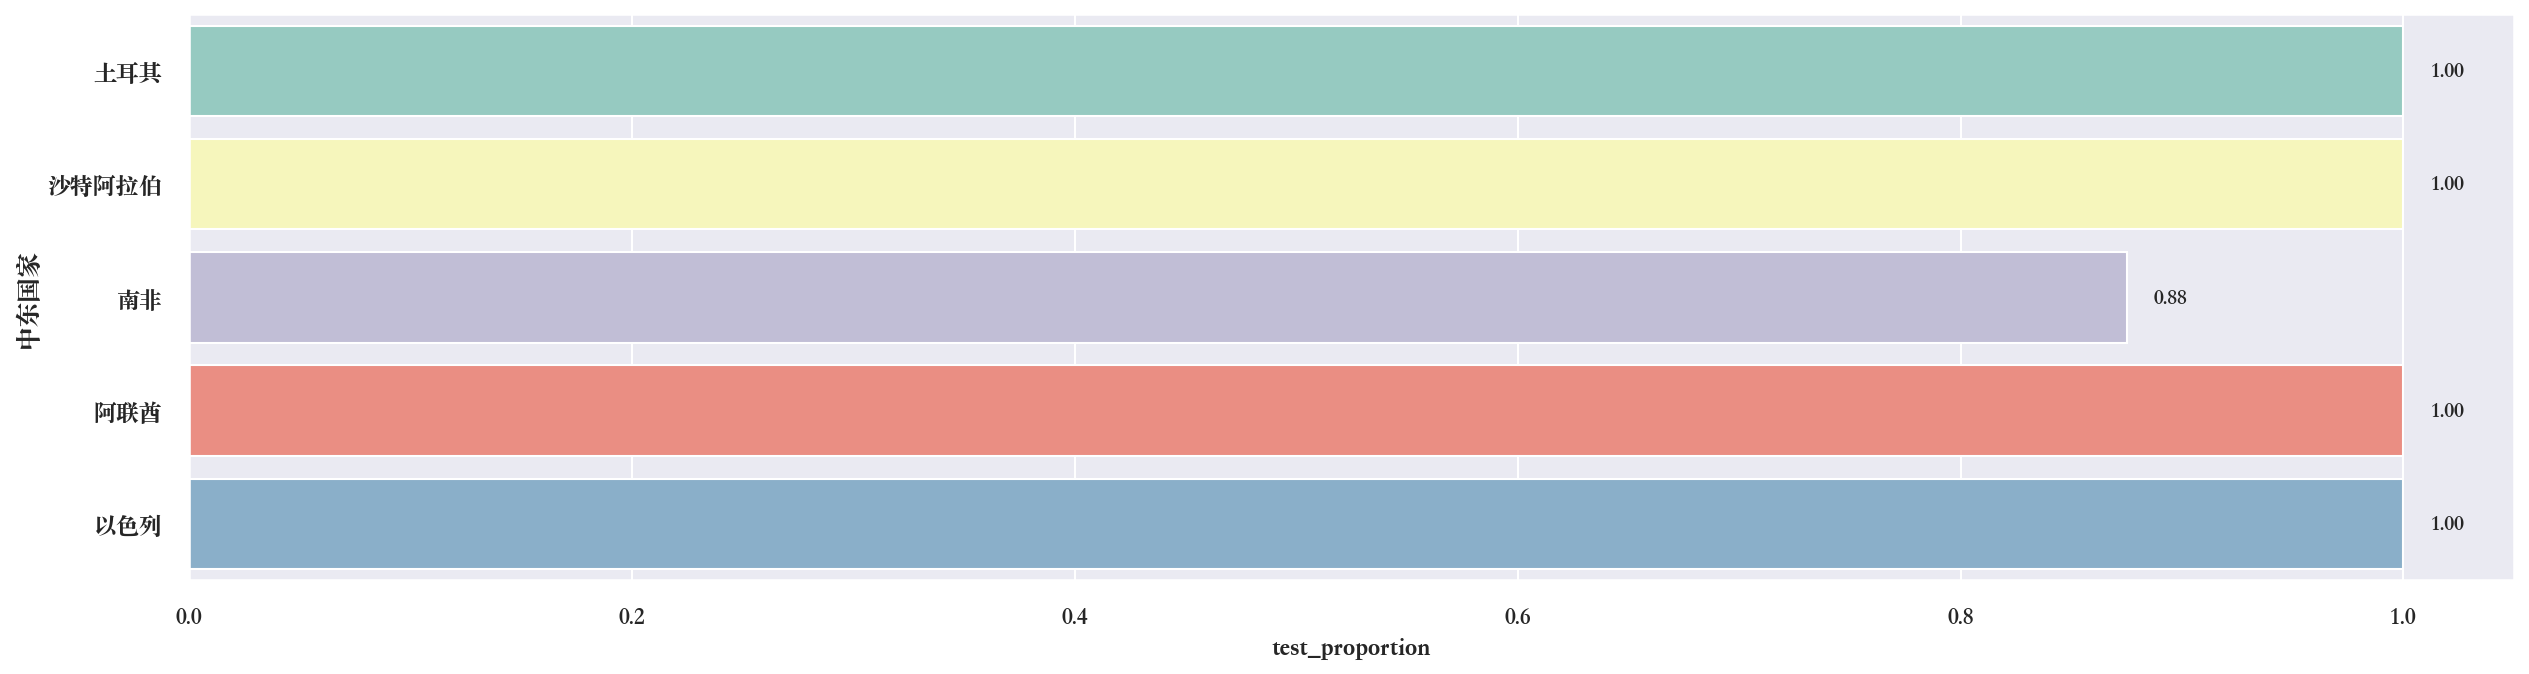

In [141]:
sns.barplot(y='test_country',x='test_proportion',data=日本中东,palette='Set3',orient='h')
for y,x in enumerate(日本中东['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('中东国家')
plt.show()

In [107]:
日本北美=area_specific_prop(ctry_release=日本主要发行,dist=日本测试偏好,area='北美')

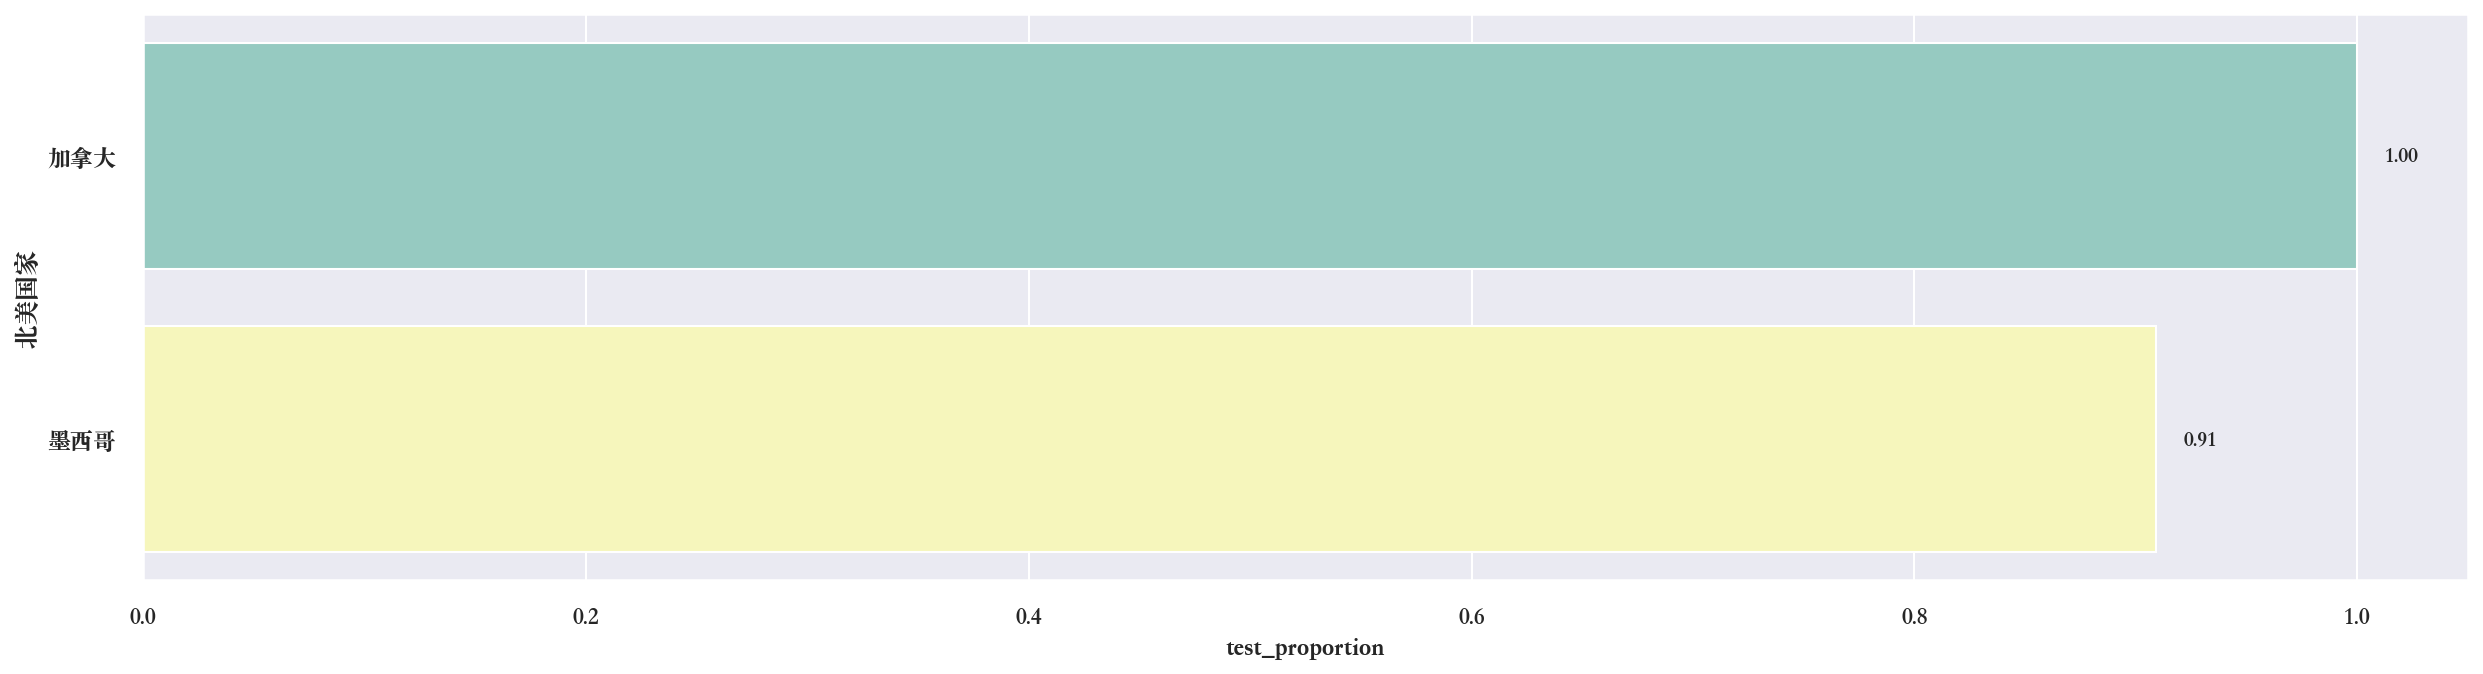

In [129]:
sns.barplot(y='test_country',x='test_proportion',data=日本北美,palette='Set3',orient='h')
for y,x in enumerate(日本北美['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('北美国家')
plt.show()

In [109]:
日本其他亚太=area_specific_prop(ctry_release=日本主要发行,dist=日本测试偏好,area='其他亚太')

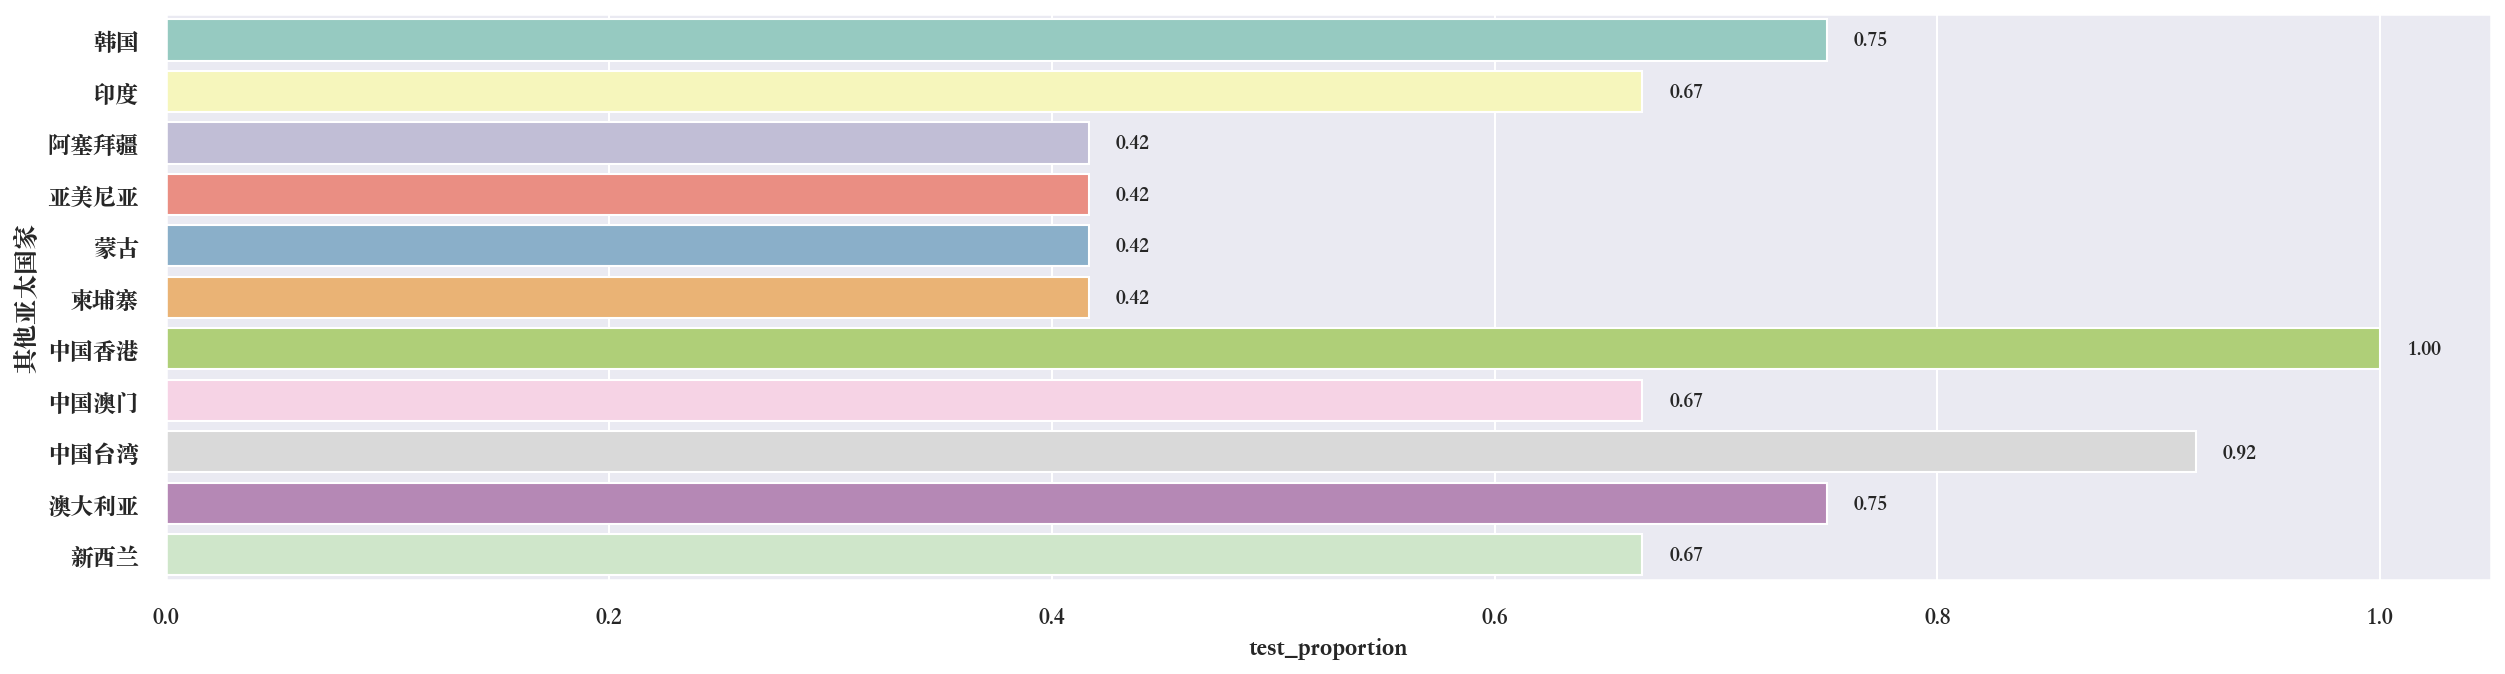

In [132]:
sns.barplot(y='test_country',x='test_proportion',data=日本其他亚太,palette='Set3',orient='h')
for y,x in enumerate(日本其他亚太['test_proportion']):
    plt.text(x+0.02,y,'%.2f'%x,ha='center',va='center')
plt.ylabel('其他亚太国家')
plt.show()